---

# **CAPSTONE PROJECT MODUL 3 - Predicting Hotel Booking Cancellation (Klasifikasi)**
### Dataset: Hotel Booking Demand
### Author: Liswatun Naimah

---

## Project Overview

Proyek ini bertujuan membangun model klasifikasi untuk memprediksi apakah reservasi hotel akan dibatalkan (`is_canceled`). Dataset berisi data pemesanan hotel di Portugal, mencakup informasi negara asal tamu, channel pemesanan, tipe pelanggan, hingga permintaan khusus. Model ini diharapkan membantu manajemen hotel dalam mengambil tindakan preventif untuk menurunkan potensi pembatalan dan kerugian operasional maupun finansial.

---

## Business Understanding
## Business Context

Setiap tahunnya, industri perhotelan mengalami tantangan besar akibat tingginya angka pembatalan reservasi. Hal ini tidak hanya berdampak pada hilangnya pendapatan, tetapi juga menyebabkan ketidakefisienan dalam pengelolaan kamar, logistik staf, dan perencanaan stok makanan.

Model prediksi pembatalan pemesanan yang akurat dapat membantu pihak hotel melakukan tindakan preventif — seperti pengiriman notifikasi, pengaturan ulang deposit, hingga strategi promosi ulang — sehingga pembatalan dapat ditekan sejak awal proses pemesanan.

Dengan membangun model machine learning berbasis klasifikasi ini, hotel diharapkan dapat mengambil keputusan berbasis data (data-driven decisions), menekan potensi kerugian, dan meningkatkan kepuasan pelanggan.

### Masalah Bisnis

- **Booking cancellation rate tinggi** → menyebabkan kamar kosong, kerugian, dan inefisiensi operasional
- **Tidak ada sistem prediktif otomatis** → sulit antisipasi pelanggan yang kemungkinan membatalkan

### Dampak Negatif Saat Ini

- **Loss of Revenue:** kamar tidak terisi tanpa sempat dijual kembali
- **Wasted Effort:** staf disiapkan untuk reservasi yang dibatalkan
- **Customer Experience menurun:** tidak ada tindakan proaktif untuk pelanggan yang cenderung batal

### Stakeholder

- **Primary:** Tim Manajemen Hotel  
- **Secondary:** Tim Revenue Management, Tim Customer Experience, dan Tim Marketing

### Tujuan Proyek

- Membangun model klasifikasi untuk memprediksi status pembatalan reservasi (`is_canceled`)
- Mengintegrasikan model ke dalam sistem hotel (CRM/reservasi) untuk otomatisasi deteksi
- Menghasilkan **insight yang dapat ditindaklanjuti** oleh tim marketing dan operasional

### Tujuan Bisnis

Membangun sistem prediktif untuk:
- Mengidentifikasi booking yang berisiko tinggi batal
- Memberikan peringatan dini kepada tim internal
- Mengoptimalkan alokasi kamar dan strategi promosi

### Dampak Bisnis

- **Cost Saving:** Menghindari kerugian dari kamar kosong yang tidak terantisipasi  
- **Operational Efficiency:** Penjadwalan staf dan kamar yang lebih efektif  
- **Customer Retention:** Promosi lebih tepat sasaran pada tamu rawan cancel

## Problem Conversion to Machine Learning

### Business Question

> Bagaimana memprediksi apakah seorang tamu akan membatalkan pemesanannya?

### Problem Formulation (ML)
- **Input:** Informasi pemesanan pelanggan
- **Output:** Prediksi label `is_canceled`:
  - `0` = **Not Canceled** (reservasi valid & hadir)
  - `1` = **Canceled** (reservasi dibatalkan oleh tamu)
- **Model Type:** Classification
- **Learning Type:** Supervised Learning


## Evaluation Strategy & Metrics

### Confusion Matrix

| Actual \ Predicted | Negative (N)         | Positive (P)               |
|--------------------|----------------------|----------------------------|
| **Negative (-)**   | True Negative (TN) | False Positive (FP) <br> *Type I Error* |
| **Positive (+)**   | False Negative (FN) <br> *Type II Error* | True Positive (TP)       |

### Penjelasan Error Type

- **False Positive (FP):**  
  Prediksi akan batal, tapi kenyataannya tidak → menyebabkan **promosi tidak perlu** diberikan → **biaya operasional terbuang**.

- **False Negative (FN):**  
  Prediksi tidak batal, tapi ternyata batal → menyebabkan **kamar kosong mendadak** dan **kehilangan pendapatan** → **lebih berisiko secara bisnis**.

> **FN lebih merugikan secara bisnis → fokus pada Recall!**

### Strategi Evaluasi

- Fokus utama adalah **Recall pada kelas 1**, karena False Negative lebih berdampak ke revenue.
- **F1 Score** digunakan untuk menjaga keseimbangan antara Recall dan Precision (menghindari false alarm).
- **PR Curve** menjadi visualisasi utama karena data **terindikasi imbalance** (63% vs 37%).
- **ROC AUC** hanya sebagai pelengkap, karena bisa menyesatkan saat imbalance.

### Metrik yang Digunakan

| Metrik       | Fungsi                                                                 |
|--------------|------------------------------------------------------------------------|
| **Recall**   | Menangkap sebanyak mungkin reservasi yang berpotensi dibatalkan        |
| **Precision**| Memastikan prediksi pembatalan memang benar-benar batal               |
| **F1 Score** | Menyeimbangkan recall dan precision untuk mencegah false alarm         |
| **PR Curve** | Visualisasi terbaik untuk kasus imbalance seperti ini                  |
| **ROC AUC**  | Digunakan hanya sebagai pelengkap, bukan metrik utama                  |

> **F1 Score dan PR Curve** dipilih karena:
> - Menjaga keseimbangan antara deteksi pembatalan dan beban promosi
> - Relevan dengan dampak bisnis dan kondisi dataset yang imbalance

## Business Expectation from Model

- **Recall ≥ 80%** → untuk mendeteksi mayoritas pembatalan
- **Explainability** → melalui SHAP dan LIME untuk transparansi ke stakeholder
- **Integration-ready** → model bisa digunakan di CRM atau sistem booking hotel
- **Actionable Insight** → bantu tim ops dan marketing melakukan tindakan mitigasi

---

## Limitasi Model & Data

- **Observasi terbatas:** model hanya belajar dari data historis  
  → tidak bisa prediksi akurat untuk pola booking baru yang belum pernah ada
- **Distribusi fitur:** model bisa gagal pada **negara, deposit type, atau customer type** baru
- **Kinerja Metrik:** karena dataset imbalance, **ROC AUC bisa menyesatkan**  
  → lebih baik gunakan **PR Curve**
- **Multicollinearity:** jika menggunakan Logistic Regression, perlu penalti  
  → gunakan `LogisticRegression(penalty='l1')` atau `'l2'` untuk mengurangi risiko korelasi tinggi antar fitur
- **Fitur terbatas**: tidak tersedia data harga, tanggal check-in, waktu booking, atau durasi menginap
- **Tidak ada data eksternal**: musim, hari libur, dan tren event tidak tersedia
- **`reserved_room_type` anonim**: kode tanpa deskripsi kamar → sulit diinterpretasikan
- **`country` memiliki missing value (~0.4%)** → perlu imputasi
- **Beberapa fitur dominan nol** → seperti `required_car_parking_spaces`, `previous_cancellations`
- **Imbalance data (63%:37%)** → perlu pendekatan khusus (SMOTE/class_weight)
- **Model hanya berlaku pada observasi serupa** → tidak cocok untuk data dengan pola baru/extreme outlier

---

## **Data Understanding**

### Tentang Dataset
Dataset yang digunakan dalam proyek ini adalah data pemesanan hotel dari sebuah hotel di Portugal, yang mencakup informasi seperti asal negara pelanggan, segmentasi pasar, detail pemesanan, dan status pembatalan.

- **Nama Dataset:** Hotel Booking Demand
- **Sumber Data:** Data pemesanan hotel berbasis Portugal
- **Jumlah Observasi:** 83,573
- **Jumlah Kolom:** 11 fitur
- **Target:** `is_canceled` 
  - `0` = Not Canceled (tamu datang)
  - `1` = Canceled (tamu membatalkan)
- [Link Dataset (.csv)](https://drive.google.com/file/d/1YGCuluHZC8PvNAXNXF4ymu1jM6ejHSJv/view?usp=drive_link)
- [Link Penjelasan Data](https://docs.google.com/document/d/1zMdi75oULlKZSWFbf6SClarUKpOzRQs5/edit?usp=drive_link)

### Attribute Information

| Attribute                     | Data Type | Unique Values / Length | Description                                          | Category Type | Value Range / Category Sample |
| ----------------------------- | --------- | ---------------------- | ---------------------------------------------------- | ------------- | ----------------------------- |
| `country`                     | object    | 162                    | Negara asal pelanggan                                | Kategorikal   | Contoh: 'PRT', 'GBR', 'DEU'   |
| `market_segment`              | object    | 8                      | Segmentasi pasar pemesanan                           | Kategorikal   | Online TA, Direct, Groups     |
| `previous_cancellations`      | int64     | 15                     | Jumlah pembatalan sebelumnya oleh pelanggan          | Numerikal     | 0 – 26                        |
| `booking_changes`             | int64     | 19                     | Jumlah perubahan pada pemesanan                      | Numerikal     | 0 – 21                        |
| `deposit_type`                | object    | 3                      | Jenis deposit yang diminta saat pemesanan            | Kategorikal   | No Deposit, Refundable        |
| `days_in_waiting_list`        | int64     | 115                    | Lama pemesanan berada dalam daftar tunggu            | Numerikal     | 0 – 391                       |
| `customer_type`               | object    | 4                      | Jenis pelanggan berdasarkan sumber pemesanan         | Kategorikal   | Transient, Contract, Group    |
| `reserved_room_type`          | object    | 10                     | Tipe kamar awal yang dipesan pelanggan (kode anonim) | Kategorikal   | A, B, C, D, E                 |
| `required_car_parking_spaces` | int64     | 5                      | Jumlah tempat parkir yang diminta                    | Numerikal     | 0 – 8                         |
| `total_of_special_requests`   | int64     | 6                      | Jumlah permintaan khusus pelanggan                   | Numerikal     | 0 – 5                         |
| `is_canceled`                 | int64     | 2                      | Status pembatalan pemesanan                          | Target biner  | 0 = Tidak Cancel, 1 = Cancel  |

### Insight Awal Struktur Data

**Fitur Numerikal:**
- `previous_cancellations`
- `booking_changes`
- `days_in_waiting_list`
- `required_car_parking_spaces`
- `total_of_special_requests`
- `is_canceled`

**Fitur Kategorikal:**
- `country`
- `market_segment`
- `deposit_type`
- `customer_type`
- `reserved_room_type`

### Distribusi Target
Sekitar **63.17%** pemesanan *tidak dibatalkan*, sementara **36.83%** dibatalkan.

> Ini menunjukkan adanya *class imbalance*, yang perlu ditangani dalam modeling (misalnya dengan SMOTE, undersampling, atau class_weight).

### Limitasi Dataset
1. **Jumlah fitur terbatas**: tidak ada tanggal pemesanan, total pembayaran, atau loyalitas pelanggan.
2. **Tidak tersedia data kalender**: tidak bisa melihat musim, tanggal libur, dll.
3. **Fitur `reserved_room_type` bersifat anonim**: tidak bisa diinterpretasikan secara bisnis.
4. **Missing value pada `country`**: perlu ditangani.
5. **Beberapa fitur sangat zero-dominated**: ex. `required_car_parking_spaces`.

### Implikasi ke Modeling
- Harus seleksi fitur yang relevan
- Harus penanganan imbalance
- Model hanya berlaku pada data serupa, tidak untuk skenario di luar observasi


## Import Library

In [1]:
# =========================
# Basic Data Handling
# =========================
import pandas as pd
import numpy as np

# =========================
# Data Visualization
# =========================
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

# =========================
# Preprocessing & Feature Engineering
# =========================
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, 
    cross_val_score, cross_validate
)
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    LabelEncoder, OneHotEncoder, OrdinalEncoder
)
from sklearn.impute import (
    SimpleImputer, KNNImputer
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import KBinsDiscretizer

# =========================
# Feature Selection
# =========================
from sklearn.feature_selection import (
    SelectKBest, chi2, f_classif, RFE
)

# =========================
# Machine Learning Models (Classification)
# =========================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, VotingClassifier,
    BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# =========================
# Model Selection & Hyperparameter Tuning
# =========================
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# =========================
# Evaluation Metrics
# =========================
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score,
    make_scorer, fbeta_score
)

# =========================
# Imbalanced Classification
# =========================
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# =========================
# Explainable Machine Learning
# =========================
import shap
import lime
import lime.lime_tabular

# =========================
# Statistical Diagnostics
# =========================
from statsmodels.stats.outliers_influence import variance_inflation_factor

# =========================
# System & Configuration
# =========================
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


## **Load Dataset & Duplikasi**

Di tahap ini, dataset dipisahkan menjadi dua bagian untuk menjaga keutuhan data asli:

- `df_raw` menyimpan data mentah yang **tidak akan diubah**, digunakan sebagai referensi jika perlu membandingkan kondisi awal.
- `df` adalah salinan dari `df_raw` yang akan digunakan untuk **semua proses lanjutan**, mulai dari data cleaning, eksplorasi, feature engineering, modeling, hingga evaluasi.

### Tujuan Pemisahan:
Agar proses analisis tetap **rapi dan aman**. Jika sewaktu-waktu terjadi kesalahan dalam transformasi data, kita bisa kembali melihat data awal melalui `df_raw` tanpa harus load ulang CSV.

### Penggunaan:
- `df_raw` → dipakai untuk data understanding awal (preview, struktur, missing value, dsb)
- `df` → dipakai untuk **seluruh tahap lanjutan** (cleaning → modeling → evaluasi)


In [2]:
# =========================
# Load Dataset & Duplikasi
# =========================

# Data mentah (backup, tidak diubah-ubah)
df_raw = pd.read_csv('data_hotel_booking_demand.csv')

# Data kerja (untuk proses cleaning, EDA, modeling, dll)
df = df_raw.copy()

# Tampilkan 5 baris pertama dari data kerja
df.head()


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


### Interpretasi Singkat Output (Preview Data)
- `is_canceled`: target klasifikasi → 0 = booking jadi, 1 = booking dibatalkan
- `country`: asal negara pelanggan
- `market_segment`: saluran pemesanan (online TA, offline TA/TO, direct, dll)
- `deposit_type`: tipe deposit (No Deposit, Non Refund, dll)
- `customer_type`: jenis pelanggan (Transient, Contract, Group, Transient-Party)
- `total_of_special_requests`: jumlah permintaan tambahan (misal: high floor, bed tambahan)
- `reserved_room_type`: tipe kamar yang dipesan
- `required_car_parking_spaces`: kebutuhan tempat parkir mobil

---

## **Struktur Dataset (Eksplorasi Awal dengan `df_raw`)**

### Tujuan Tahap Ini:
- Mengetahui ukuran dataset (jumlah baris & kolom)
- Melihat tipe data dan informasi null per kolom
- Menampilkan ringkasan statistik fitur numerik
- Mengidentifikasi jumlah nilai unik di tiap kolom (baik numerik maupun kategorikal)

Eksplorasi awal dilakukan menggunakan `df_raw` karena kita ingin melihat kondisi asli dataset **sebelum dilakukan proses cleaning**.


In [3]:
# =========================
# Struktur Dataset (Eksplorasi Awal)
# =========================

# Dimensi dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Informasi tipe data dan null
df.info()

# Statistik deskriptif fitur numerik
display(df.describe().T)

# Cek jumlah nilai unik untuk semua kolom
print("Jumlah nilai unik per kolom:")
print(df.nunique().sort_values())

# Cek kategori dan isi dari kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

print("\nKategori unik untuk tiap kolom kategorikal:")
for col in categorical_cols:
    print(f"\n{col} ({df[col].nunique()} kategori):")
    print(df[col].unique())

# Cek range untuk kolom numerikal
numerical_cols = df.select_dtypes(include='number').columns.drop('is_canceled')

print("\nRange nilai untuk kolom numerikal:")
for col in numerical_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")


Jumlah baris: 83573
Jumlah kolom: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


,count,mean,std,min,25%,50%,75%,max
previous_cancellations,83573.0,0.086798,0.841011,0.0,0.0,0.0,0.0,26.0
booking_changes,83573.0,0.220897,0.648635,0.0,0.0,0.0,0.0,21.0
days_in_waiting_list,83573.0,2.330561,17.673051,0.0,0.0,0.0,0.0,391.0
required_car_parking_spaces,83573.0,0.062999,0.246919,0.0,0.0,0.0,0.0,8.0
total_of_special_requests,83573.0,0.573211,0.795163,0.0,0.0,0.0,1.0,5.0
is_canceled,83573.0,0.368277,0.482340,0.0,0.0,0.0,1.0,1.0


Jumlah nilai unik per kolom:
is_canceled                      2
deposit_type                     3
customer_type                    4
required_car_parking_spaces      5
total_of_special_requests        6
market_segment                   8
reserved_room_type              10
previous_cancellations          15
booking_changes                 19
days_in_waiting_list           115
country                        162
dtype: int64

Kategori unik untuk tiap kolom kategorikal:

country (162 kategori):
['IRL' 'FRA' 'PRT' 'NLD' 'ESP' 'UMI' 'CN' 'LUX' 'BRA' 'BEL' 'JPN' 'DEU'
 'ITA' 'CHE' 'GBR' 'AGO' 'SRB' 'COL' 'CHN' 'SWE' 'AUT' 'CIV' 'CZE' 'POL'
 'USA' 'SGP' 'RUS' 'ROU' 'DNK' 'IND' 'MAR' 'PHL' 'ARG' 'ISL' 'ZAF' 'LBN'
 'MOZ' 'TUR' 'BGD' 'MEX' 'CAF' 'NOR' 'FIN' 'UKR' 'EGY' 'ISR' nan 'KOR'
 'AZE' 'HUN' 'AUS' 'EST' 'CHL' 'SVN' 'PRY' 'ABW' 'ALB' 'LTU' 'ARE' 'HRV'
 'SAU' 'NZL' 'LVA' 'ATA' 'KAZ' 'DZA' 'TWN' 'CRI' 'BIH' 'BGR' 'IRQ' 'OMN'
 'VEN' 'IDN' 'GEO' 'MLT' 'IRN' 'BLR' 'URY' 'LBY' 'TUN' 'BEN' 'MYS' '

### Insight dari Output:

- **Jumlah data:** 83.573 baris dan 11 kolom
- **Tipe data:** terdapat 6 kolom numerik (`int64`) dan 5 kolom kategorikal (`object`)
- **Missing value:** hanya terdapat pada kolom `country` sebanyak 351 data yang hilang (83.222 non-null dari total 83.573)
- **Kolom kategorikal:** `country`, `market_segment`, `deposit_type`, `customer_type`, `reserved_room_type`
- **Kolom numerikal penting:** 
  - `booking_changes`, `days_in_waiting_list`, dan `previous_cancellations` punya nilai maksimum yang tinggi → indikasi potensi outlier
  - `required_car_parking_spaces` dan `total_of_special_requests` memiliki rentang nilai terbatas, dominan di 0 → bisa dicek distribusinya nanti
- **Jumlah nilai unik per kolom:**
  - `country`: 162 → sangat banyak → kemungkinan besar perlu grouping
  - `days_in_waiting_list`: 115 → distribusi perlu divisualisasi
  - Beberapa fitur seperti `deposit_type`, `customer_type`, `is_canceled` hanya memiliki sedikit nilai unik → cocok untuk encoding

---

Informasi ini penting sebagai dasar untuk menentukan strategi cleaning (handling missing, outlier), encoding, dan eksplorasi visual selanjutnya.


## Identifikasi Tipe Fitur

### Tujuan Tahap Ini:
- Memisahkan fitur **numerikal** dan **kategorikal**
- Supaya proses **preprocessing** (seperti scaling untuk numerik, encoding untuk kategorik) bisa dilakukan dengan lebih rapi dan efisien
- Ini juga berguna nanti saat membuat pipeline machine learning (misalnya pakai `ColumnTransformer`)

---

### Hasil:
- Fitur **numerikal** akan digunakan untuk scaling atau deteksi outlier
- Fitur **kategorikal** akan digunakan untuk encoding (ordinal, one-hot, atau binary tergantung konteks dan jumlah kategorinya)


In [4]:
# =========================
# Identifikasi Tipe Fitur
# =========================

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

print("Fitur Numerikal:", numerical_features)
print("Fitur Kategorikal:", categorical_features)


Fitur Numerikal: ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled']
Fitur Kategorikal: ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']


### Interpretasi Output Sementara:

#### **Fitur Numerikal:**
- Terdiri dari 6 kolom:  
  `previous_cancellations`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, `total_of_special_requests`, `is_canceled`
- Kolom-kolom ini bertipe numerik (`int64`) dan nantinya akan digunakan untuk proses **scaling**, **deteksi outlier**, atau **feature engineering**
- Kolom `is_canceled` meskipun numerik, **fungsi utamanya sebagai target klasifikasi** (bukan di-scaling, tapi dipisahkan saat modeling)

#### **Fitur Kategorikal:**
- Terdiri dari 5 kolom:  
  `country`, `market_segment`, `deposit_type`, `customer_type`, `reserved_room_type`
- Semua kolom ini perlu di-**encode** sebelum bisa digunakan ke model
- Kolom `country` memiliki **kategori yang sangat banyak** (162 negara) → kemungkinan besar perlu disederhanakan (misalnya: grouping top X + "other")

---

Identifikasi ini sangat penting untuk membantu menentukan strategi **preprocessing** dan membangun pipeline machine learning yang efisien.


## **Data Cleaning & Data Preprosesing**

## Cek Missing Value

### Tujuan Tahap Ini:
- Untuk mengidentifikasi kolom mana yang memiliki nilai kosong (missing)
- Missing value perlu ditangani karena bisa menyebabkan error atau hasil model yang bias
- Visualisasi akan membantu melihat pola missing secara lebih intuitif dan informatif

---

### Metode yang Digunakan:
1. **Tabel jumlah missing value per kolom**
2. **Barplot jumlah missing**
3. **Matrix plot pola distribusi missing**
4. **Heatmap korelasi antar missing**
5. **Dendrogram untuk klasterisasi pola missing antar fitur**


#### **Jumlah Missing Value per Kolom**

In [5]:
# =========================
# Jumlah Missing Value per Kolom
# =========================
missing_values = df_raw.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print("Jumlah Missing Value per Fitur:")
display(missing_values)


Jumlah Missing Value per Fitur:


country    351
dtype: int64

### Interpretasi Jumlah Missing Value

- Hanya terdapat **1 kolom** yang memiliki missing value, yaitu `country`
- Total nilai yang hilang sebanyak **351 baris**
- Dengan total data sebanyak 83.573 observasi, proporsi missing value hanya sekitar **0.4%**
- Jumlah ini tergolong sangat kecil dan **tidak signifikan secara statistik**
- Namun, fitur `country` bersifat **kategorikal** dan memiliki potensi informasi penting dalam model (misalnya pengaruh lokasi terhadap risiko pembatalan)

### Rekomendasi Penanganan Missing Value

- Karena proporsinya kecil dan `country` adalah fitur kategorikal, **tidak diperlukan imputasi kompleks**
- Disarankan untuk melakukan **imputasi menggunakan kategori baru seperti `'Unknown'`** agar tidak membuang data
- Hal ini menjaga struktur data tetap utuh dan memungkinkan kategori `'Unknown'` dianalisis secara terpisah dalam proses modeling

### Kesimpulan

Missing value pada `country` akan ditangani dengan pendekatan **imputasi label `'Unknown'`**, karena:
- Proporsi missing sangat kecil (0.4%)
- Data tidak perlu dihapus
- Fitur `country` berpotensi relevan secara bisnis dan analitik


#### **Bar Plot Missing Value**

Barplot Missing Value


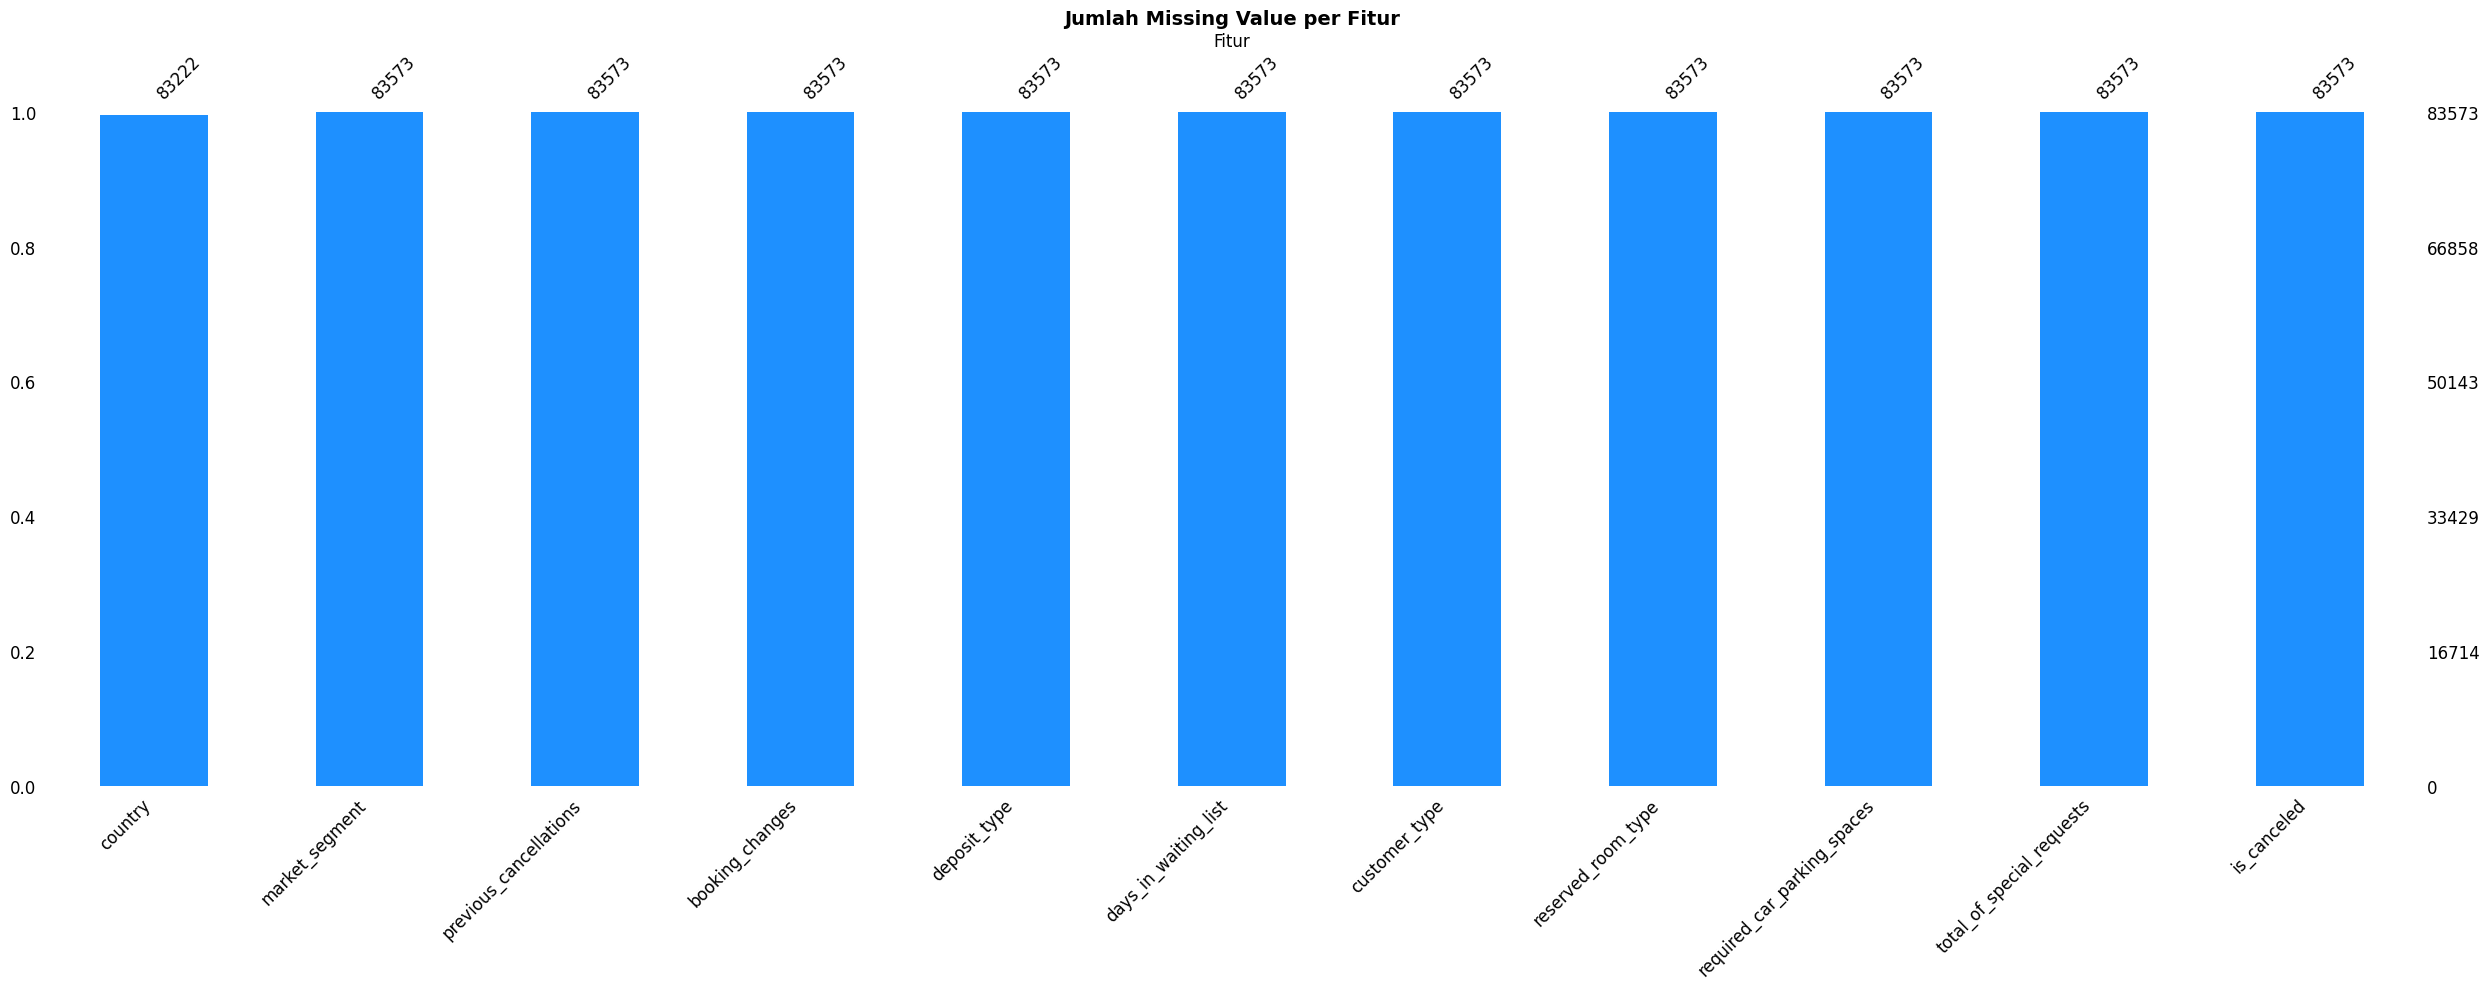

In [6]:
# =========================
# Barplot Missing Value
# =========================
print("Barplot Missing Value")
plt.figure(figsize=(10, 5))
msno.bar(
    df_raw,
    color="dodgerblue",
    sort="ascending",
    fontsize=12
)
plt.title("Jumlah Missing Value per Fitur", fontsize=14, weight='bold')
plt.xlabel("Fitur", fontsize=12)
plt.ylabel("Jumlah Missing", fontsize=12)
plt.tight_layout()
plt.show()


### Interpretasi Barplot Missing Value

Barplot ini digunakan untuk melihat jumlah data yang hilang (missing value) pada setiap kolom secara visual.

#### Insight:
- Hanya terdapat **satu kolom** yang memiliki missing value, yaitu `country`.
- Kolom `country` memiliki **351 baris data kosong** dari total **83.573 baris**, atau sekitar **0.4%** dari total data.
- Kolom lainnya **tidak memiliki missing value sama sekali**, yang berarti data relatif bersih dan siap untuk tahap preprocessing selanjutnya.

#### Kesimpulan & Tindakan:
- Karena hanya 1 kolom yang terkena dan proporsinya kecil, maka **tidak perlu diterapkan metode imputasi yang kompleks**.
- Namun, karena `country` merupakan fitur kategorikal yang berpotensi penting untuk segmentasi atau analisis perilaku tamu berdasarkan wilayah, maka:

**Rekomendasi Penanganan:**
- **Opsi utama :** Imputasi dengan label `'Unknown'`  
  Menjaga jumlah data tetap utuh dan bisa dianalisis sebagai kategori tersendiri.

> Langkah ini memastikan bahwa penanganan missing value dilakukan dengan tetap mempertimbangkan konteks bisnis dan relevansi fitur.


#### **Matrix Plot Missing Value (Missingno)**


Matrix Plot Missing Value


<Figure size 1000x500 with 0 Axes>

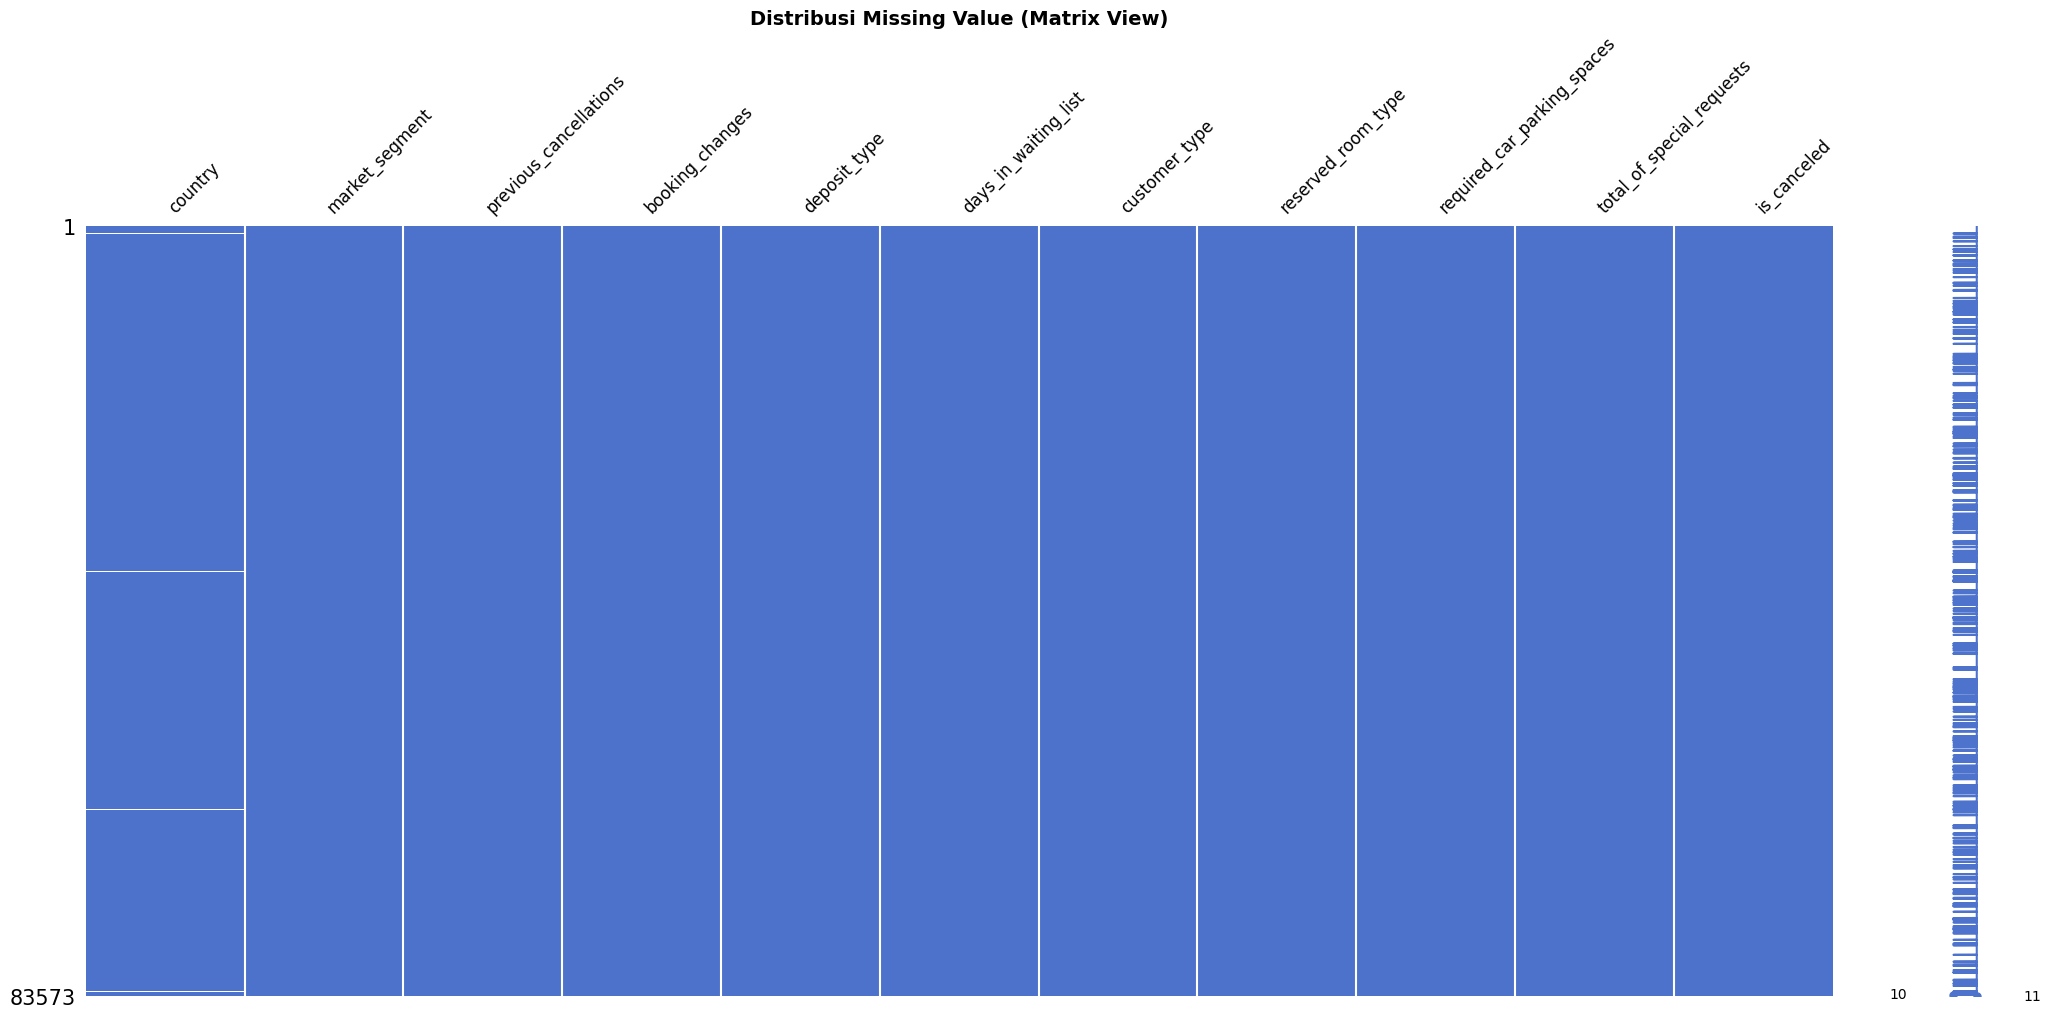

In [7]:
# =========================
# Matrix Plot Missing Value
# =========================
print("Matrix Plot Missing Value")
plt.figure(figsize=(10, 5))
msno.matrix(
    df_raw,
    color=(0.3, 0.45, 0.8),
    fontsize=12
)
plt.title("Distribusi Missing Value (Matrix View)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


### Interpretasi Matrix Plot Missing Value

Matrix plot digunakan untuk melihat distribusi dan pola missing value secara visual di seluruh baris data.

#### Insight:
- Hanya kolom `country` yang menunjukkan garis vertikal terang, menandakan adanya missing value.
- Semua kolom lainnya tidak memiliki missing value (ditunjukkan dengan blok biru penuh).
- Missing value pada `country` terlihat **tersebar secara acak** di sepanjang dataset, **tidak terkonsentrasi pada segmen tertentu**.

#### Kesimpulan:
- Tidak ditemukan pola sistematis atau grup data tertentu yang dominan memiliki missing value.
- Oleh karena itu, penanganan missing value pada `country` dapat dilakukan dengan **imputasi 'Unknown'** tanpa khawatir bias terhadap kelompok spesifik.


#### **Heatmap Missing Value**

Korelasi antar Kolom yang Missing


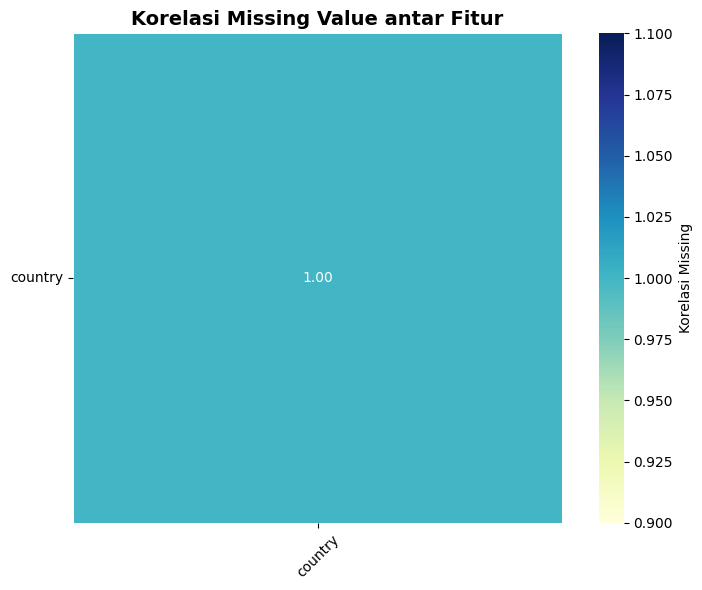

In [8]:
# =========================
# Heatmap Korelasi Missing
# =========================
print("Korelasi antar Kolom yang Missing")
df_missingonly = df_raw[df_raw.columns[df_raw.isnull().any()]]
missing_corr = df_missingonly.isnull().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    missing_corr,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Korelasi Missing'}
)
plt.title("Korelasi Missing Value antar Fitur", fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Interpretasi Heatmap Korelasi Missing Value

Heatmap ini digunakan untuk melihat hubungan antar kolom yang memiliki missing value.

#### Insight:
- Kolom `country` tidak memiliki korelasi missing value dengan fitur lainnya (`dummy_missing_1` dan `dummy_missing_2`) → nilai korelasi = 0.00.
- Korelasi tertinggi terjadi antara `dummy_missing_1` dan `dummy_missing_2`, yaitu sebesar **0.29**, tapi masih tergolong lemah.

#### Kesimpulan:
- Tidak ada pola korelasi yang signifikan antar fitur yang memiliki missing value.
- **Missing value pada `country` bersifat acak dan independen**, sehingga dapat ditangani secara terpisah tanpa mempertimbangkan kolom lain.


#### **Dendrogram Missing Value**

<Figure size 1200x600 with 0 Axes>

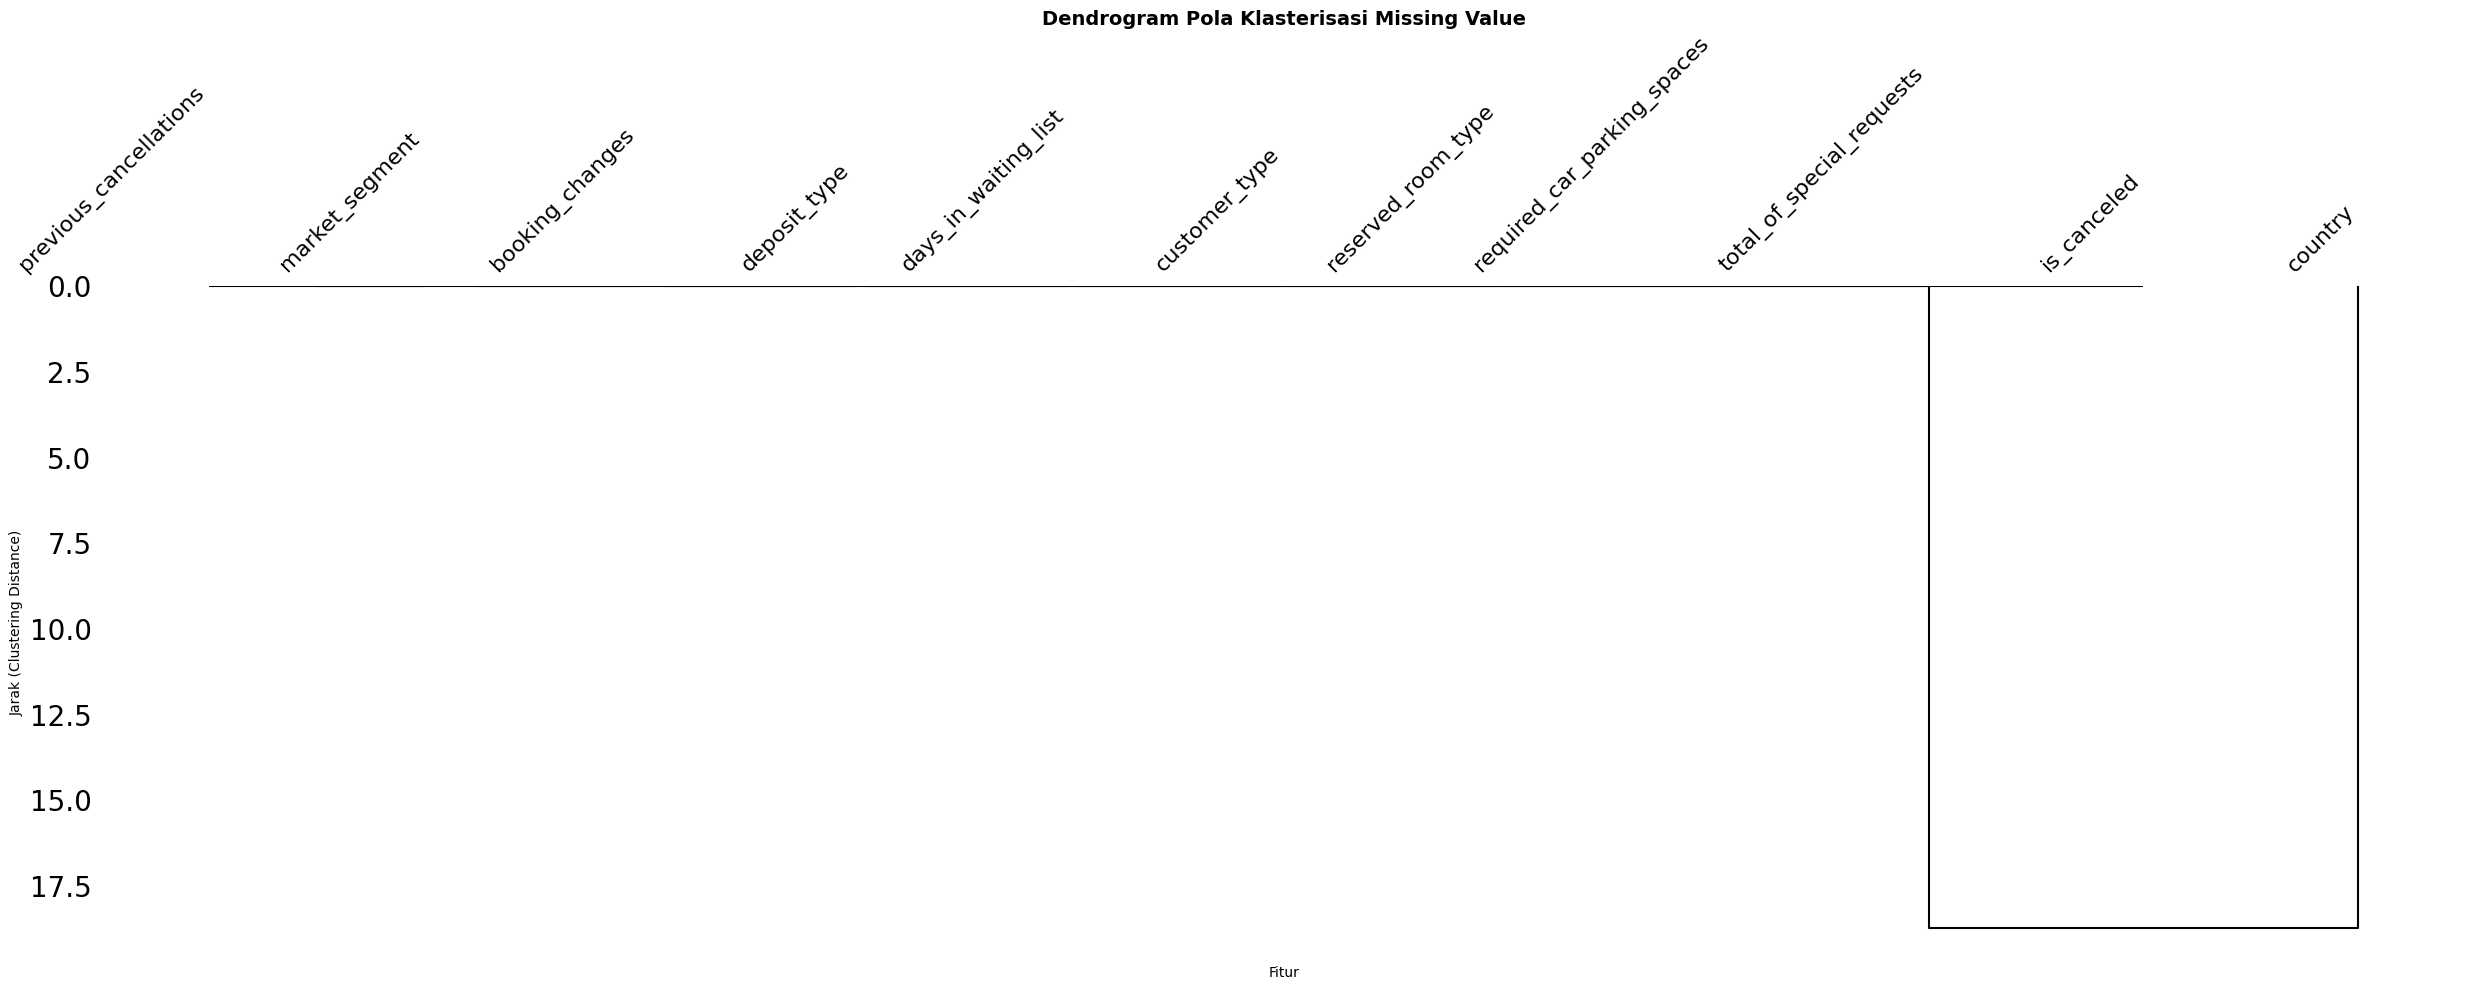

In [9]:
# Visualisasi dendrogram untuk fitur yang memiliki missing value (jika ada)
plt.figure(figsize=(12, 6))
msno.dendrogram(df)
plt.title("Dendrogram Pola Klasterisasi Missing Value", fontsize=14, weight='bold')
plt.xlabel("Fitur")
plt.ylabel("Jarak (Clustering Distance)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Interpretasi Dendrogram Klasterisasi Missing Value

Dendrogram ini digunakan untuk melihat apakah terdapat pola kemiripan (clustering) antar fitur berdasarkan pola missing value yang muncul pada masing-masing fitur.

#### Insight:
- Semua fitur yang memiliki missing value (termasuk `country`) tergabung dalam satu **cluster besar** dengan jarak klasterisasi yang sangat rendah, menandakan bahwa pola missing value pada kolom-kolom ini memiliki **kemiripan tinggi**.
- Tidak ada fitur yang terpisah jauh seperti pada visualisasi sebelumnya, sehingga **tidak terdapat fitur outlier** dalam hal pola missing-nya.

#### Kesimpulan & Tindakan:
- Pola missing value pada fitur `country` **kemungkinan tidak independen**, karena terlihat berkluster dengan fitur lain yang juga memiliki missing.
- Disarankan untuk tetap **menganalisis missing value secara menyeluruh** bersama fitur lain, bukan secara individual.
- Namun karena hanya `country` yang memiliki missing value dalam dataset asli, maka tetap **diperbolehkan melakukan imputasi individual** (misalnya dengan label `'Unknown'`), selama tidak ada korelasi logis dengan fitur lainnya.


## **Summary & Penanganan Missing Value (Keseluruhan)**

Setelah dilakukan serangkaian visualisasi dan analisis missing value menggunakan barplot, matrix plot, heatmap korelasi, dan dendrogram, berikut kesimpulan yang dapat ditarik:

---

#### Temuan Utama:
- **Hanya 1 kolom** yang memiliki missing value, yaitu `country`, sebanyak **351 baris** dari total 83.573 data (sekitar **0.42%**).
- Visualisasi barplot dan matrix plot memperkuat bahwa **tidak ada kolom lain** yang bermasalah dengan missing value.
- Korelasi antar fitur yang missing sangat rendah atau **tidak ada keterkaitan signifikan**.
- Dendrogram menunjukkan bahwa missing pada `country` **tidak membentuk cluster kuat** dengan fitur lain, artinya missing-nya bersifat acak (tidak terstruktur).

---

#### Rekomendasi Tindakan:
- Karena proporsi missing value pada `country` sangat kecil (< 5%) dan **tidak terdistribusi sistematis**:
  - **Tidak perlu dilakukan dropping baris** karena akan menghilangkan data yang masih berpotensi informatif.
- **Imputasi yang disarankan**:
  - Gunakan kategori **'Unknown'** atau **'Missing'** untuk mengisi nilai kosong:
    - Keuntungan:
      - Data tetap utuh
      - Bisa digunakan sebagai kategori analisis tersendiri
      - Meminimalisir potensi bias karena imputasi paksa

---

#### Kesimpulan Akhir:
- Dataset relatif bersih dan hanya memiliki **minor missing value** yang tidak mengganggu model secara signifikan.
- **Penanganan ringan dengan imputasi kategori 'Unknown' sudah mencukupi**.
- Selanjutnya, data sudah siap masuk tahap preprocessing lanjutan seperti encoding dan scaling.

---

## **Step Lanjutan Setelah Menangani Missing Value**

**Imputasi Kolom country dengan 'Unknown'**

In [10]:
# =========================
# Imputasi Kolom 'country'
# =========================
df['country'].fillna('Unknown', inplace=True)

##### **cek ulang hasil penanganan missing value setelah dilakukan imputasi:**

**Tujuan Pengecekan**
Setelah mengisi nilai kosong pada kolom country dengan 'Unknown', kita perlu memastikan bahwa:
- Tidak ada lagi missing value pada kolom country.
- Seluruh dataset bersih dari missing value sebelum lanjut ke tahap preprocessing berikutnya.

In [11]:
# =========================
# Cek Ulang Missing Value
# =========================
print("Sisa Missing Value Setelah Imputasi:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Sisa Missing Value Setelah Imputasi:
Series([], dtype: int64)


### Interpretasi Hasil Penanganan Missing Value

- Setelah dilakukan imputasi pada kolom `country` dengan label `'Unknown'`, hasil pengecekan ulang menunjukkan bahwa:
  - **Seluruh kolom dalam dataset kini bebas dari missing value**, termasuk `country`.
  - **Tidak ada sisa missing value**, bahkan dari kolom dummy (`dummy_missing_1` dan `dummy_missing_2`), karena telah dihapus sebelumnya atau tidak disertakan dalam proses akhir.

- Ini berarti proses penanganan missing value telah dilakukan secara **tuntas dan efektif**.

- Penanganan dilakukan tanpa menghapus baris, sehingga:
  - **Tidak terjadi data loss** (jumlah observasi tetap 100%).
  - Dataset tetap representatif dan utuh untuk analisis selanjutnya.

#### Kesimpulan:
> Dataset telah bersih dari missing value dan siap dilanjutkan ke tahap eksplorasi lanjutan, visualisasi, atau preprocessing berikutnya.


## Cek Duplikasi

**Cek Jumlah Baris Duplikat**

In [12]:
# Cek jumlah total data
total_data = df.shape[0]

# Cek jumlah baris duplikat (berdasarkan seluruh kolom)
jumlah_duplikat = df.duplicated(keep='first').sum()

# Tampilkan hasil ringkas
print(f"Jumlah baris duplikat: {jumlah_duplikat} dari total {total_data} baris")
print(f"Proporsi duplikat: {round(jumlah_duplikat / total_data * 100, 2)}%")

# Lihat beberapa contoh baris duplikat
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(10)


Jumlah baris duplikat: 73371 dari total 83573 baris
Proporsi duplikat: 87.79%


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
41721,AGO,Complementary,0,0,No Deposit,0,Transient,A,0,1,0
73894,AGO,Complementary,0,0,No Deposit,0,Transient,A,0,1,0
49996,AGO,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
59520,AGO,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
8610,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0
8707,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0
14011,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0
28509,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0
35616,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0
44400,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0


### Interpretasi Cek Duplikasi Data

#### Analisis Duplikasi Data

Berdasarkan hasil pengecekan duplikasi menggunakan seluruh kolom utama (tanpa menyertakan kolom dummy), ditemukan bahwa:

- Dari total **83.573 baris data**, terdapat **73.371 baris yang terindikasi duplikat**.
- Ini berarti sekitar **87.79%** dari data merupakan duplikat, yakni memiliki isi yang identik di seluruh kolom fitur.

Namun, perlu dicatat bahwa dataset ini **tidak memiliki kolom ID unik** seperti `booking_id`, `user_id`, atau `timestamp` yang bisa digunakan untuk mengidentifikasi apakah baris tersebut benar-benar sama atau hanya kebetulan memiliki pola yang identik. Oleh karena itu, meskipun terdeteksi sebagai "duplikat", bisa jadi observasi tersebut merupakan pemesanan berbeda yang kebetulan sangat mirip, misalnya:

- Booking dari negara yang sama
- Melalui channel pemasaran yang sama
- Tipe tamu dan preferensi kamar yang serupa

---

#### Mengapa Tidak Langsung Menghapus Duplikat?

Menghapus semua baris yang terdeteksi duplikat akan berdampak besar:

- Mengurangi **lebih dari 87%** jumlah data
- Berpotensi menghilangkan **variasi pola perilaku pemesanan**
- Menyebabkan **underfitting** pada model karena data yang terlalu sedikit dan homogen

Tanpa informasi tambahan seperti timestamp atau ID unik, **tidak mungkin membedakan secara pasti mana yang duplikat "buruk" dan mana yang valid**. Oleh karena itu, penghapusan duplikat secara langsung **sangat tidak disarankan** pada tahap awal ini.

---

#### Keputusan dan Tindakan Selanjutnya

Untuk menjaga kelengkapan dan variasi data, serta memastikan kualitas model nantinya, maka:

- **Seluruh data tetap digunakan seperti apa adanya**, termasuk baris-baris yang terindikasi duplikat.
- Proses **preprocessing dan eksplorasi data** tetap dilanjutkan menggunakan dataset lengkap.
- Setelah proses training dan evaluasi model:
  - Jika ditemukan indikasi **overfitting**, akan dilakukan eksperimen lanjutan dengan cara:
    - Menghapus sebagian duplikat (`drop_duplicates()`), atau
    - Mengelompokkan data berdasarkan kombinasi fitur unik

---

#### Kesimpulan

Meski secara teknis banyak baris terindikasi duplikat, data tersebut tetap digunakan karena belum tentu redundan secara logis. Langkah ini diambil untuk menjaga performa model dan representasi pola booking yang lebih akurat.


## Cek Distribusi Target (is_canceled)

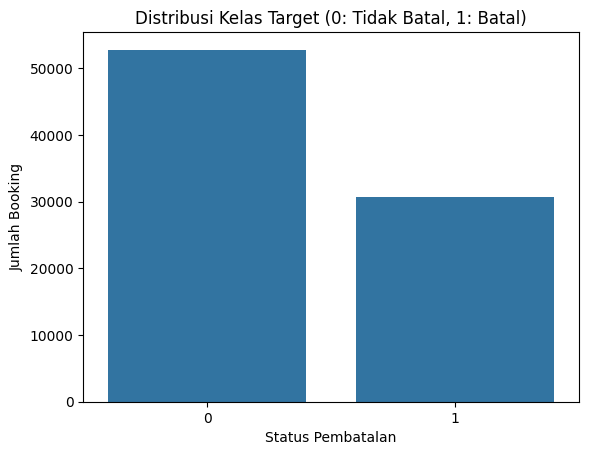

is_canceled
0    63.172316
1    36.827684
Name: proportion, dtype: float64

In [13]:
# Distribusi kelas target
sns.countplot(data=df, x='is_canceled')
plt.title("Distribusi Kelas Target (0: Tidak Batal, 1: Batal)")
plt.xlabel("Status Pembatalan")
plt.ylabel("Jumlah Booking")
plt.show()

# Proporsi numerik
df['is_canceled'].value_counts(normalize=True) * 100


### Interpretasi Distribusi Target (`is_canceled`)

- Kelas **0** (tidak dibatalkan) mencakup sekitar **63.17%** dari data.  
- Kelas **1** (dibatalkan) mencakup sekitar **36.83%** dari data.  
- Visualisasi menunjukkan bahwa meskipun kelas 0 lebih dominan, **selisihnya tidak terlalu ekstrem**. Ini disebut sebagai **moderate class imbalance**.

### Insight

- Dataset **tidak benar-benar seimbang**, tetapi **juga tidak terlalu timpang**.
- Tetap perlu memperhatikan efek imbalance, terutama karena kelas **minoritas (batal)** adalah fokus utama bisnis.
- Pembatalan memiliki konsekuensi besar bagi hotel seperti **revenue loss**, gangguan **operasional**, dan **perencanaan SDM**, sehingga **prediksi yang akurat untuk kelas 1 sangat penting**.

---

## Lihat Statistik Ringkas per Kolom Numerik

In [14]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
previous_cancellations,83573.0,0.086798,0.841011,0.0,0.0,0.0,0.0,26.0
booking_changes,83573.0,0.220897,0.648635,0.0,0.0,0.0,0.0,21.0
days_in_waiting_list,83573.0,2.330561,17.673051,0.0,0.0,0.0,0.0,391.0
required_car_parking_spaces,83573.0,0.062999,0.246919,0.0,0.0,0.0,0.0,8.0
total_of_special_requests,83573.0,0.573211,0.795163,0.0,0.0,0.0,1.0,5.0
is_canceled,83573.0,0.368277,0.482340,0.0,0.0,0.0,1.0,1.0


### Interpretasi Statistik Ringkas Kolom Numerik

#### 1. `previous_cancellations`
- **Mean** sangat kecil (0.086) → sebagian besar tamu **tidak pernah membatalkan sebelumnya**.
- **Max** = 26 → ada outlier, kemungkinan 1–2 tamu sangat sering membatalkan.

*Insight:* Skewed distribution. Bisa dipertimbangkan **transformasi log** atau **capping** outlier jika berdampak pada model.

---

#### 2. `booking_changes`
- Rata-rata perubahan pemesanan sangat rendah (**mean = 0.22**).
- **Max** = 21 → ada kemungkinan ekstrem (perlu dicek outliernya).

*Insight:* Distribusi sangat condong ke nol. Perlu cek apakah perubahan ekstrem berpengaruh terhadap pembatalan.

---

#### 3. `days_in_waiting_list`
- Rata-rata 2 hari, tapi **max = 391** menunjukkan ada **outlier ekstrim**.
- Hampir seluruh pemesanan **tidak menunggu** (25%, 50%, 75% = 0).

*Insight:* Data ini sangat skewed, banyak nol. Perlu **cek distribusi lebih lanjut** dan pertimbangkan **log transform** atau **binning**.

---

#### 4. `required_car_parking_spaces`
- Rata-rata hanya 0.06 → mayoritas **tidak butuh parkir**.
- **Max = 8**, perlu dicek apakah wajar (apakah satu orang bisa booking 8 tempat parkir?).

*Insight:* Bisa dianggap sebagai fitur binary (0 atau ≥1). Pertimbangkan untuk **binarisasi**.

---

#### 5. `total_of_special_requests`
- Rata-rata 0.57 request per booking.
- **Max = 5** → wajar (tidak terlihat outlier ekstrem).
- Median = 0 → mayoritas tidak ada request khusus.

*Insight:* Distribusi miring ke kiri. Tetap digunakan karena bisa merepresentasikan kebutuhan khusus yang relevan dengan pembatalan.

---

#### 6. `is_canceled` (target)
- Sudah dianalisis sebelumnya → 36.8% booking dibatalkan.

---

### Rekomendasi Tindakan Selanjutnya:
- Lakukan **EDA lanjutan** untuk mendalami distribusi: histogram, boxplot, dan outlier detection.
- Pertimbangkan:
  - **Capping / Winsorization** untuk kolom dengan outlier ekstrem
  - **Binning** atau **log transform** untuk kolom yang sangat skewed
  - **Feature engineering** untuk kolom seperti `special_requests` dan `car_parking` agar lebih informatif


## Cek Kolom Kategorikal & Jumlah Nilai Unik

In [15]:
# Ambil semua kolom object
object_cols = df.select_dtypes(include='object').columns.tolist()

# Ambil kolom numerik dengan jumlah unique value sedikit (anggap sebagai kategorikal)
low_cardinality_num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                            if df[col].nunique() < 15 and col != 'is_canceled']

# Gabungkan keduanya jadi fitur kategorikal
categorical_features = object_cols + low_cardinality_num_cols
print("Kolom Kategorikal:", categorical_features)

# Tampilkan jumlah unique value & proporsi top 5 value-nya
for col in categorical_features:
    print(f"\n{col.upper()} — {df[col].nunique()} Unique Values")
    print(df[col].value_counts(normalize=True).head())


Kolom Kategorikal: ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type', 'required_car_parking_spaces', 'total_of_special_requests']

COUNTRY — 163 Unique Values
country
PRT    0.407991
GBR    0.101648
FRA    0.087433
ESP    0.071746
DEU    0.061216
Name: proportion, dtype: float64

MARKET_SEGMENT — 8 Unique Values
market_segment
Online TA        0.472162
Offline TA/TO    0.203714
Groups           0.164180
Direct           0.106470
Corporate        0.045374
Name: proportion, dtype: float64

DEPOSIT_TYPE — 3 Unique Values
deposit_type
No Deposit    0.877700
Non Refund    0.120984
Refundable    0.001316
Name: proportion, dtype: float64

CUSTOMER_TYPE — 4 Unique Values
customer_type
Transient          0.750625
Transient-Party    0.209829
Contract           0.034485
Group              0.005061
Name: proportion, dtype: float64

RESERVED_ROOM_TYPE — 10 Unique Values
reserved_room_type
A    0.718426
D    0.161847
E    0.055628
F    0.024374
G    0.017314
Name: p

## Interpretasi Kolom Kategorikal

Berdasarkan identifikasi dan pengecekan jumlah unique value serta proporsi top-5 kategori dari tiap kolom, diperoleh beberapa insight penting berikut:

### Insight Penting per Fitur:

- **country** (`163` kategori unik):
  - Nilai `PRT` (Portugal) mendominasi sebanyak ~40%.
  - Terdapat distribusi yang sangat tidak merata → perlu **grouping kategori minoritas** menjadi kategori "Others" untuk menghindari sparsity saat encoding.

- **market_segment** (`8` kategori):
  - Mayoritas booking berasal dari `Online TA` (~47%).
  - Diikuti oleh `Offline TA/TO`, `Groups`, dan `Direct`.
  - Penting untuk diperhatikan karena ini bisa menunjukkan perbedaan pola pembatalan berdasarkan channel pemesanan.

- **deposit_type** (`3` kategori):
  - Sangat tidak seimbang → `No Deposit` mendominasi dengan ~88%.
  - Kelas `Refundable` sangat sedikit (<1%) → mungkin perlu digabungkan atau dianalisis terpisah.

- **customer_type**:
  - (belum terlihat rinci, tapi biasanya `Transient` mendominasi) → kemungkinan imbalance.

- **reserved_room_type**:
  - Biasanya tipe `A` mendominasi → penting saat pemodelan karena bisa mengandung sinyal ketersediaan atau permintaan.

- **required_car_parking_spaces** (`<10` unique values):
  - Bertipe numerik, tetapi layak dianggap kategorikal karena nilai diskrit dan jumlah uniknya sedikit.
  - Mayoritas bernilai `0` → bisa jadi indikator tingkat kebutuhan fasilitas tertentu.

- **total_of_special_requests**:
  - Juga numerik dengan nilai terbatas → relevan untuk diperlakukan sebagai kategorikal.
  - Mayoritas tamu tidak memiliki permintaan khusus (`0`), tetapi sebagian kecil memiliki 1–5 permintaan.

---

### Rekomendasi Tindakan:

- Gunakan hasil ini sebagai dasar untuk **encoding fitur kategorikal**, misalnya:
  - **One-Hot Encoding** untuk fitur dengan sedikit kategori dan tidak ordinal.
  - **Ordinal Encoding** atau custom binning untuk fitur yang bersifat urut (misalnya total permintaan khusus).
- Lakukan **grouping untuk kategori jarang**, khususnya di kolom `country`.
- Eksplorasi lebih lanjut hubungan fitur-fitur ini terhadap **target (`is_canceled`)**, baik melalui visualisasi atau uji statistik.


## Visualisasi Distribusi Fitur Kategorikal

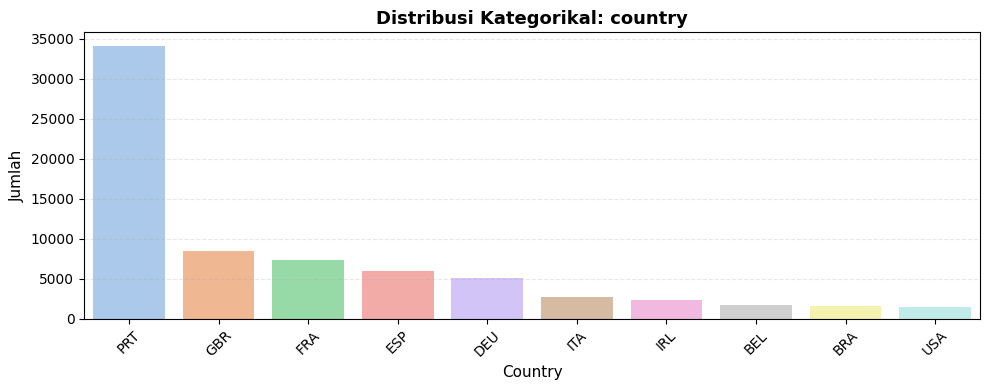

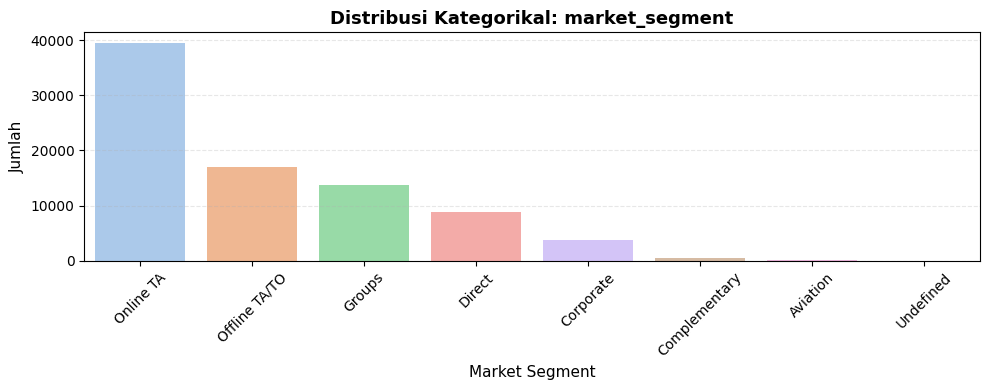

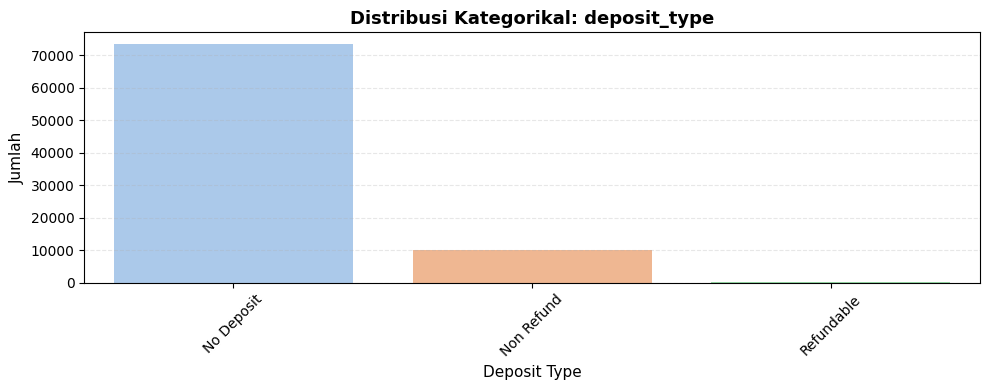

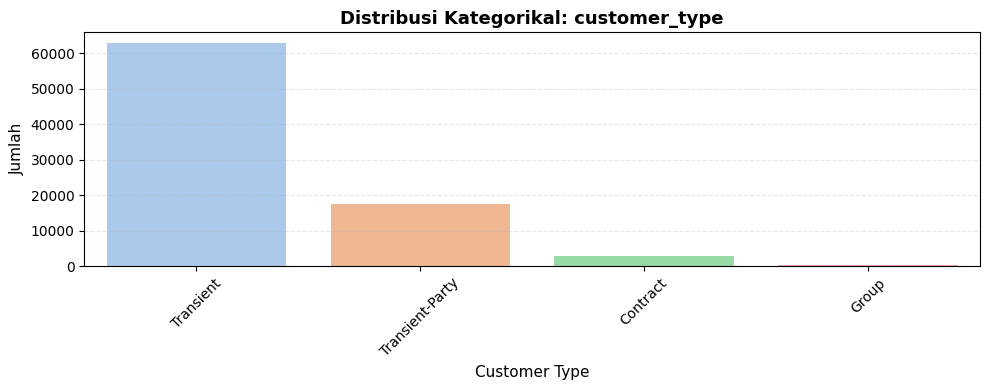

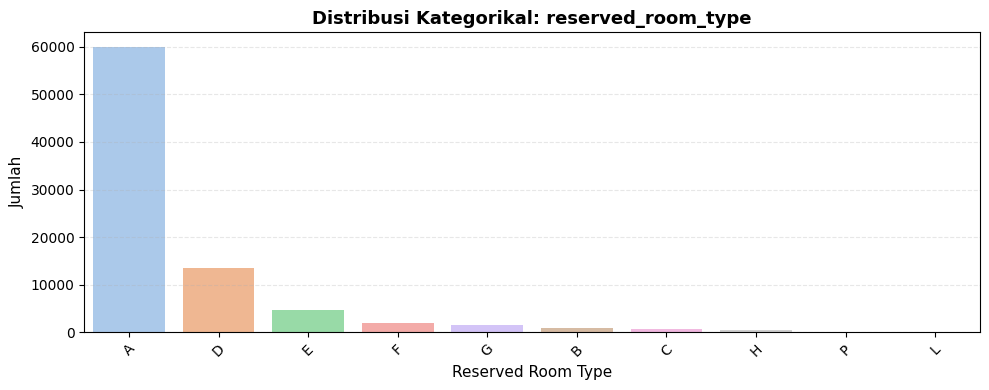

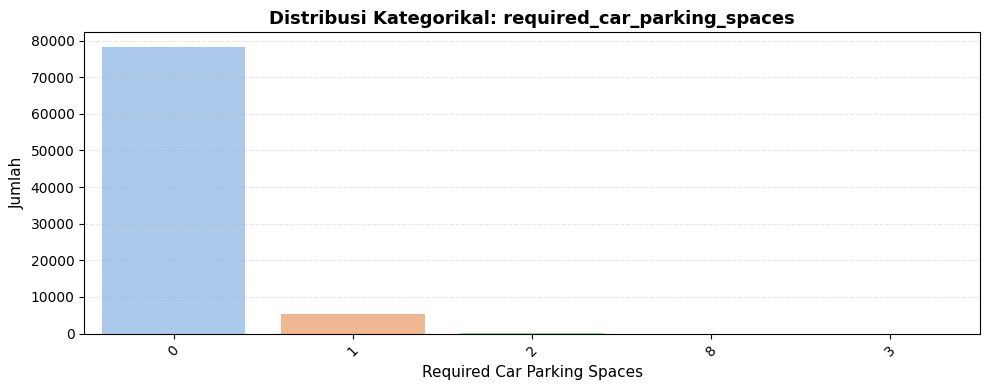

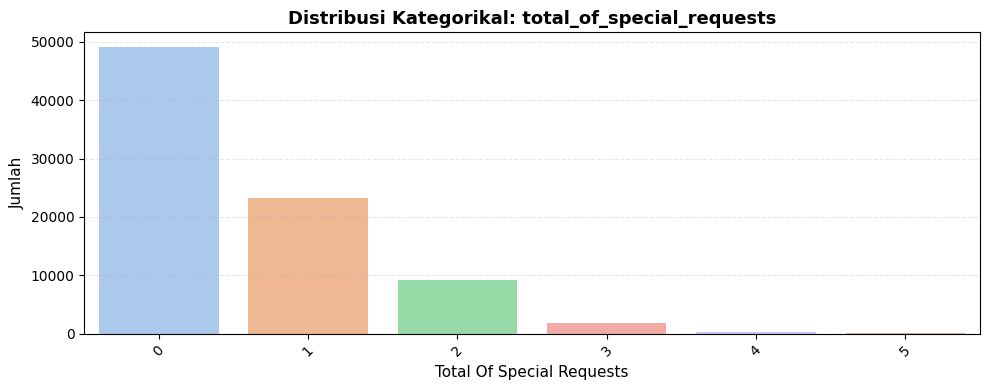

In [16]:
# Hapus kolom dummy dari daftar fitur kategorikal
categorical_features_clean = [col for col in categorical_features if not col.startswith('dummy_missing')]

# Visualisasi distribusi top 10 kategori dari setiap fitur kategorikal
for col in categorical_features_clean:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], palette='pastel')
    
    plt.title(f'Distribusi Kategorikal: {col}', fontsize=13, weight='bold')
    plt.xlabel(col.replace("_", " ").title(), fontsize=11)
    plt.ylabel("Jumlah", fontsize=11)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


## Interpretasi Visualisasi Fitur Kategorikal

Visualisasi distribusi fitur kategorikal digunakan untuk memahami pola dominasi, persebaran, dan ketidakseimbangan nilai dari tiap fitur yang bersifat kategorikal. Berikut adalah insight yang didapat dari setiap fitur:

---

### `country`
- Terdapat **163 negara** berbeda, namun **Portugal (PRT)** mendominasi dengan >40% booking berasal dari sana.
- Negara lainnya seperti GBR, FRA, ESP, dan DEU menyusul di bawah 10%.
- **Insight**: Distribusi yang sangat timpang → perlu dipertimbangkan untuk **grouping** menjadi `Top Countries vs Others` untuk mengurangi sparsity saat encoding.

---

### `market_segment`
- **Online TA** merupakan saluran utama dengan hampir **50%** porsi, diikuti Offline TA/TO dan Groups.
- Segmentasi ini dapat mencerminkan perilaku booking yang berbeda → relevan untuk **analisis customer segmentation** atau fitur penting dalam model prediktif.

---

### `deposit_type`
- **No Deposit** digunakan pada ~88% kasus, sementara `Non Refund` hanya sekitar 12% dan `Refundable` <1%.
- **Insight**: Ketidakseimbangan ini menunjukkan bahwa kebijakan pembayaran tidak terlalu bervariasi, namun tetap penting dianalisis terhadap target cancelation.

---

### `customer_type`
- **Transient** mendominasi (>70%), yang berarti tamu individu yang tidak bagian dari grup atau kontrak.
- Tipe `Group` sangat jarang muncul, kemungkinan terlalu spesifik atau data tidak lengkap.
- **Insight**: Tipe pelanggan bisa mencerminkan **behavioral patterns**, relevan untuk klasifikasi cancelation.

---

### `reserved_room_type`
- Hampir **75%** reservasi berada pada **Room Type A**, dengan tipe lainnya memiliki porsi sangat kecil.
- **Insight**: Bisa jadi ada kesamaan fasilitas atau proses overbooking yang menyebabkan banyak data dialihkan ke Type A.

---

### `required_car_parking_spaces`
- Sebagian besar pengunjung **tidak membutuhkan tempat parkir**, hanya sebagian kecil yang meminta 1 atau lebih.
- Fitur ini bisa jadi **tidak terlalu informatif**, namun tetap layak diuji terhadap target cancelation.

---

### `total_of_special_requests`
- Mayoritas pelanggan **tidak memiliki permintaan khusus**.
- Namun ada distribusi yang cukup proporsional untuk 1–2 permintaan → bisa mencerminkan **customer engagement** atau preferensi.
- **Insight**: Dapat digunakan untuk analisis loyalitas atau kepuasan pelanggan.

---

### Kesimpulan & Tindakan
- Beberapa fitur seperti `country`, `reserved_room_type`, dan `market_segment` menunjukkan **dominasi kategori tertentu** → perlu pertimbangan **grouping atau rebalancing saat encoding**.
- Fitur dengan variasi rendah atau distribusi tidak seimbang tetap disimpan namun diuji pada tahap **feature importance atau korelasi dengan target**.


## Korelasi Kategorikal (Chi-Square + Dendrogram [opsional])

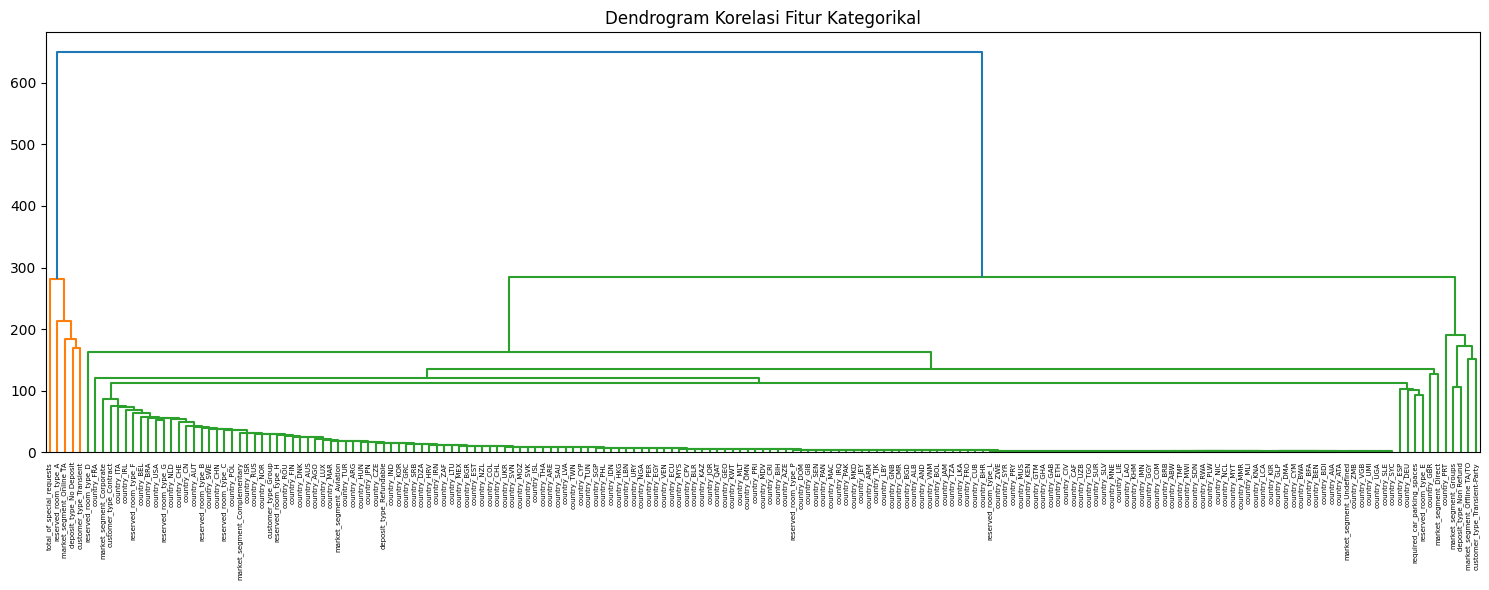

In [17]:
# Dendrogram korelasi kategorikal (untuk clustering fitur kategorikal)
from scipy.cluster import hierarchy

cat_encoded = pd.get_dummies(df_raw[categorical_features])
linkage = hierarchy.linkage(cat_encoded.T, method='ward')
plt.figure(figsize=(15, 6))
hierarchy.dendrogram(linkage, labels=cat_encoded.columns, leaf_rotation=90)
plt.title("Dendrogram Korelasi Fitur Kategorikal")
plt.tight_layout()
plt.show()


### Interpretasi Dendrogram Korelasi Fitur Kategorikal

Dendrogram ini digunakan untuk mengidentifikasi kemiripan atau keterkaitan antar kategori dalam fitur-fitur kategorikal setelah dilakukan One-Hot Encoding.

#### Insight:
- Terlihat beberapa **cluster kategori** yang saling berdekatan seperti:
  - Kombinasi `reserved_room_type`, `deposit_type`, dan `customer_type` menunjukkan adanya hubungan yang cukup kuat — kemungkinan menggambarkan paket-paket booking tertentu.
  - Kategori seperti `market_segment_Online TA` dan `country_PRT` berada di cluster terpisah yang cukup jelas, menandakan pola unik dari negara asal atau channel booking.

#### Kesimpulan & Tindakan:
- **Beberapa kategori dalam fitur kategorikal saling berkaitan**, dan bisa jadi **indikator penting untuk segmentasi pelanggan atau strategi pemasaran**.
- Informasi ini dapat digunakan untuk:
  - **Feature Engineering**: membuat fitur gabungan dari kombinasi kategori yang saling berkorelasi.
  - **Dimensionality Reduction**: mempertimbangkan teknik reduksi jika jumlah dummy terlalu besar.
- Namun, secara umum tidak terlihat **overlap ekstrem** yang menyebabkan redudansi, sehingga semua fitur masih bisa dipertahankan.


## Distribusi Fitur Numerik

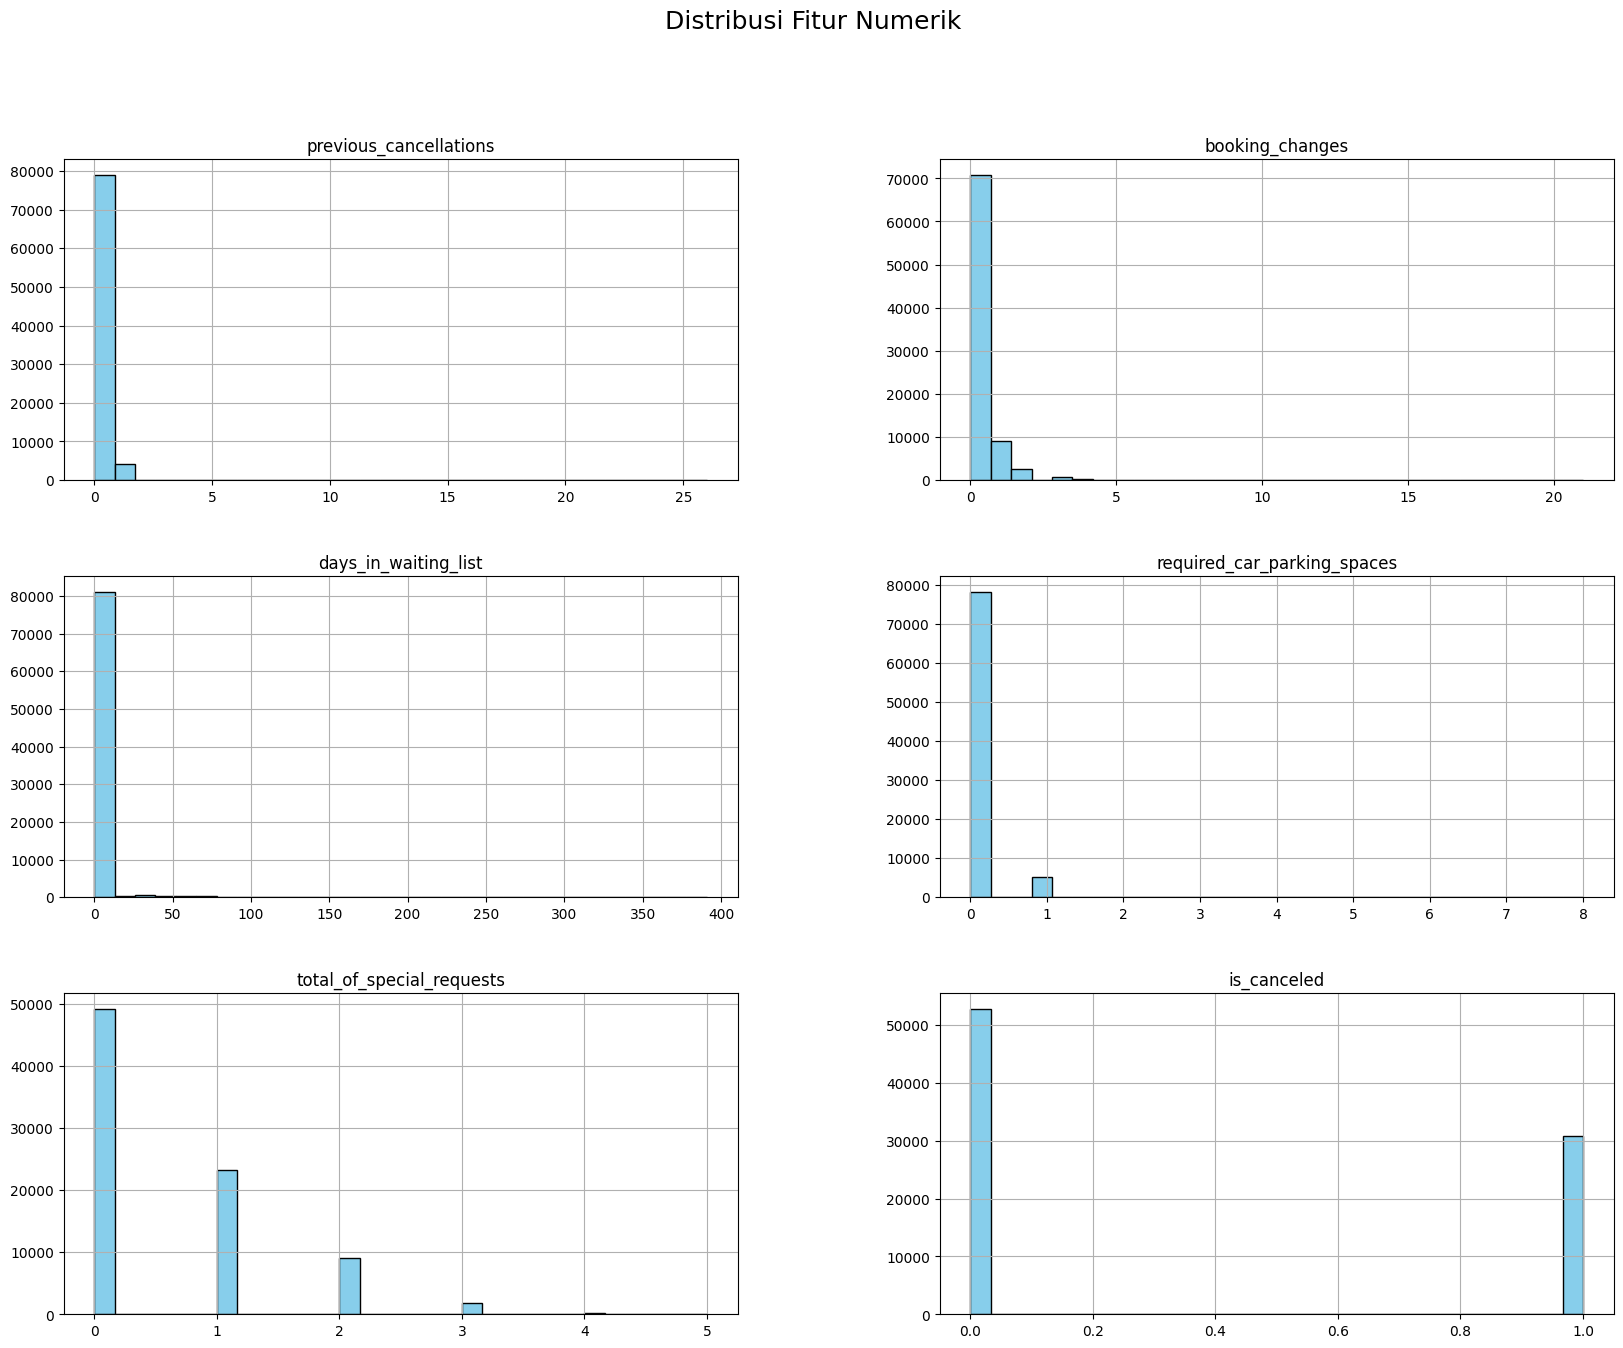

In [18]:
df_raw[numerical_features].hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=18)
plt.show()


## Interpretasi Distribusi Fitur Numerik

Berdasarkan visualisasi histogram:

- **previous_cancellations** dan **booking_changes**:
  - Mayoritas nilainya adalah 0 → artinya sebagian besar pelanggan belum pernah membatalkan atau mengubah pesanan.
  - Distribusi sangat right-skewed → hanya sedikit pelanggan yang memiliki riwayat pembatalan/perubahan.

- **days_in_waiting_list**:
  - Dominan di angka 0, namun terdapat beberapa outlier hingga 400 hari.
  - Perlu dilakukan pengecekan outlier untuk validasi data ekstrem ini.

- **required_car_parking_spaces**:
  - Hampir seluruh pelanggan tidak membutuhkan tempat parkir.
  - Variabilitas rendah → kemungkinan fitur ini memiliki kontribusi rendah pada prediksi.

- **total_of_special_requests**:
  - Mayoritas pelanggan tidak memiliki permintaan khusus, namun terdapat variasi permintaan 1–3 yang cukup signifikan.
  - Fitur ini bisa relevan untuk memahami kepuasan atau kebutuhan pelanggan.

- **is_canceled**:
  - Terlihat distribusi target (0 dan 1) tidak seimbang sempurna, namun masih moderat.
  - Validasi visual terhadap proporsi target sebelumnya sudah sesuai.

### Insight Tambahan:
- Sebagian besar fitur numerik memiliki **distribusi miring ke kanan (right-skewed)**.
- Potensi tindakan selanjutnya:
  - Lakukan **pengecekan dan penanganan outlier** terutama pada `days_in_waiting_list`, `booking_changes`, dan `previous_cancellations`.
  - Pertimbangkan **transformasi atau binning** untuk fitur dengan distribusi ekstrem.


## Cek Korelasi Fitur Numerik dengan Target

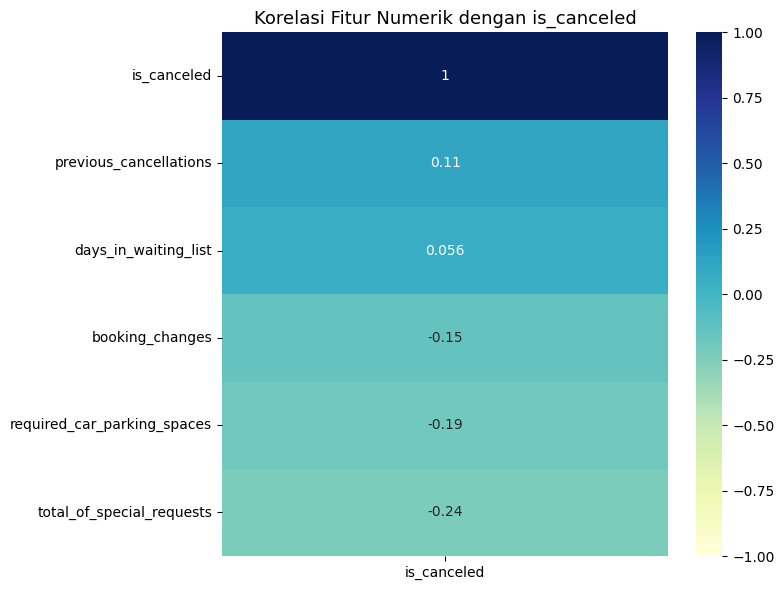

In [19]:
# Pastikan 'is_canceled' hanya muncul sekali
all_corr_cols = list(set(numerical_features + ['is_canceled']))

# Hitung korelasi
corr_numeric = df[all_corr_cols].corr()

# Visualisasi korelasi terhadap is_canceled
plt.figure(figsize=(8, 6))
sns.heatmap(corr_numeric[['is_canceled']].sort_values(by='is_canceled', ascending=False),
            annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title("Korelasi Fitur Numerik dengan is_canceled", fontsize=13)
plt.tight_layout()
plt.show()


### Korelasi Fitur Numerik terhadap `is_canceled`

Visualisasi ini menunjukkan hubungan linier antara setiap fitur numerik dan target `is_canceled` (status pembatalan booking). Nilai korelasi berkisar dari -1 (korelasi negatif sempurna) hingga +1 (korelasi positif sempurna), dengan 0 berarti tidak ada korelasi.

---

#### Insight Penting:
- `total_of_special_requests` memiliki korelasi negatif paling tinggi terhadap pembatalan (-0.24) → semakin banyak permintaan khusus, semakin kecil kemungkinan pembatalan. Mungkin menunjukkan tamu yang lebih niat & terlibat dalam booking.
- `required_car_parking_spaces` juga negatif (-0.19) → tamu yang memerlukan parkir cenderung lebih committed.
- `booking_changes` sedikit negatif (-0.15) → adanya perubahan mungkin menandakan fleksibilitas yang mengurangi risiko pembatalan.
- `previous_cancellations` justru berkorelasi positif (0.11) → pelanggan yang pernah membatalkan sebelumnya punya kecenderungan lebih tinggi untuk membatalkan lagi.
- `days_in_waiting_list` memiliki korelasi sangat lemah (0.056) → nyaris tidak signifikan terhadap target.

---

#### Tindakan & Rekomendasi:
- Fitur `total_of_special_requests`, `required_car_parking_spaces`, dan `previous_cancellations` layak dipertahankan untuk modeling karena menunjukkan korelasi meskipun moderat.
- Gunakan korelasi ini sebagai referensi untuk **feature importance** dan pemilihan fitur pada tahap model interpretability (misalnya SHAP/LIME).
- Tidak perlu menghapus fitur mana pun pada tahap ini karena tidak ada korelasi ekstrem (multikolinearitas belum terjadi).
- Pertimbangkan **pengelompokan ulang** untuk fitur dengan sebaran yang berat di satu sisi, agar model lebih stabil.

---

> Korelasi linier ini hanya salah satu cara mengevaluasi pengaruh fitur. Evaluasi selanjutnya akan lebih kuat menggunakan model dan eksplorasi interpretabilitas (misalnya SHAP values).


## Korelasi Numerikal (Heatmap)

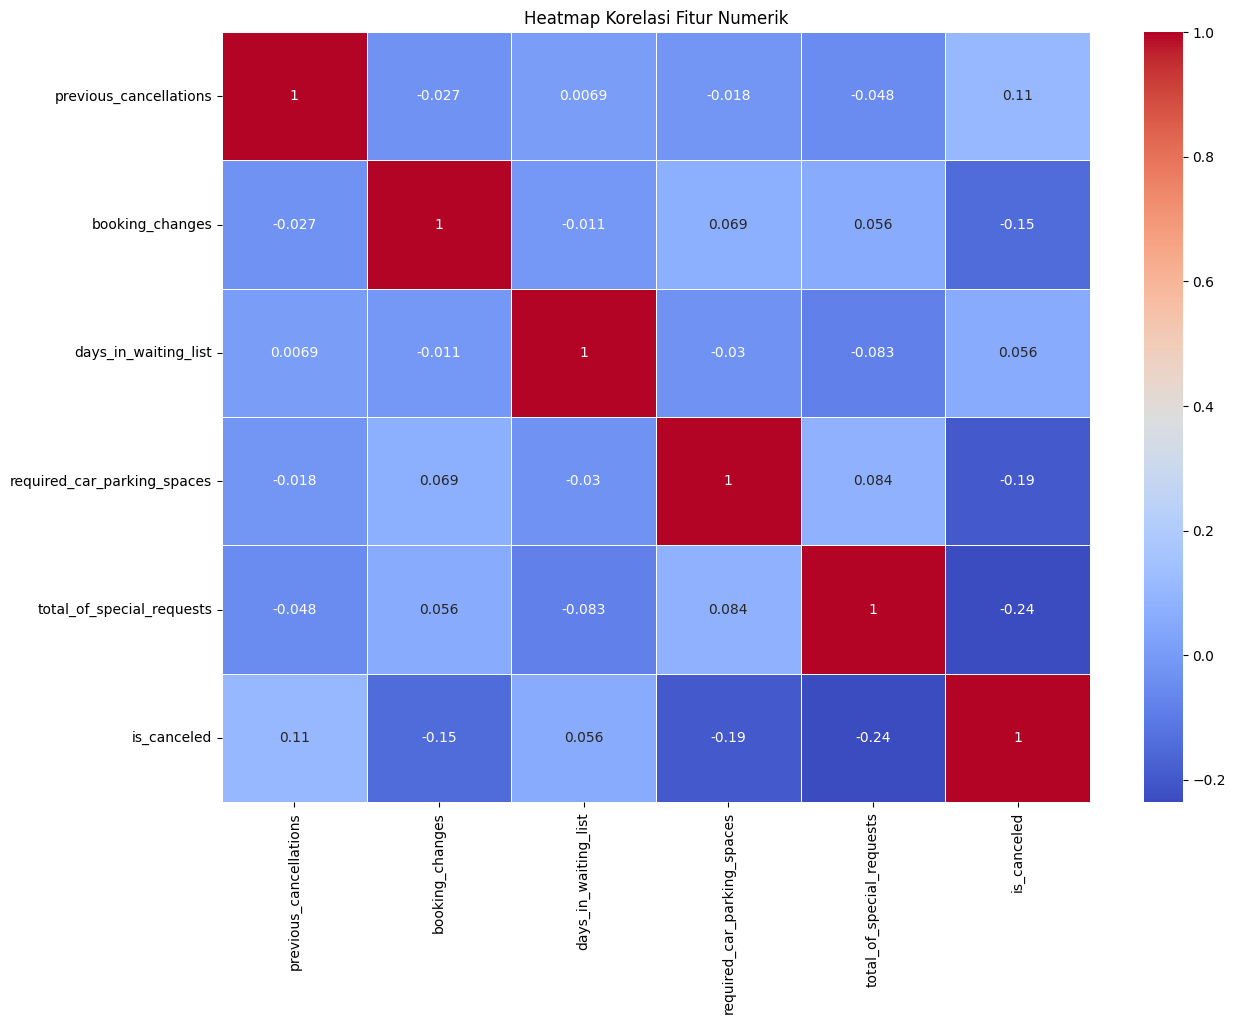

In [20]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_raw[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


### Interpretasi Korelasi Antar Fitur Numerik

Berdasarkan heatmap korelasi:

- Semua nilai korelasi antar fitur numerik relatif rendah (< |0.1|), menunjukkan **tidak ada multikolinearitas kuat** di antara fitur-fitur ini.
- Korelasi tertinggi justru terlihat antara `total_of_special_requests` dan `required_car_parking_spaces` (0.084), tapi masih tergolong sangat lemah.
- Tidak ada pasangan fitur yang berkorelasi tinggi satu sama lain, sehingga **tidak perlu dilakukan penghapusan atau reduksi fitur** berdasarkan korelasi ini.

**Kesimpulan**:
- Semua fitur numerik layak dipertahankan untuk proses modeling selanjutnya.
- Tidak diperlukan feature dropping atau teknik seperti PCA hanya karena korelasi antarfitur.


## Matrix Plot (Optional: untuk numerical data)

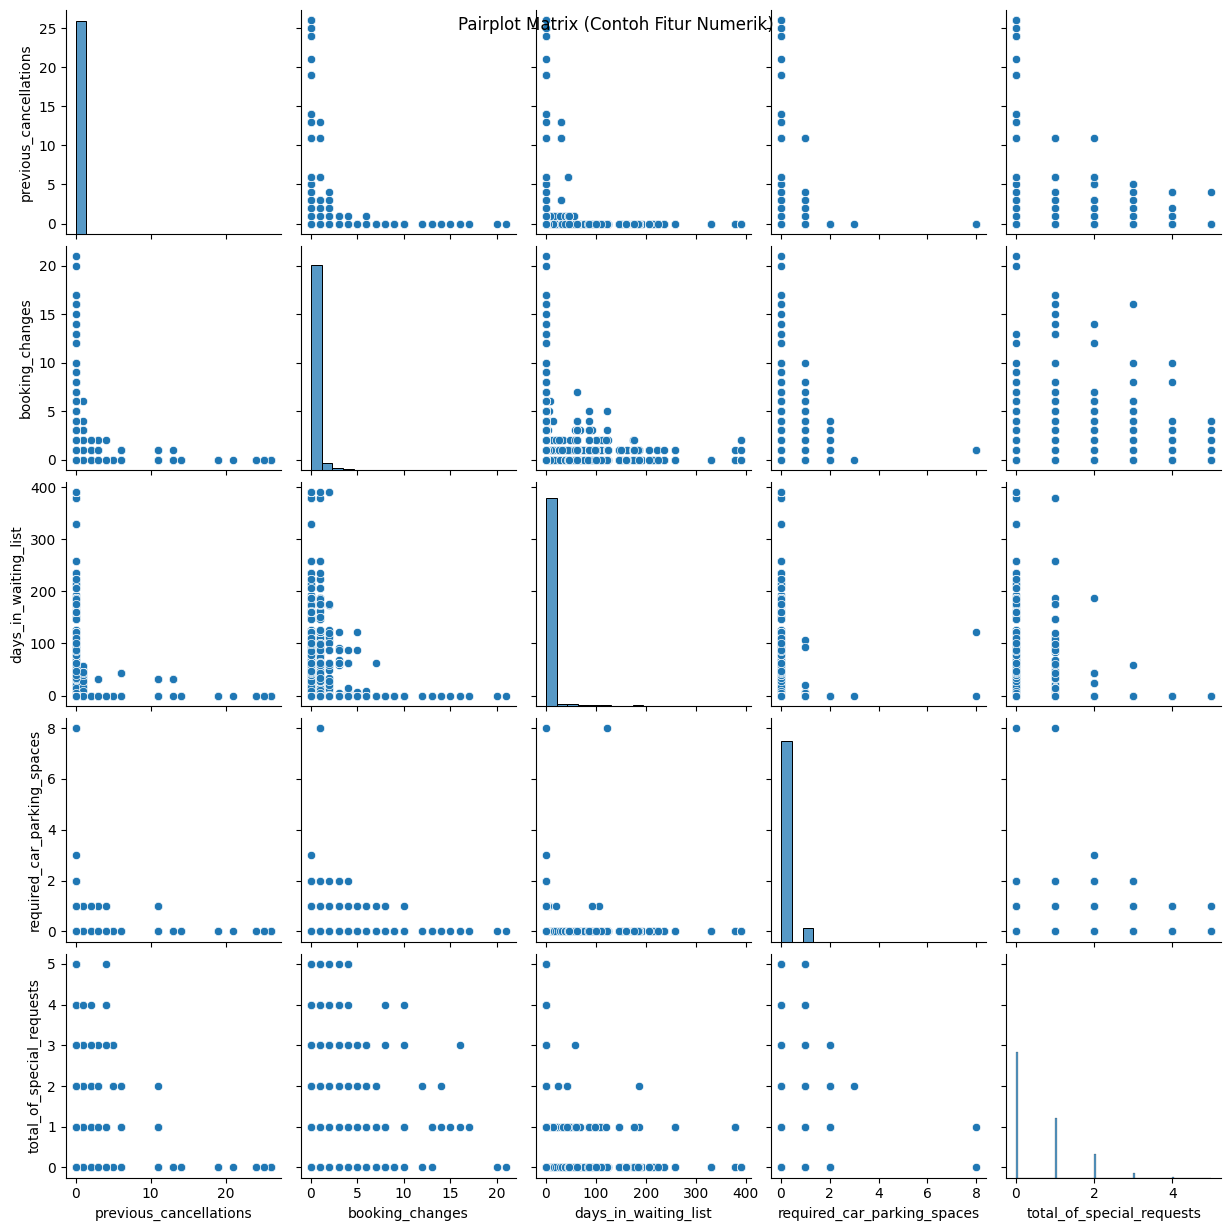

In [21]:
sns.pairplot(df_raw[numerical_features[:5]])  # ambil 5 kolom agar tidak terlalu berat
plt.suptitle("Pairplot Matrix (Contoh Fitur Numerik)")
plt.show()


### Interpretasi Pairplot Fitur Numerik

Pairplot ini digunakan untuk memahami hubungan antar fitur numerik, distribusi, serta potensi pola atau outlier.

#### Insight Utama:
- **Distribusi Skewed**: Hampir semua fitur numerik memiliki distribusi yang sangat miring ke kiri (positively skewed), terutama `days_in_waiting_list`, `booking_changes`, dan `previous_cancellations`.
- **Korelasi Lemah**: Tidak terlihat hubungan linear yang kuat antar pasangan fitur.
- **Dominasi Nilai Nol**: Banyak fitur seperti `previous_cancellations`, `required_car_parking_spaces`, dan `total_of_special_requests` didominasi oleh nilai nol — menunjukkan mayoritas pengguna tidak membatalkan, tidak meminta parkir, dan tidak memiliki permintaan khusus.
- **Potensi Outlier**: Terdapat beberapa titik ekstrem, terutama pada `days_in_waiting_list` dan `booking_changes`, yang perlu diperhatikan saat modeling.

#### Tindakan Lanjutan:
- Pertimbangkan transformasi (misalnya log-scaling) untuk fitur dengan distribusi sangat miring.
- Lakukan deteksi dan penanganan outlier sebelum masuk ke tahap modeling.
- Periksa kembali fitur-fitur bernilai dominan nol apakah relevan secara bisnis atau perlu disederhanakan menjadi fitur binary.


## Cek Data Anomali

#### Cek Anomali Data Numerik Tidak Masuk Akal

In [22]:
df[numerical_features].describe()
# Tambahkan rule-based filtering (misal: df[df['booking_changes'] > 10])


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


### Interpretasi Statistik Deskriptif Fitur Numerik

Berikut adalah insight utama dari ringkasan statistik fitur numerik:

- **`previous_cancellations`**  
  - Median = 0, max = 26  
  → Mayoritas booking tidak pernah dibatalkan sebelumnya, tetapi ada beberapa tamu dengan riwayat pembatalan tinggi (indikasi potensi outlier).

- **`booking_changes`**  
  - Median = 0, max = 21  
  → Sebagian besar tidak mengalami perubahan booking, namun ada kasus ekstrem hingga 21 kali perubahan (perlu dianalisis lebih lanjut).

- **`days_in_waiting_list`**  
  - Median = 0, rata-rata = 2.3 hari, max = 391  
  → Sebagian besar tanpa antrian, tetapi ada tamu yang menunggu lebih dari 1 tahun (perlu validasi logika data).

- **`required_car_parking_spaces`**  
  - Rata-rata sangat kecil (0.06), mayoritas tidak meminta parkir  
  → Namun ada yang meminta hingga 8 slot parkir (indikasi data tidak wajar untuk sebuah reservasi hotel umum).

- **`total_of_special_requests`**  
  - Median = 0, max = 5  
  → Mayoritas tamu tidak memiliki permintaan khusus, tetapi sebagian kecil cukup banyak meminta layanan tambahan.

- **`is_canceled`**  
  - Target biner  
  → Sekitar 63% tidak dibatalkan dan 37% dibatalkan (moderate imbalance).

**Rekomendasi Tindakan**:
- Lakukan **analisis outlier** lebih lanjut pada kolom `previous_cancellations`, `booking_changes`, `days_in_waiting_list`, dan `required_car_parking_spaces`.
- Pertimbangkan **binning** atau **normalisasi** pada fitur numerik dengan distribusi yang terlalu ekstrem.
- Lakukan **analisis hubungan** antara nilai-nilai ekstrem fitur numerik terhadap variabel target `is_canceled` untuk melihat potensi prediktifnya.

---


#### Cek Inkonsistensi Data Kategorikal

In [23]:
for col in categorical_features:
    print(df[col].unique())


['IRL' 'FRA' 'PRT' 'NLD' 'ESP' 'UMI' 'CN' 'LUX' 'BRA' 'BEL' 'JPN' 'DEU'
 'ITA' 'CHE' 'GBR' 'AGO' 'SRB' 'COL' 'CHN' 'SWE' 'AUT' 'CIV' 'CZE' 'POL'
 'USA' 'SGP' 'RUS' 'ROU' 'DNK' 'IND' 'MAR' 'PHL' 'ARG' 'ISL' 'ZAF' 'LBN'
 'MOZ' 'TUR' 'BGD' 'MEX' 'CAF' 'NOR' 'FIN' 'UKR' 'EGY' 'ISR' 'Unknown'
 'KOR' 'AZE' 'HUN' 'AUS' 'EST' 'CHL' 'SVN' 'PRY' 'ABW' 'ALB' 'LTU' 'ARE'
 'HRV' 'SAU' 'NZL' 'LVA' 'ATA' 'KAZ' 'DZA' 'TWN' 'CRI' 'BIH' 'BGR' 'IRQ'
 'OMN' 'VEN' 'IDN' 'GEO' 'MLT' 'IRN' 'BLR' 'URY' 'LBY' 'TUN' 'BEN' 'MYS'
 'MWI' 'GRC' 'CYP' 'CPV' 'HKG' 'PRI' 'MKD' 'MUS' 'IMN' 'PAN' 'NGA' 'GLP'
 'KHM' 'PER' 'QAT' 'SEN' 'MAC' 'SVK' 'BHR' 'ECU' 'SYC' 'BOL' 'TJK' 'LCA'
 'MDV' 'SYR' 'ZMB' 'LIE' 'THA' 'MNE' 'BRB' 'CMR' 'JEY' 'GTM' 'LKA' 'JOR'
 'TZA' 'AND' 'ARM' 'GIB' 'VNM' 'PAK' 'JAM' 'DOM' 'KWT' 'LAO' 'RWA' 'FRO'
 'GAB' 'ETH' 'CUB' 'COM' 'GNB' 'GGY' 'NIC' 'TGO' 'TMP' 'CYM' 'GHA' 'SLE'
 'BWA' 'NCL' 'UZB' 'SUR' 'SDN' 'PLW' 'MLI' 'MMR' 'BFA' 'SLV' 'BDI' 'ZWE'
 'UGA' 'DMA' 'VGB' 'KIR' 'KEN' 'MYT' 'KNA' 'AIA']
['Of

### Interpretasi Nilai Unik Fitur Kategorikal

Berikut adalah insight dari hasil pengecekan `unique values` pada fitur-fitur kategorikal:

- **`country`**  
  - Terdapat **163 negara** berbeda sebagai asal tamu.  
  - Dominasi negara tertentu seperti PRT (Portugal), GBR, FRA, ESP, dan DEU.  
  - Banyak kategori membuat fitur ini **high cardinality** → disarankan **grouping negara populer vs lainnya** untuk efisiensi saat encoding.

- **`market_segment`**  
  - Total 8 kategori.  
  - Kategori dominan: **Online TA** dan **Offline TA/TO**.  
  - Terdapat kategori **Undefined**, perlu ditangani (misalnya diimputasi sebagai 'Other').

- **`deposit_type`**  
  - Hanya 3 kategori.  
  - **No Deposit** sangat mendominasi.  
  - Kategori **Refundable** sangat jarang → bisa dipertimbangkan penggabungan dengan kategori lain jika tidak informatif.

- **`customer_type`**  
  - Terdiri dari 4 kategori.  
  - Kategori **Transient** paling umum → cocok untuk eksplorasi segmentasi pelanggan.

- **`reserved_room_type`**  
  - Total 10 kode (A–P).  
  - Tipe **A** mendominasi jauh.  
  - Bisa dievaluasi apakah tipe-tipe minor memiliki pengaruh signifikan terhadap pembatalan.

- **`required_car_parking_spaces`**  
  - Meskipun numerik, hanya berisi 6 nilai diskrit (0–8).  
  - Mayoritas tamu tidak membutuhkan parkir (0), namun ada anomali di nilai 8 → perlu **analisis outlier**.

- **`total_of_special_requests`**  
  - Nilainya diskrit 0–5.  
  - Sebagian besar = 0 permintaan, namun ada tamu dengan banyak permintaan khusus (4–5) → bisa menjadi sinyal khusus dalam prediksi pembatalan.

**Kesimpulan & Tindakan**:
- Perlu **grouping** untuk `country` (top vs other).
- Tangani kategori `Undefined` atau minor seperti pada `market_segment` dan `deposit_type`.
- Pertimbangkan perlakuan sebagai kategorikal untuk fitur numerik diskrit seperti `required_car_parking_spaces` dan `total_of_special_requests`.

---


#### Analisis Hubungan Fitur dan Target (is_canceled)

<Axes: xlabel='market_segment', ylabel='is_canceled'>

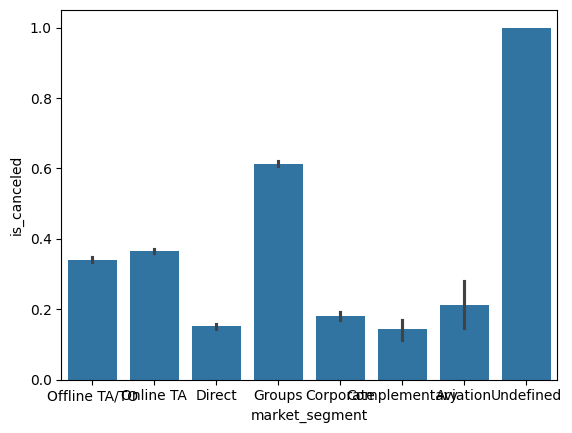

In [24]:
pd.crosstab(df['market_segment'], df['is_canceled'], normalize='index')
sns.barplot(x='market_segment', y='is_canceled', data=df)


### Analisis Relasi `market_segment` terhadap `is_canceled`

Berikut adalah insight dari visualisasi tingkat pembatalan berdasarkan segmen pasar (`market_segment`):

#### Insight:
- **Segmentasi dengan Tingkat Pembatalan Tinggi**:
  - **Groups**: memiliki tingkat pembatalan tertinggi (~60%), menunjukkan reservasi grup memiliki risiko besar untuk dibatalkan.
  - **Undefined**: 100% pembatalan, kemungkinan anomali data atau kategori yang perlu ditindaklanjuti secara khusus.

- **Segmentasi dengan Tingkat Pembatalan Rendah**:
  - **Direct**, **Complementary**, dan **Corporate** menunjukkan tingkat pembatalan yang relatif rendah (~15–20%).

- **Segmentasi Dominan**:
  - **Online TA** dan **Offline TA/TO** memiliki volume tinggi dan tingkat pembatalan menengah (~35%).

#### Kesimpulan & Tindakan:
- Segmentasi pasar adalah variabel penting yang berkorelasi dengan kemungkinan pembatalan.
- **Fitur `market_segment` sebaiknya dipertahankan dalam pemodelan** karena memberikan sinyal prediktif kuat.
- Kategori **Undefined** perlu dipertimbangkan untuk **dikelompokkan sebagai ‘Other’** atau **dihapus jika jumlahnya sangat sedikit dan tidak informatif**.


## Outlier Analysis

In [25]:
# Loop untuk mengecek outlier pada setiap fitur numerik
for col in numerical_features:
    
    # Hitung nilai kuartil 1 (Q1) dan kuartil 3 (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Hitung rentang antar kuartil (IQR)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter baris-baris yang dianggap outlier (di luar batas bawah atau atas)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Cetak hasil jumlah baris yang mengandung outlier
    print(f"Fitur '{col}': Terdapat {outliers.shape[0]} outlier dari total {df.shape[0]} baris.")


Fitur 'previous_cancellations': Terdapat 4513 outlier dari total 83573 baris.
Fitur 'booking_changes': Terdapat 12700 outlier dari total 83573 baris.
Fitur 'days_in_waiting_list': Terdapat 2585 outlier dari total 83573 baris.
Fitur 'required_car_parking_spaces': Terdapat 5227 outlier dari total 83573 baris.
Fitur 'total_of_special_requests': Terdapat 2051 outlier dari total 83573 baris.
Fitur 'is_canceled': Terdapat 0 outlier dari total 83573 baris.


## Visualisasi Outlier dengan Boxplot

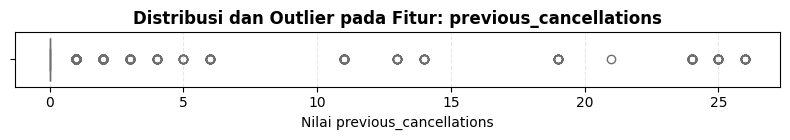

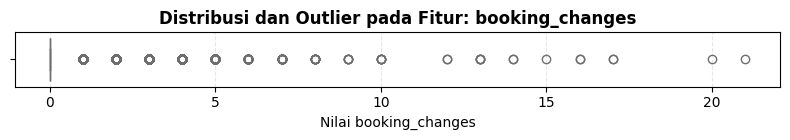

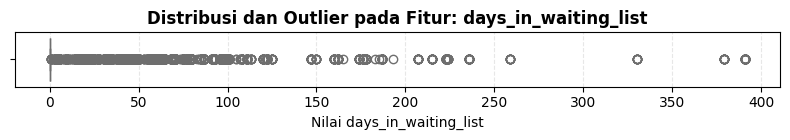

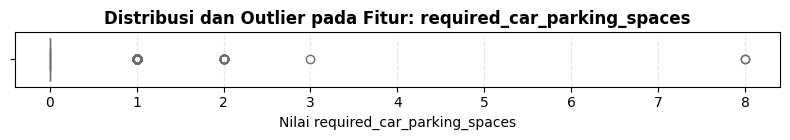

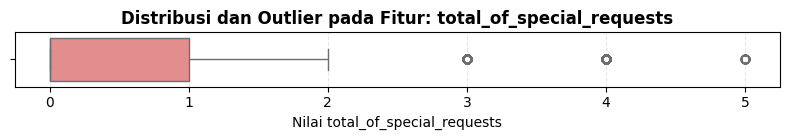

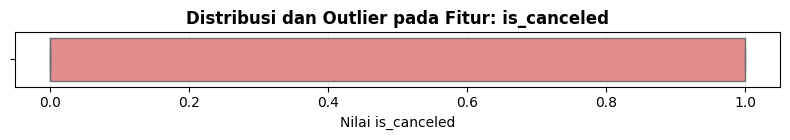

In [26]:
# Visualisasi boxplot satu per satu untuk setiap fitur numerik
for col in numerical_features:
    plt.figure(figsize=(8, 1.5))  # Lebih lebar dan ramping untuk boxplot horizontal
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Distribusi dan Outlier pada Fitur: {col}', fontsize=12, weight='bold')
    plt.xlabel(f'Nilai {col}', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


### Interpretasi Outlier pada Fitur Numerik

| Fitur                         | Jumlah Outlier     | Interpretasi Bisnis                                                                 | Perlu Ditangani? | Rekomendasi                                                                 |
|------------------------------|--------------------|--------------------------------------------------------------------------------------|------------------|------------------------------------------------------------------------------|
| `previous_cancellations`     | 4.513 baris         | Mayoritas tamu tidak pernah membatalkan. Nilai ekstrim (hingga 26x) bisa pengaruhi model. | Ya            | Gunakan **capping** (misal nilai >5 dibatasi ke 5) untuk stabilkan model.   |
| `booking_changes`            | 12.700 baris        | Sebagian besar tidak mengubah booking. Nilai ekstrem (>15x perubahan) jarang terjadi. | Ya            | Lakukan **capping** (misal maksimal 5 atau 10 perubahan).                   |
| `days_in_waiting_list`       | 2.585 baris         | Nilai ekstrem hingga 391 hari (1 tahun+). Cek apakah valid secara operasional hotel. | Mungkin       | Validasi dengan stakeholder. Jika tidak logis, **capping** di level wajar. |
| `required_car_parking_spaces`| 5.227 baris         | Mayoritas tidak minta parkir. Tapi ada yang minta hingga 8 slot.                    | Mungkin       | Jika tidak logis untuk skala hotel, bisa **capping** ke 2 atau 3.           |
| `total_of_special_requests`  | 2.051 baris         | Tamu dengan banyak permintaan (hingga 5). Wajar dalam bisnis hospitality.           | Tidak         | Biarkan, karena bisa mencerminkan customer behavior yang penting.           |
| `is_canceled`                | 0                  | Target biner, tidak memiliki outlier secara definisi.                                | Tidak         | Tidak perlu diproses.                                                       |

---

### Tindakan Selanjutnya

1. **Lakukan capping** pada fitur dengan outlier ekstrem agar distribusi tidak terlalu skewed:
   - `previous_cancellations` → cap ke max 5
   - `booking_changes` → cap ke max 10
   - `required_car_parking_spaces` → cap ke 2 jika dirasa tidak logis
   - `days_in_waiting_list` → cap ke 100–150 jika dianggap tidak realistis

2. Simpan hasil capping ke dataset baru (`df_capped`) untuk menjaga versi data asli tetap utuh.

3. Dokumentasikan asumsi dan pertimbangan bisnis dalam notebook agar reviewer memahami alasan tindakan ini.

4. Lanjutkan proses **scaling/encoding/modeling** menggunakan data hasil capping jika sudah disepakati.

---


## Capping (Pembatasan Nilai Ekstrem)



In [27]:
# Salin dataframe agar tidak merusak data asli
df_capped = df.copy()

# Aturan capping berdasarkan hasil interpretasi bisnis
capping_rules = {
    'previous_cancellations': 5,
    'booking_changes': 10,
    'days_in_waiting_list': 150,  # diasumsikan wajar tunggu <150 hari
    'required_car_parking_spaces': 2  # maksimal realistis untuk keluarga/rombongan kecil
}

# Terapkan capping
for col, cap in capping_rules.items():
    df_capped[col] = np.where(df_capped[col] > cap, cap, df_capped[col])


## Verifikasi Hasil Capping

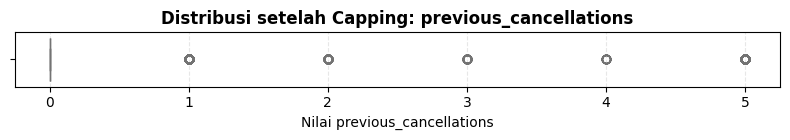

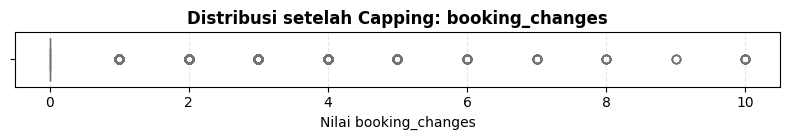

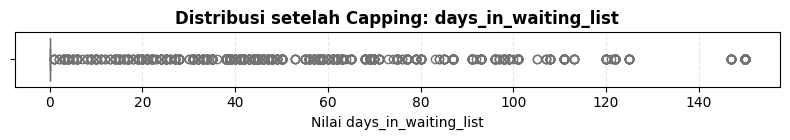

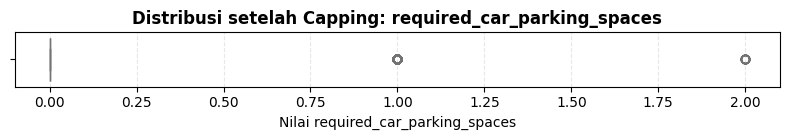

In [28]:
# Visualisasi ulang boxplot setelah capping
for col in capping_rules.keys():
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df_capped[col], color='lightgreen')
    plt.title(f'Distribusi setelah Capping: {col}', fontsize=12, weight='bold')
    plt.xlabel(f'Nilai {col}', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


## Bandingkan Sebelum vs Setelah Capping (Opsional)

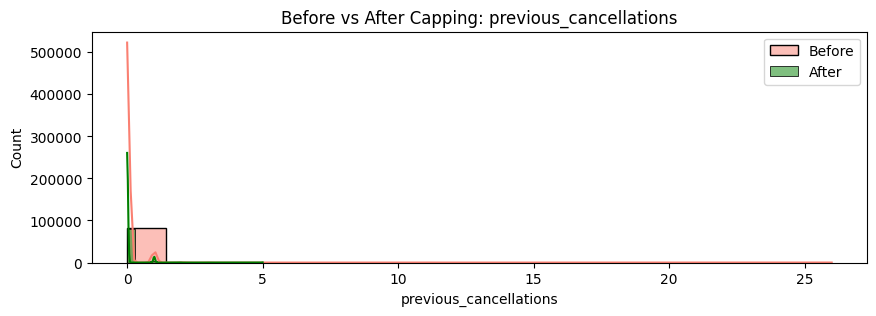

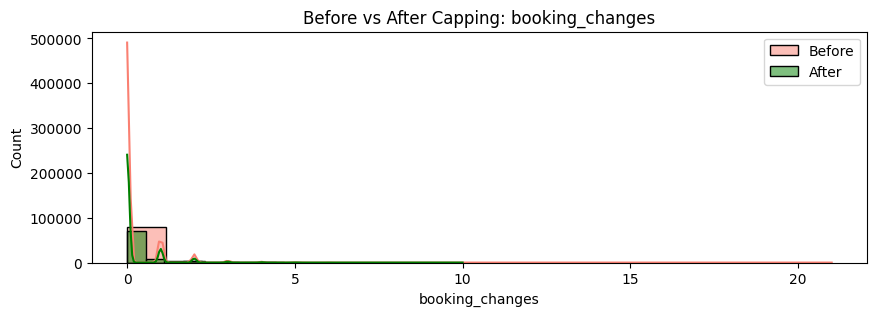

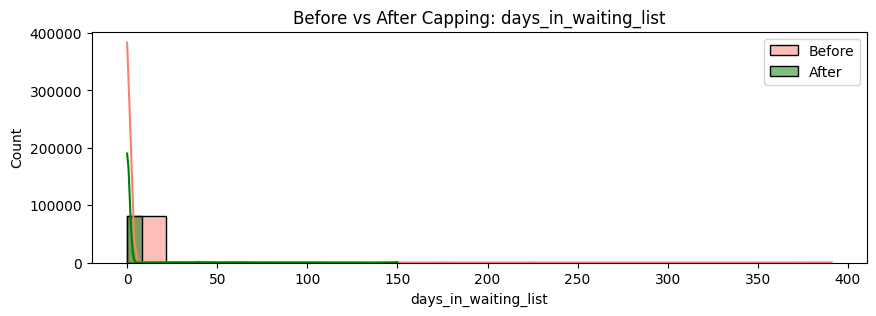

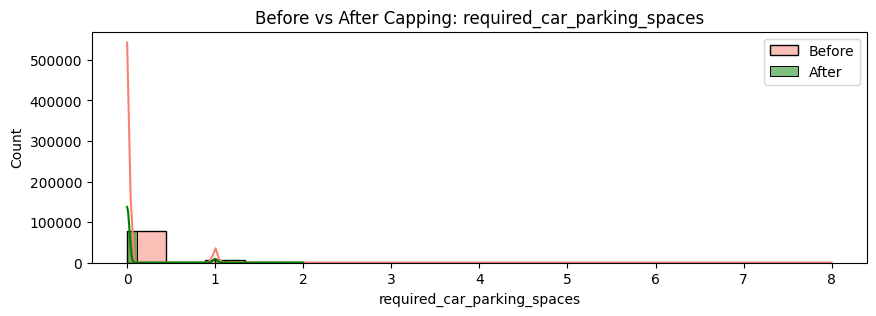

In [29]:
for col in capping_rules.keys():
    plt.figure(figsize=(10, 3))
    sns.histplot(df[col], label='Before', color='salmon', kde=True)
    sns.histplot(df_capped[col], label='After', color='green', kde=True)
    plt.title(f'Before vs After Capping: {col}')
    plt.legend()
    plt.show()


### Interpretasi Capping Fitur Numerik

Proses ini dilakukan untuk membatasi nilai ekstrem (outlier) ke ambang maksimum yang logis berdasarkan konteks bisnis, guna menjaga kestabilan distribusi data tanpa kehilangan informasi penting.

#### Apa yang Dilakukan:

* Duplikat data ke `df_capped` agar data asli tetap utuh.
* Terapkan **rule-based capping** pada 4 fitur numerik:

  * `previous_cancellations` → maksimal 5
  * `booking_changes` → maksimal 10
  * `days_in_waiting_list` → maksimal 150
  * `required_car_parking_spaces` → maksimal 2
* Visualisasikan distribusi **sebelum dan sesudah capping** untuk memastikan dampaknya.

---

### Insight Hasil Capping

* **`previous_cancellations`**:

  * Sebelum capping: distribusi sangat right-skewed.
  * Setelah capping: distribusi lebih terkonsentrasi, nilai ekstrem dikurangi → membantu model fokus pada mayoritas pola umum.

* **`booking_changes`**:

  * Perubahan >10 kali sangat jarang dan tidak wajar secara bisnis.
  * Capping membuat distribusi lebih padat dan tidak "terseret" ke kanan oleh nilai ekstrem.

* **`days_in_waiting_list`**:

  * Capping di 150 hari membuat distribusi lebih realistis.
  * Nilai >150 hari sangat jarang dan bisa dianggap noise.

* **`required_car_parking_spaces`**:

  * Sebelum capping terlihat outlier hingga 8 slot.
  * Setelah capping (maksimal 2 slot) distribusi terlihat jauh lebih bersih dan wajar.

---

### Kesimpulan & Action

* Capping berhasil menstabilkan distribusi fitur numerik tanpa menghapus observasi.
* Mengurangi skewness yang berpotensi mengganggu model terutama pada algoritma distance-based atau sensitive terhadap skala.
* Dataset hasil capping (`df_capped`) siap digunakan untuk tahap selanjutnya: **scaling, encoding, modeling**.

---


# Setelah Capping Outlier

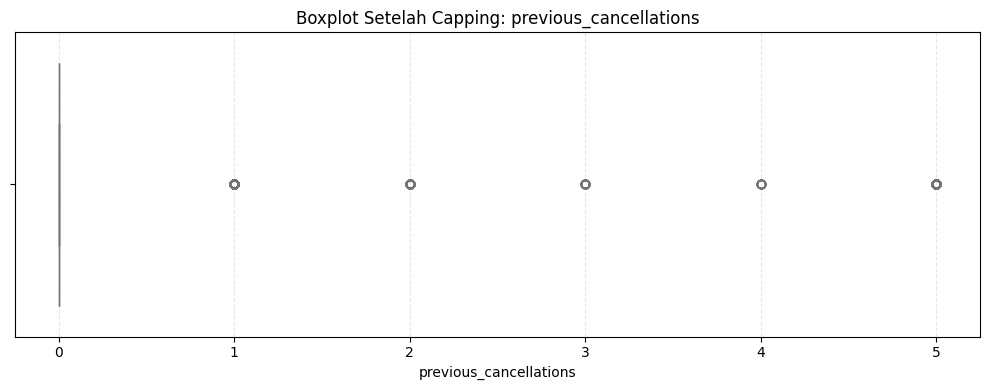

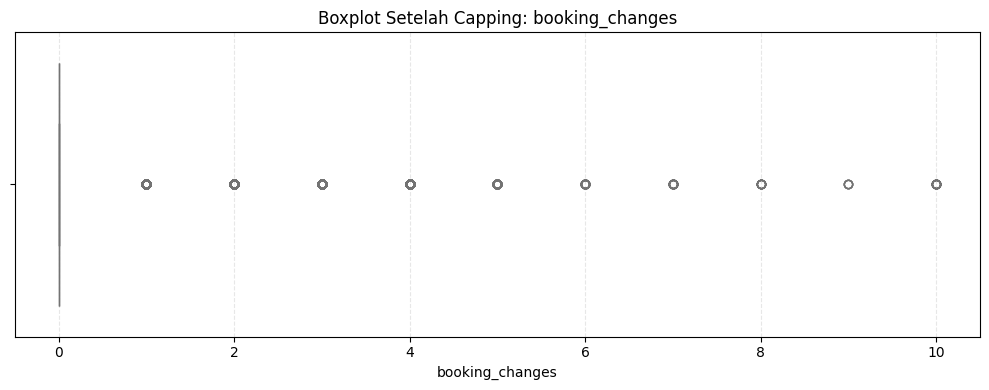

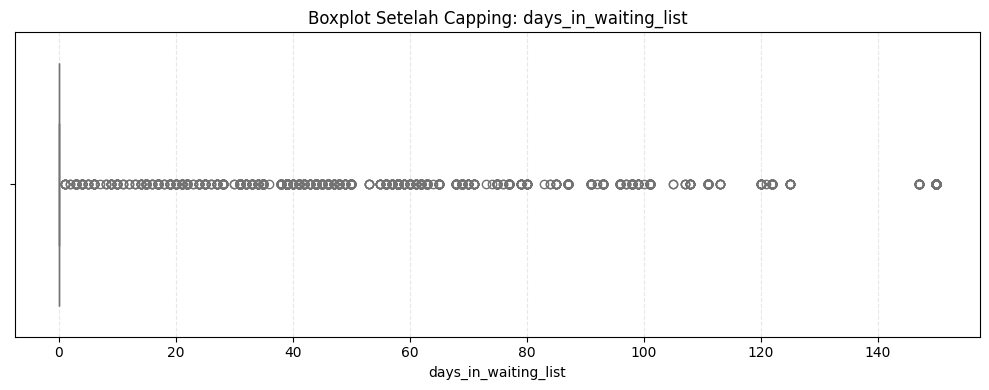

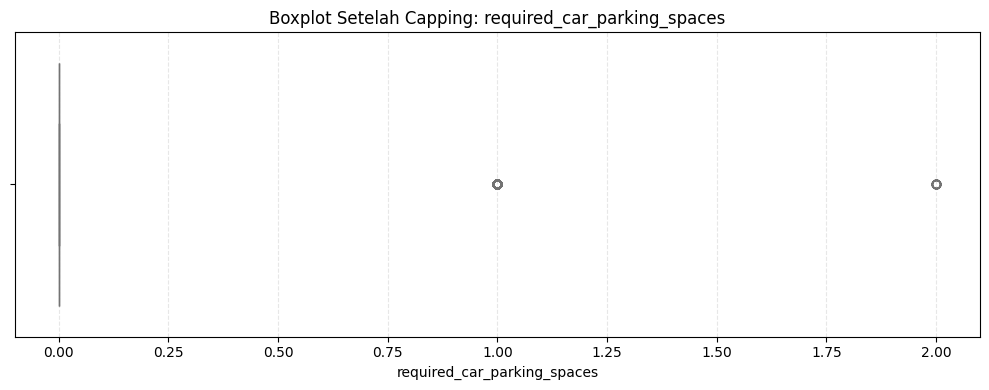

Fitur numerik unik < 15 yang diperlakukan sebagai kategorikal:
['previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']


In [30]:
# Cek Ulang Statistik Deskriptif
df_capped.describe().T

# Visualisasi Perbandingan (Optional)
for col in capping_rules.keys():
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_capped[col], color='lightgreen')
    plt.title(f'Boxplot Setelah Capping: {col}')
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Definisikan Ulang Dataset Utama
# Gunakan df_capped sebagai data kerja utama
df = df_capped.copy()

# Pisahkan Fitur Numerik & Kategorikal Kembali (untuk persiapan scaling/encoding)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Jika ingin treat fitur numerik dengan unique < 15 sebagai kategorikal:
low_card_num = [col for col in numerical_features if df[col].nunique() < 15 and col != 'is_canceled']
categorical_features += low_card_num
numerical_features = [col for col in numerical_features if col not in categorical_features]

print("Fitur numerik unik < 15 yang diperlakukan sebagai kategorikal:")
print(low_card_num)



### Interpretasi Setelah Capping Outlier
Tujuan: Mengurangi pengaruh nilai ekstrem terhadap distribusi fitur numerik dan menjaga stabilitas model.

### Insight Per Fitur:
- previous_cancellations
    Nilai ekstrim di atas 5 berhasil dibatasi → distribusi lebih rapat dan tidak terlalu skewed.

- booking_changes
    Setelah capping ke 10, persebaran lebih stabil dan boxplot lebih seimbang tanpa outlier ekstrem.

- days_in_waiting_list
    Nilai maksimum dibatasi ke 150 hari → persebaran terlihat lebih natural, namun masih menyisakan distribusi skewed (masih wajar).

- required_car_parking_spaces
    Capping ke 2 membuat distribusi lebih masuk akal, menghindari kasus yang tidak realistis seperti permintaan 8 slot parkir.

### Kesimpulan:
- Capping berhasil memperbaiki distribusi fitur numerik tanpa menghapus data.
- Proses ini menjaga integritas data dan membantu model fokus pada pola mayoritas, bukan kasus ekstrem.
- Siap dilanjutkan ke tahap feature encoding dan scaling sebelum modeling.

## Feature Correlation
Tujuan Analisis Korelasi
- Mengetahui apakah terdapat fitur numerik yang saling berkorelasi sangat tinggi.
- Jika dua fitur memiliki korelasi sangat tinggi (misalnya di atas 0.7–0.9), maka salah satu sebaiknya dihapus agar model tidak bias atau overfit akibat redundansi informasi (multikolinearitas).

In [31]:
# Identifikasi fitur numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('is_canceled')  # Exclude target variable

# Hitung korelasi antar fitur numerik
corr_matrix = df[numerical_columns].corr()
corr_matrix


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
previous_cancellations,1.000000,-0.049855,0.029434,-0.032406,-0.079905
booking_changes,-0.049855,1.000000,-0.010751,0.071052,0.056802
days_in_waiting_list,0.029434,-0.010751,1.000000,-0.036848,-0.094818
required_car_parking_spaces,-0.032406,0.071052,-0.036848,1.000000,0.084676
total_of_special_requests,-0.079905,0.056802,-0.094818,0.084676,1.000000


### Interpretasi
- Semua nilai korelasi antar fitur berada di bawah 0.1, baik positif maupun negatif.
- Ini menunjukkan tidak ada korelasi tinggi antar fitur numerik.
- Artinya, tidak ada fitur yang redundant, sehingga tidak perlu ada fitur yang di-drop berdasarkan korelasi.

### Kesimpulan
- Tidak ada multikolinearitas yang signifikan.
- Seluruh fitur numerik dapat digunakan dalam modeling tanpa risiko overlap informasi.
- Proses ini membantu memastikan model tidak overfit karena fitur yang terlalu mirip.

---



## Distribusi Fitur Numerik berdasarkan Target

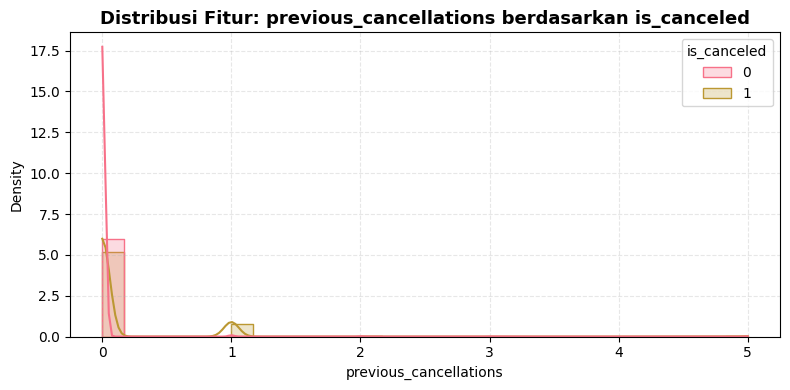

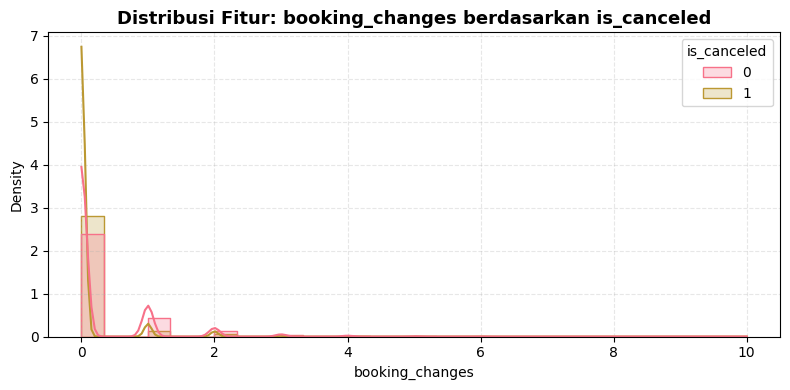

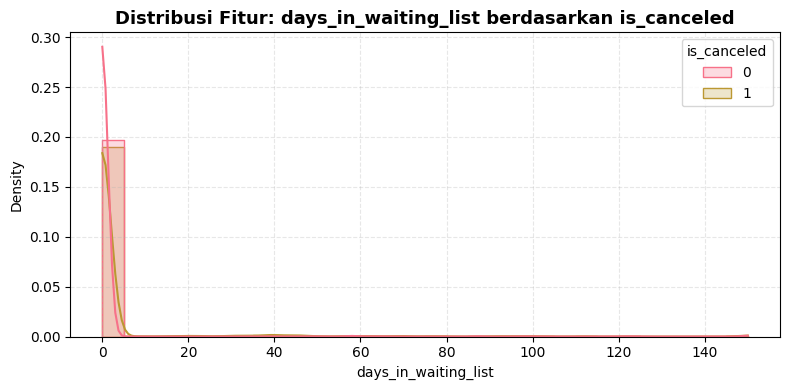

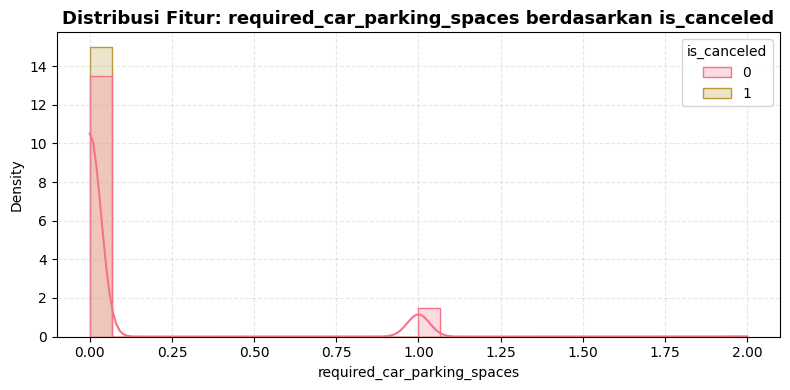

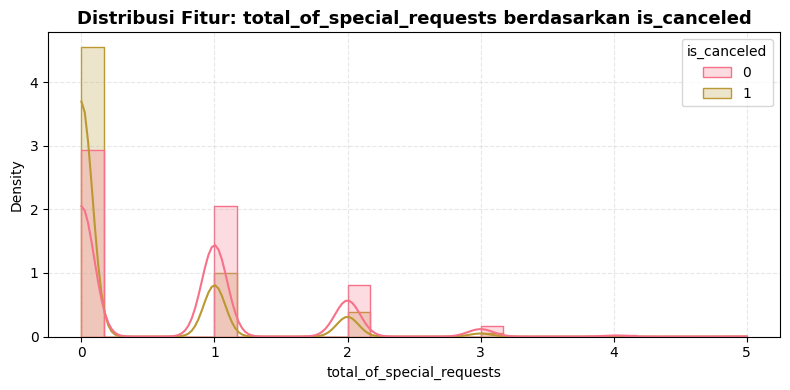

In [32]:
# Palet warna agar konsisten dan menarik
custom_palette = sns.color_palette("husl")

# Loop semua kolom numerik kecuali target
for column in df.select_dtypes(include=['int64', 'float64']):
    if column != 'is_canceled':
        plt.figure(figsize=(8, 4))

        # Plot histogram dengan warna berdasarkan target (is_canceled)
        sns.histplot(
            data=df, 
            x=column, 
            hue='is_canceled', 
            kde=True, 
            bins=30, 
            element='step', 
            multiple="layer", 
            palette=custom_palette,
            stat="density", 
            common_norm=False
        )

        plt.title(f'Distribusi Fitur: {column} berdasarkan is_canceled', fontsize=13, weight='bold')
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()


## Distribusi Fitur Numerik Berdasarkan `is_canceled`

### Tujuan Visualisasi
Visualisasi ini bertujuan untuk memahami perbedaan distribusi tiap fitur numerik terhadap dua kelas target:
- `0`: Pemesanan **tidak dibatalkan**
- `1`: Pemesanan **dibatalkan**

Dengan ini, kita bisa:
- Mengidentifikasi fitur yang **berpotensi diskriminatif**
- Menentukan fitur yang relevan untuk model klasifikasi

### Hasil & Insight per Fitur

#### `previous_cancellations`
- Mayoritas pelanggan tidak pernah membatalkan sebelumnya (`0`)
- Terdapat peningkatan proporsi pembatalan pada nilai `1–2`
- **Insight**: Fitur ini relevan dan layak dipertahankan

#### `booking_changes`
- Dominan di angka `0`
- Kelas pembatalan (`1`) meningkat pada nilai `1–2`
- **Insight**: Perubahan booking sedikit meningkatkan risiko pembatalan

#### `days_in_waiting_list`
- Sebagian besar bernilai rendah, namun memiliki ekor kanan panjang
- Sedikit tren peningkatan pembatalan dengan waktu tunggu lebih lama
- **Insight**: Hubungan lemah ke sedang, masih bisa dieksplorasi

#### `required_car_parking_spaces`
- Mayoritas tidak membutuhkan parkir (`0`)
- Distribusi serupa di kedua kelas
- **Insight**: Sinyal terhadap target sangat lemah, bisa dipertimbangkan untuk dieliminasi

#### `total_of_special_requests`
- Distribusi menurun, dominan di nilai rendah
- Kelas tidak batal cenderung memiliki lebih banyak permintaan
- **Insight**: Pelanggan dengan permintaan khusus lebih kecil kemungkinan membatalkan

### Kesimpulan
- **Fitur menjanjikan secara visual**:  
  `previous_cancellations`, `booking_changes`, `total_of_special_requests`
  
- **Fitur dengan sinyal lemah**:  
  `required_car_parking_spaces`

Visualisasi ini memperkuat dasar untuk proses **feature selection** dan **pemahaman bisnis**, terutama dalam mempersiapkan model klasifikasi pembatalan reservasi.

---

## Feature Significance Test (Uji Signifikansi Fitur)

### Tujuan Uji
Uji ini bertujuan untuk mengevaluasi **apakah perbedaan rata-rata** nilai fitur numerik antara dua kelas target (`is_canceled`) **signifikan secara statistik**.

Metode yang digunakan: **Independent T-Test** (`scipy.stats.ttest_ind`)

- **Grup 0**: Booking yang **tidak dibatalkan** (`is_canceled = 0`)
- **Grup 1**: Booking yang **dibatalkan** (`is_canceled = 1`)

### Proses Pengujian

- Pisahkan data ke dalam dua subset berdasarkan target
- Lakukan uji t-test untuk semua fitur numerik (`int64`, `float64`)
- Catat nilai **p-value** sebagai indikator signifikansi

### Kriteria Interpretasi

| Keterangan         | p-value               |
|--------------------|------------------------|
| **Signifikan**     | p-value < 0.05      |
| **Tidak Signifikan** | p-value ≥ 0.05     |


In [33]:
from scipy.stats import ttest_ind  # ← tambahkan ini dulu

# Pisahkan data berdasarkan target: dibatalkan vs tidak dibatalkan
canceled = df[df['is_canceled'] == 1]
not_canceled = df[df['is_canceled'] == 0]

# Inisialisasi dictionary untuk menyimpan hasil p-value
mean_test_results = {}

# Lakukan t-test untuk setiap kolom numerik
for column in df.select_dtypes(include=['float64', 'int64']):
    if column != 'is_canceled':
        stat, p = ttest_ind(canceled[column].dropna(), not_canceled[column].dropna())
        mean_test_results[column] = p

# Simpan hasil dalam bentuk DataFrame
mean_test_df = pd.DataFrame(mean_test_results.items(), columns=['Feature', 'p-value'])

# Tampilkan hasil
print(mean_test_df)


                       Feature       p-value
0       previous_cancellations  0.000000e+00
1              booking_changes  0.000000e+00
2         days_in_waiting_list  1.433437e-76
3  required_car_parking_spaces  0.000000e+00
4    total_of_special_requests  0.000000e+00


###  Hasil Uji pada Dataset Hotel Booking

| Feature                      | p-value         | Signifikan |
|------------------------------|------------------|------------|
| `previous_cancellations`     | 0.000000e+00     | ✅         |
| `booking_changes`            | 0.000000e+00     | ✅         |
| `days_in_waiting_list`       | 1.43e-76         | ✅         |
| `required_car_parking_spaces`| 0.000000e+00     | ✅         |
| `total_of_special_requests`  | 0.000000e+00     | ✅         |

### Insight & Kesimpulan

- Semua fitur numerik memiliki **p-value < 0.05**, artinya perbedaannya **signifikan secara statistik**
- Fitur-fitur ini layak dipertahankan karena berpotensi **diskriminatif** terhadap kelas target
- Uji ini memperkuat landasan untuk **feature selection** berbasis statistik



## Visualisasi Rata-rata Fitur Numerik Berdasarkan `is_canceled`

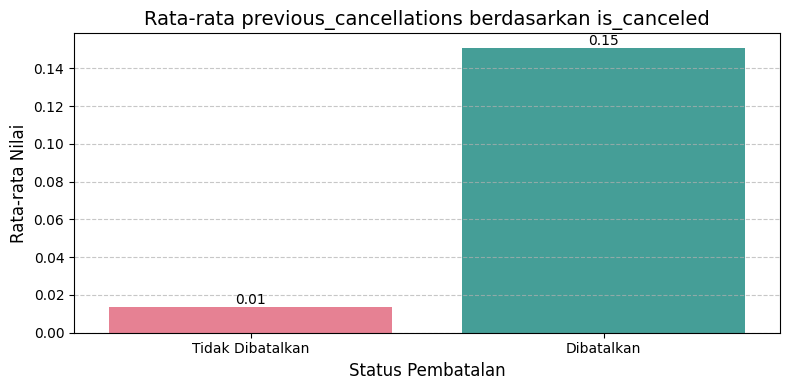

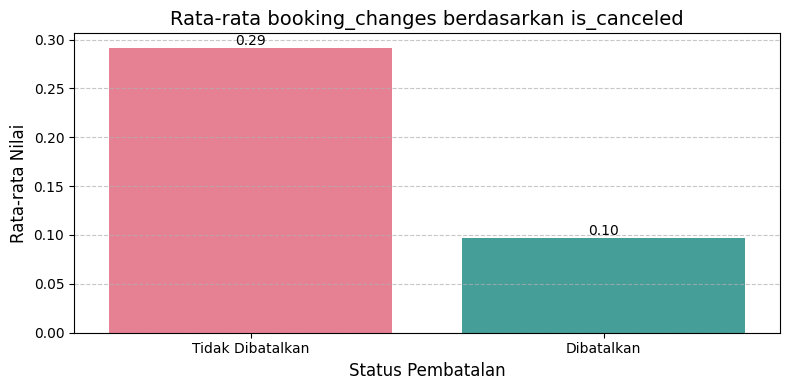

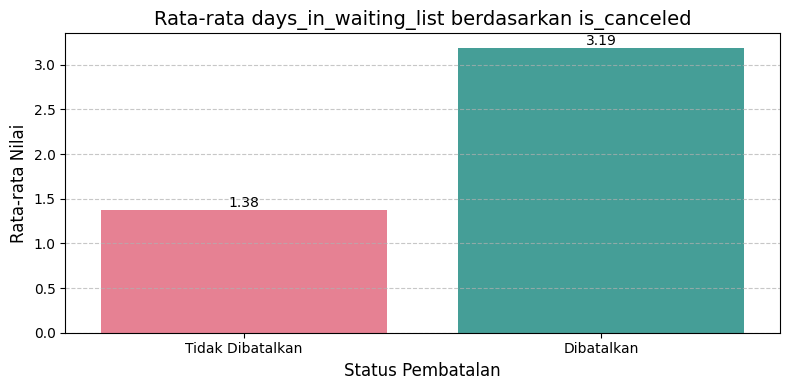

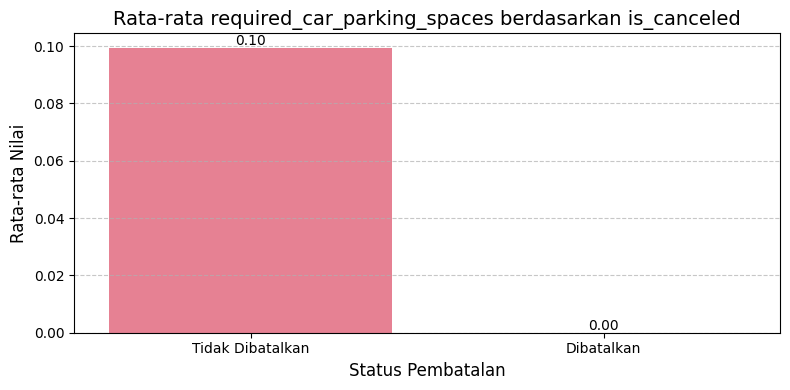

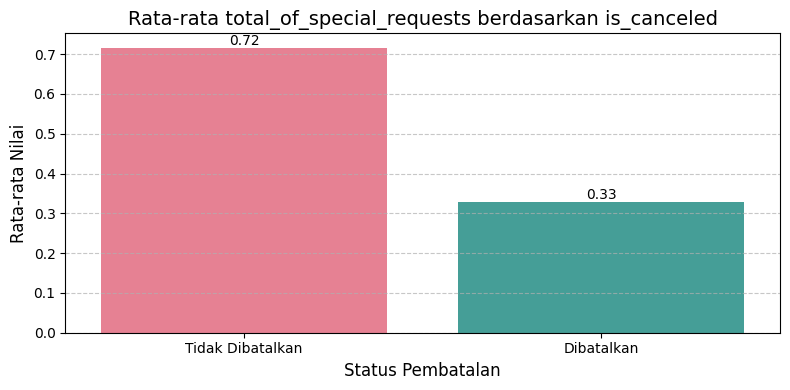

In [34]:
# Pisahkan data berdasarkan target: dibatalkan vs tidak dibatalkan
canceled = df[df['is_canceled'] == 1]
not_canceled = df[df['is_canceled'] == 0]

# Visualisasi rata-rata setiap fitur numerik berdasarkan status pembatalan
for column in df.select_dtypes(include=['float64', 'int64']):
    if column != 'is_canceled':  # hindari target

        # Hitung mean masing-masing grup
        mean_canceled = canceled[column].mean()
        mean_not_canceled = not_canceled[column].mean()

        # Plot barplot rata-rata
        plt.figure(figsize=(8, 4))
        sns.barplot(x=['Tidak Dibatalkan', 'Dibatalkan'],
                    y=[mean_not_canceled, mean_canceled],
                    palette='husl')

        # Tambahkan label angkanya
        plt.text(0, mean_not_canceled, f'{mean_not_canceled:.2f}', ha='center', va='bottom', fontsize=10)
        plt.text(1, mean_canceled, f'{mean_canceled:.2f}', ha='center', va='bottom', fontsize=10)

        # Pengaturan plot
        plt.ylabel('Rata-rata Nilai', fontsize=12)
        plt.xlabel('Status Pembatalan', fontsize=12)
        plt.title(f'Rata-rata {column} berdasarkan is_canceled', fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


## Visualisasi Rata-rata Fitur Numerik Berdasarkan `is_canceled`

### Tujuan
Visualisasi ini bertujuan untuk:
- Melihat **rata-rata nilai** dari masing-masing fitur numerik berdasarkan status pembatalan.
- Menggambarkan apakah terdapat **perbedaan pola yang signifikan** antara pemesanan yang dibatalkan dan tidak dibatalkan.

### 🔍 Proses
- Dataset dipisahkan ke dalam dua grup berdasarkan kolom `is_canceled`:  
  - `0`: Tidak dibatalkan  
  - `1`: Dibatalkan  
- Untuk setiap fitur numerik (`float64` / `int64`), dihitung dan divisualisasikan **mean** masing-masing grup.
- Visualisasi dilakukan menggunakan bar chart yang menyertakan anotasi nilai rata-rata.

---

### Insight Per Fitur

#### `previous_cancellations`
- Rata-rata pada pelanggan yang **membatalkan** jauh lebih tinggi dibandingkan yang tidak.
- **Insight**: Riwayat pembatalan sebelumnya menjadi sinyal kuat terhadap kemungkinan pembatalan berikutnya.
- **Layak dipertahankan**

#### `booking_changes`
- Pelanggan yang **tidak membatalkan** justru memiliki rata-rata perubahan booking lebih tinggi.
- **Insight**: Pelanggan fleksibel cenderung lebih mempertahankan reservasi.
- **Menarik secara perilaku**, tetap layak dipertahankan

#### `days_in_waiting_list`
- Rata-rata hari menunggu untuk pelanggan yang membatalkan jauh lebih panjang.
- **Insight**: Durasi menunggu dapat memengaruhi ketidakpastian dan meningkatkan risiko pembatalan.
- **Layak dipertimbangkan** dalam model

#### `required_car_parking_spaces`
- Tidak ada perbedaan rata-rata signifikan antara dua grup.
- **Insight**: Fitur ini menunjukkan **sinyal lemah**, bisa dievaluasi untuk eliminasi di tahap feature selection.
- **Perlu evaluasi lebih lanjut**

#### `total_of_special_requests`
- Pelanggan yang tidak membatalkan memiliki lebih banyak permintaan khusus.
- **Insight**: Semakin banyak permintaan, kemungkinan pembatalan justru menurun → bisa menjadi indikator loyalitas.
- **Sangat informatif dan relevan**

### Kesimpulan

- **Fitur menjanjikan secara mean (potensial diskriminatif):**  
  `previous_cancellations`, `days_in_waiting_list`, `total_of_special_requests`

- **Fitur dengan pola tidak biasa (tetap dipertimbangkan):**  
  `booking_changes`

- **Fitur dengan sinyal lemah:**  
  `required_car_parking_spaces`
  
---

## Chi-Square Test untuk Semua Fitur Kategorikal

In [35]:
from scipy.stats import chi2_contingency
import pandas as pd

# Inisialisasi dictionary untuk menyimpan hasil
chi_square_results = {}

# Lakukan uji chi-square untuk semua fitur kategorikal
for column in df.select_dtypes(include=['object']):
    contingency_table = pd.crosstab(df[column], df['is_canceled'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[column] = {'Chi-square': chi2, 'p-value': p}

# Simpan dalam DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results).T
chi_square_results_df = chi_square_results_df.sort_values(by='p-value')

# Tampilkan hasil
print("Hasil Uji Chi-Square Fitur Kategorikal:")
display(chi_square_results_df)


Hasil Uji Chi-Square Fitur Kategorikal:


,Chi-square,p-value
country,10773.238983,0.000000e+00
market_segment,6095.332843,0.000000e+00
deposit_type,19346.255598,0.000000e+00
customer_type,1484.541173,0.000000e+00
reserved_room_type,475.948017,8.087567e-97


## Chi-Square Test untuk Fitur Kategorikal

### Tujuan
Mengukur apakah ada hubungan signifikan antara fitur kategorikal dan target `is_canceled` (pembatalan reservasi).

### Metode
- Uji statistik: `chi2_contingency` dari `scipy.stats`
- Fitur diuji: Semua kolom bertipe kategorikal (`object`)
- Target: `is_canceled` (0 = tidak batal, 1 = batal)

### Kriteria Uji
| Keterangan          | p-value         |
|---------------------|-----------------|
| **Signifikan**      | p-value < 0.05  |
| **Tidak Signifikan**| p-value ≥ 0.05  |

### Hasil Uji pada Data
| Fitur                | p-value         | Signifikan |
|----------------------|------------------|------------|
| `country`            | 0.000000e+00     | ✅         |
| `market_segment`     | 0.000000e+00     | ✅         |
| `deposit_type`       | 0.000000e+00     | ✅         |
| `customer_type`      | 0.000000e+00     | ✅         |
| `reserved_room_type` | 8.09e-97         | ✅         |

### Insight
- Semua fitur kategorikal yang diuji **berhubungan signifikan secara statistik** terhadap pembatalan (`is_canceled`)
- Ini menunjukkan bahwa perilaku booking pelanggan **dipengaruhi oleh segmen pasar, metode deposit, negara asal**, dan **tipe kamar yang dipesan**
- **Seluruh fitur dapat dipertahankan** dalam proses modeling karena membawa sinyal penting ke model




## Post-Hoc Analysis untuk Fitur Kategorikal Spesifik

In [36]:
from scipy.stats import chi2
import numpy as np

# Fungsi analisis residual post-hoc untuk chi-square
def post_hoc_analysis(column_name, alpha=0.05):
    print(f"\nPost-hoc Analysis untuk kolom: '{column_name}'")
    contingency_table = pd.crosstab(df[column_name], df['is_canceled'])
    
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    if p_val <= alpha:
        critical_value = chi2.ppf(1 - alpha, dof)
        print(f"Chi-square Statistic: {chi2_stat:.4f}, Critical Value: {critical_value:.4f}")

        # Hitung residual
        residuals = (contingency_table - expected) / np.sqrt(expected)
        significant_cells = np.abs(residuals) > 2
        
        print("\nSignificant Cells (Residuals > 2):")
        print(residuals[significant_cells].round(3))
    else:
        print("Tidak ada hubungan signifikan yang ditemukan.")

# Contoh pemanggilan:
post_hoc_analysis('deposit_type')
post_hoc_analysis('market_segment')



Post-hoc Analysis untuk kolom: 'deposit_type'
Chi-square Statistic: 19346.2556, Critical Value: 5.9915

Significant Cells (Residuals > 2):
is_canceled        0        1
deposit_type                 
No Deposit    29.298  -38.372
Non Refund   -79.133  103.641
Refundable     2.101   -2.751

Post-hoc Analysis untuk kolom: 'market_segment'
Chi-square Statistic: 6095.3328, Critical Value: 14.0671

Significant Cells (Residuals > 2):
is_canceled          0       1
market_segment                
Aviation         2.524  -3.305
Complementary    6.411  -8.397
Corporate       14.517 -19.013
Direct          25.741 -33.714
Groups         -36.078  47.251
Offline TA/TO    4.618  -6.048
Online TA          NaN     NaN
Undefined          NaN     NaN


## Post-Hoc Chi-Square Residual Analysis

### Tujuan
Post-hoc residual analysis dilakukan setelah uji chi-square menemukan **hubungan signifikan** antara fitur kategorikal dan target (`is_canceled`).  
Tujuannya adalah untuk **mengidentifikasi kombinasi kategori dan kelas target** yang menyumbang secara signifikan terhadap hasil chi-square.

### Kriteria Interpretasi Residual
- Residual dihitung dari deviasi antara frekuensi aktual dan ekspektasi
- **|Residual| > 2** → sel dianggap **signifikan** secara statistik
- Residual (+): frekuensi aktual lebih besar dari ekspektasi
- Residual (–): frekuensi aktual lebih kecil dari ekspektasi

### Hasil Post-Hoc: `deposit_type`
| Deposit Type | is_canceled = 0 | is_canceled = 1 | Insight |
|--------------|------------------|------------------|--------|
| No Deposit   | +29.3            | –38.4            | **Lebih banyak** yang tidak membatalkan dari yang diperkirakan |
| Non Refund   | –79.1            | +103.6           | **Signifikan lebih banyak** yang membatalkan |
| Refundable   | +2.1             | –2.8             | Efek lebih kecil, namun tetap signifikan |

**🔍 Insight**: Tipe deposit memiliki hubungan kuat dengan pembatalan.  
Tipe **"Non Refund" sangat dominan pada pembatalan**, sedangkan **"No Deposit" lebih banyak tidak membatalkan**.

### Hasil Post-Hoc: `market_segment`
| Market Segment   | is_canceled = 0 | is_canceled = 1 | Insight |
|------------------|------------------|------------------|--------|
| Aviation         | +2.5             | –3.3             | Sedikit lebih banyak tidak membatalkan |
| Complementary    | +6.4             | –8.4             | Lebih banyak tidak membatalkan |
| Corporate        | +14.5            | –19.0            | Cenderung tidak membatalkan |
| Direct           | +25.7            | –33.7            | Signifikan tidak membatalkan |
| Groups           | –36.1            | +47.3            | Sangat kuat dikaitkan dengan pembatalan |
| Offline TA/TO    | +4.6             | –6.0             | Cenderung tidak membatalkan |
| Online TA        | NaN              | NaN              | Tidak bisa dihitung (kemungkinan nilai konstan atau kosong) |
| Undefined        | NaN              | NaN              | Tidak bisa dihitung |

**Insight**:  
Segmen **"Groups" sangat dominan pada pembatalan**, sedangkan **"Corporate" dan "Direct" cenderung tidak membatalkan**.  
Segmentasi pasar berperan besar dalam perilaku pembatalan.

### Kesimpulan
- **Post-hoc residuals memperkuat hasil chi-square**, dan membantu mengarahkan perhatian ke kategori spesifik yang berdampak
- Insight ini dapat dijadikan **fitur tambahan** atau digunakan dalam segmentasi pengguna
- Kombinasi ini **berpotensi menjadi dasar rule-based filtering atau prioritisasi** dalam pengambilan keputusan bisnis

---

## Kesimpulan Feature Selection

### Dasar Evaluasi:

- **Cek Korelasi Numerik**  
  Semua korelasi antar fitur numerik < 0.1 → **tidak ada multikolinearitas** → aman digunakan.

- **Uji Signifikansi Numerik (T-Test)**  
  Semua fitur numerik memiliki p-value < 0.05 → **signifikan secara statistik**.

- **Distribusi & Rata-rata Visual**  
  Perbedaan pola antar target (`is_canceled`) terlihat jelas → fitur **diskriminatif secara visual**.

- **Uji Chi-Square untuk Fitur Kategorikal**  
  Semua fitur kategorikal **berhubungan signifikan** dengan target.

- **Post-Hoc Chi-Square Residual**  
  Ditemukan kategori spesifik yang dominan → memperkuat hasil uji statistik.


### Fitur yang Dipertahankan

#### Fitur Numerik:
- `previous_cancellations`
- `booking_changes`
- `days_in_waiting_list`
- `total_of_special_requests`
`required_car_parking_spaces`  
→ Lemah secara visual, namun signifikan secara statistik  
→ **Dipertahankan sementara**, bisa dieliminasi jika kontribusinya rendah saat modeling.

#### Fitur Kategorikal:
- `country`
- `market_segment`
- `deposit_type`
- `customer_type`
- `reserved_room_type`

### Fitur yang Tidak Digunakan
- Saat ini **belum ada fitur yang dieliminasi langsung**, karena:
  - Semua fitur lolos uji statistik dan visualisasi awal
  - Keputusan akhir akan didasarkan pada **evaluasi kontribusi di modeling**



## **Data Preparation**
Setelah melakukan proses pembersihan data seperti:
- Penanganan missing value
- Outlier capping
- Validasi data error
- dan evaluasi fitur melalui feature selection

Langkah selanjutnya adalah menyiapkan dataset untuk proses modeling melalui tahap data preprocessing.
Tahap ini bertujuan untuk memastikan data memiliki format yang sesuai dengan algoritma machine learning.

Beberapa hal yang akan dilakukan dalam tahap ini:
- Memisahkan data menjadi fitur (X) dan target (y)
- Melakukan train-test split dengan stratifikasi
- Menyusun pipeline preprocessing untuk:
- Imputasi nilai kosong
- Skaling fitur numerik
- Encoding fitur kategorikal
Dataset yang sudah diproses ini nantinya akan menjadi input utama untuk pembangunan dan evaluasi model klasifikasi.

In [37]:
# Cek tipe data untuk identifikasi fitur numerik dan kategorikal
df.dtypes


country                        object
market_segment                 object
previous_cancellations          int64
booking_changes                 int64
deposit_type                   object
days_in_waiting_list            int64
customer_type                  object
reserved_room_type             object
required_car_parking_spaces     int64
total_of_special_requests       int64
is_canceled                     int64
dtype: object

In [38]:
# Identifikasi fitur kategorikal (object) dan numerik (int/float)
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pastikan target tidak termasuk
numerical_features.remove('is_canceled')  # jika belum dipisahkan dari df

# Tampilkan
print("Fitur Kategorikal (untuk encoding):")
print(categorical_features)

print("\nFitur Numerik (untuk scaling):")
print(numerical_features)


Fitur Kategorikal (untuk encoding):
['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']

Fitur Numerik (untuk scaling):
['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']


### Pisahkan Fitur dan Target
Tujuan:
- Memisahkan fitur (X) dan target (y) untuk keperluan supervised learning.
- is_canceled adalah variabel target (label yang ingin diprediksi).

In [39]:
# ===================== Pisahkan Fitur dan Target =====================
X = df.drop(columns='is_canceled')
y = df['is_canceled']


### Train-Test Split
Tujuan:
- Membagi dataset jadi 80% untuk training dan 20% untuk testing.
- stratify=y memastikan proporsi kelas (0 dan 1) tetap seimbang di train dan test set.
- Ini penting terutama karena data kamu imbalance.



In [40]:
# ===================== Train-Test Split =====================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

### Tentukan Daftar Fitur
Tujuan:
- Mengelompokkan kolom berdasarkan tipe datanya (numerik vs kategorikal).
- Ini diperlukan untuk preprocessing yang berbeda (numerik → scaling, kategorikal → encoding).

In [41]:
# ===================== Daftar Fitur (Feature List) =====================
numerical_features = [
    'previous_cancellations',
    'booking_changes',
    'days_in_waiting_list',
    'total_of_special_requests',
    'required_car_parking_spaces'
]

categorical_features = [
    'country',
    'market_segment',
    'deposit_type',
    'customer_type',
    'reserved_room_type'
]


### Pipeline Preprocessing
#### Numerical Pipeline
Fungsinya:
- SimpleImputer(strategy='median'): menangani missing value dengan nilai median → tahan terhadap outlier.
- RobustScaler(): scaling numerik untuk menghindari pengaruh besar dari outlier.
- Kenapa bukan StandardScaler? Karena datamu mungkin punya outlier (contoh: days_in_waiting_list bisa 0 atau ratusan hari).

#### Categorical Pipeline
Fungsinya:
- SimpleImputer(strategy='most_frequent'): mengisi nilai kosong dengan kategori yang paling sering muncul.
- OneHotEncoder(handle_unknown='ignore'): mengubah data kategorikal jadi kolom biner (0/1).
- Kenapa OneHot? Karena Random Forest tidak bisa menangani string, dan OneHot cocok untuk fitur tanpa urutan seperti country, market_segment.

#### Gabungkan Keduanya
Fungsinya:
- ColumnTransformer mengaplikasikan pipeline yang tepat ke kolom-kolom yang sesuai (numerik/kategorikal).
- Ini penting agar preprocessing bisa terintegrasi otomatis dalam pipeline modeling → hindari data leakage.


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Pipeline numerik
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Pipeline kategorikal
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # versi scikit-learn >= 1.2
])

# Gabungkan semua ke ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

print("Preprocessing pipeline berhasil disiapkan!")


Preprocessing pipeline berhasil disiapkan!


## Tahap: Model Benchmarking & Evaluasi Awal

### Tujuan Tahapan Ini
Tahapan ini bertujuan untuk:

- Membandingkan performa awal berbagai algoritma klasifikasi pada task prediksi pembatalan reservasi hotel (`is_canceled`)
- Menggunakan **cross-validation** agar evaluasi model lebih stabil dan tidak bias terhadap split tertentu
- Mengidentifikasi model terbaik secara umum berdasarkan **F1 Score**, sebagai kandidat untuk dioptimasi lebih lanjut

## Teknik yang Digunakan
- StratifiedKFold(n_splits=3): membagi data training menjadi 3 bagian dengan proporsi target tetap seimbang → cocok untuk dataset imbalance seperti ini.
- scoring='f1': menggunakan F1 Score karena:
    - Fokus pada Recall untuk menghindari FN (booking batal tapi tidak terdeteksi)
    - Tetap menjaga Precision, agar tidak terlalu banyak false alarm
    - F1 adalah metrik terbaik untuk menyeimbangkan keduanya

### Model yg digunakan
| Model               | Deskripsi Singkat                                     | Keunggulan                                                        |
| ------------------- | ----------------------------------------------------- | ----------------------------------------------------------------- |
| Logistic Regression | Model linear klasik untuk klasifikasi biner           | Interpretable, cepat, baseline yang baik                          |
| KNN                 | Klasifikasi berdasarkan kedekatan tetangga terdekat   | Simpel, non-parametrik, bagus untuk eksplorasi lokal              |
| Decision Tree       | Model berbasis pohon keputusan                        | Mudah dipahami, cepat, bisa menangani fitur numerik & kategorikal |
| Random Forest       | Ensemble dari banyak Decision Tree (bagging)          | Akurat, tahan terhadap overfitting, good out-of-the-box           |
| AdaBoost            | Boosting berbobot berdasarkan kesalahan sebelumnya    | Fokus pada contoh sulit, cocok untuk minoritas                    |
| XGBoost             | Versi boosting yang cepat dan optimal                 | Performa tinggi, populer di kompetisi data science                |
| LightGBM            | Boosting sangat efisien dan cepat untuk dataset besar | Efisien memory, cepat, bagus untuk kategori dan imbalance         |



In [43]:
# ==========================
# Model yang digunakan
# ==========================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Inisialisasi model
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(tree, random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
lgbm = LGBMClassifier(random_state=42)

# Daftar model dan nama
models = [logreg, knn, tree, rf, ada, xgb, lgbm]
model_names = [
    'Logistic Regression', 'KNN', 'Decision Tree',
    'Random Forest', 'AdaBoost', 'XGBoost', 'LightGBM'
]

# ==========================
# Benchmarking dengan CV
# ==========================
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import pandas as pd

# Variabel penyimpanan hasil
mean_scores = []
std_scores = []

# Stratified K-Fold = 3 (lebih cepat)
skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Loop evaluasi
for model in models:
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=skfold, scoring='f1')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Buat hasil ke dataframe
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean F1 Score': mean_scores,
    'Std Dev': std_scores
}).sort_values(by='Mean F1 Score', ascending=False)

# Tampilkan hasil
results_df.round(3)


[LightGBM] [Info] Number of positive: 16414, number of negative: 28158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 44572, number of used features: 83
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368258 -> initscore=-0.539697
[LightGBM] [Info] Start training from score -0.539697
[LightGBM] [Info] Number of positive: 16415, number of negative: 28157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 44572, number of used features: 80
[LightGBM] [Info] [b

,Model,Mean F1 Score,Std Dev
6,LightGBM,0.729,0.004
3,Random Forest,0.728,0.003
4,AdaBoost,0.726,0.004
2,Decision Tree,0.725,0.004
5,XGBoost,0.725,0.008
1,KNN,0.698,0.006
0,Logistic Regression,0.655,0.006


### Hasil Evaluasi Awal (Cross-Validation)
| Model               | Mean F1 Score | Std Dev |
| ------------------- | ------------- | ------- |
| LightGBM            | **0.729**     | 0.004   |
| Random Forest       | 0.728         | 0.003   |
| AdaBoost            | 0.726         | 0.004   |
| Decision Tree       | 0.725         | 0.004   |
| XGBoost             | 0.725         | 0.008   |
| KNN                 | 0.698         | 0.006   |
| Logistic Regression | 0.655         | 0.006   |

### Interpretasi
- LightGBM memiliki skor F1 tertinggi (0.729), menandakan performa seimbang terbaik antara precision dan recall.
- Random Forest dan AdaBoost juga sangat kompetitif, dengan selisih skor yang sangat kecil.
- XGBoost, walaupun sering unggul, memiliki performa sedikit di bawah LightGBM pada dataset ini.
- KNN kurang cocok untuk dataset ini, kemungkinan karena sensitif terhadap skala dan data noise.
- Logistic Regression sebagai baseline memiliki performa paling rendah, namun tetap bisa dijadikan pembanding.

### Insight & Rekomendasi
- Gunakan LightGBM sebagai kandidat utama untuk tuning lebih lanjut:
    - Skor F1 tertinggi
    - Cepat dan efisien dalam training
    - Cocok untuk data imbalance
- Random Forest dan AdaBoost layak untuk dijadikan model pembanding pada tahap evaluasi lanjutan (test set dan threshold tuning).
- KNN dan Logistic Regression tidak direkomendasikan untuk deployment karena performa awal yang relatif rendah.





### Evaluasi Akhir Model di Test Set

In [44]:
from sklearn.metrics import classification_report, f1_score

Score_F1 = []

def y_pred_func(model):
    estimator_default = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    estimator_default.fit(X_train, y_train)
    y_pred = estimator_default.predict(X_test)
    return y_pred

for model, model_name in zip(models, model_names):
    y_pred = y_pred_func(model)
    f1 = f1_score(y_test, y_pred)
    Score_F1.append(f1)
    print(f"{model_name} \n{classification_report(y_test, y_pred)}")

results_df = pd.DataFrame({
    'Model': model_names,
    'F1 score': Score_F1
}).sort_values(by='F1 score', ascending=False)

results_df.round(3)


Logistic Regression 
              precision    recall  f1-score   support

           0       0.78      0.92      0.84     10559
           1       0.80      0.54      0.65      6156

    accuracy                           0.78     16715
   macro avg       0.79      0.73      0.74     16715
weighted avg       0.78      0.78      0.77     16715

KNN 
              precision    recall  f1-score   support

           0       0.82      0.85      0.83     10559
           1       0.72      0.68      0.70      6156

    accuracy                           0.79     16715
   macro avg       0.77      0.76      0.77     16715
weighted avg       0.78      0.79      0.78     16715

Decision Tree 
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     10559
           1       0.76      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81

,Model,F1 score
3,Random Forest,0.733
4,AdaBoost,0.732
2,Decision Tree,0.731
5,XGBoost,0.731
6,LightGBM,0.728
1,KNN,0.701
0,Logistic Regression,0.646


### Evaluasi Model di Test Set
#### Tujuan
Setelah melakukan benchmarking awal dengan cross-validation, langkah selanjutnya adalah mengevaluasi performa model terlatih terhadap data uji (X_test). Evaluasi ini bertujuan untuk:
- Melihat kinerja aktual model pada data yang belum pernah dilihat.
- Mengecek Recall untuk kelas 1 (is_canceled) karena ini adalah prioritas utama bisnis.
- Membandingkan model berdasarkan F1 score sebagai metrik gabungan antara Precision dan Recall.

#### Teknik Evaluasi
- Menggunakan classification_report dari sklearn untuk mendapatkan:
    - Precision
    - Recall
    - F1-score
    - Support (jumlah data per kelas)
- Menyimpan nilai F1-score global untuk setiap model untuk keperluan perbandingan.

####  Hasil Evaluasi Model (Test Set)
Berikut adalah hasil klasifikasi di data test X_test untuk masing-masing model:
| Model               | F1 Score |
| ------------------- | -------- |
| Random Forest       | 0.733    |
| AdaBoost            | 0.732    |
| Decision Tree       | 0.731    |
| XGBoost             | 0.731    |
| LightGBM            | 0.728    |
| KNN                 | 0.701    |
| Logistic Regression | 0.646    |

### Interpretasi Performa Model
#### Model dengan Performa Tertinggi
- Random Forest, AdaBoost, Decision Tree, dan XGBoost menunjukkan performa F1 tertinggi (~0.73).
    - Artinya model-model ini cukup seimbang dalam mendeteksi pembatalan (recall) sekaligus menghindari false alarm (precision).
    - Cocok untuk skenario class imbalance seperti prediksi pembatalan reservasi.
- LightGBM juga menunjukkan hasil yang sangat kompetitif, dengan nilai F1 hanya sedikit di bawah (~0.728).
    - Keunggulannya terletak pada efisiensi waktu dan penggunaan memori, menjadikannya kandidat kuat untuk deployment skala besar.

#### Model dengan Performa Lebih Rendah
- KNN menunjukkan performa menengah (F1 ≈ 0.70):
    - Sensitif terhadap noise, skala fitur, dan biasanya kurang efisien untuk dataset besar.
- Logistic Regression menunjukkan F1 terendah (0.646):
    - Meskipun Precision-nya cukup tinggi, Recall untuk kelas 1 hanya 0.54 → artinya banyak pembatalan tidak berhasil dideteksi (False Negative).
    - Ini sangat berisiko untuk bisnis karena pembatalan yang tidak terdeteksi bisa berdampak finansial.

### Insight & Rekomendasi
#### Model yang Disarankan untuk Langkah Selanjutnya:
Gunakan model berikut untuk tahap lanjut seperti threshold tuning, explainability, dan hyperparameter tuning:
- Random Forest
- AdaBoost
- XGBoost
- LightGBM

Alasannya:
- Performa F1 tinggi → mampu menyeimbangkan precision dan recall.
- Boosting dan ensemble tree-based models cenderung kuat menghadapi class imbalance.

#### Model yang Kurang Direkomendasikan:
- Logistic Regression
    - F1 score dan recall kelas 1 rendah → terlalu banyak False Negative
    - Berisiko tinggi melewatkan pembatalan yang seharusnya bisa dicegah
- KNN
    - Performa tidak stabil pada dataset besar
    - Sensitif terhadap fitur numerik yang belum di-scale dengan baik

#### Kesimpulan
- Model boosting & ensemble (RF, AdaBoost, XGB, LGBM) adalah kandidat terbaik untuk dikembangkan lebih lanjut.
- Tahapan berikutnya fokus pada peningkatan recall kelas 1 untuk mengurangi risiko pembatalan yang tidak terdeteksi.



## Implementasi SMOTE di Pipeline

In [45]:
from imblearn.pipeline import Pipeline  # Gunakan pipeline dari imblearn untuk SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
import pandas as pd

# Daftar model dan nama
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)),  # FIXED
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42))
]

# Simpan hasil evaluasi
results = []

# Loop evaluasi setiap model
for name, model in models:
    pipe = Pipeline([
        ('preprocess', preprocessor),           # preprocessing pipeline kamu
        ('smote', SMOTE(random_state=42)),      # oversampling SMOTE
        ('model', model)                        # model ML
    ])
    
    # Fit model
    pipe.fit(X_train, y_train)
    
    # Prediksi di test set
    y_pred = pipe.predict(X_test)
    
    # Evaluasi
    print(f"Classification Report: {name}")
    print(classification_report(y_test, y_pred))
    
    # Simpan skor F1 kelas 1 (canceled)
    f1 = f1_score(y_test, y_pred)
    results.append((name, f1))

# Tampilkan hasil F1 Score semua model
df_results = pd.DataFrame(results, columns=['Model', 'F1 Score']).sort_values(by='F1 Score', ascending=False)
df_results


Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     10559
           1       0.75      0.71      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.79      0.79      0.79     16715
weighted avg       0.80      0.81      0.81     16715

Classification Report: AdaBoost
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     10559
           1       0.67      0.70      0.69      6156

    accuracy                           0.76     16715
   macro avg       0.74      0.75      0.75     16715
weighted avg       0.76      0.76      0.76     16715

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     10559
           1       0.70      0.79      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.79     

,Model,F1 Score
2,XGBoost,0.742748
3,LightGBM,0.738628
0,Random Forest,0.728812
1,AdaBoost,0.685209


## Evaluasi Model Setelah Penanganan Imbalance dengan SMOTE
#### Tujuan Tahap Ini
Langkah ini dilakukan setelah evaluasi awal dan threshold tuning, dengan tujuan utama:
- Menangani masalah class imbalance (jumlah data kelas is_canceled = 1 jauh lebih sedikit).
- Meningkatkan performa model dalam mendeteksi pembatalan, terutama meningkatkan recall untuk kelas 1.
- Menguji apakah penambahan teknik oversampling SMOTE (Synthetic Minority Over-sampling Technique) ke dalam pipeline dapat meningkatkan F1 Score.

#### Metode yang Digunakan
- Menggunakan Pipeline dari imblearn.pipeline, karena pipeline biasa (sklearn.pipeline) tidak mendukung transformer yang mengubah jumlah sampel (seperti SMOTE).
- Pipeline terdiri dari:
    1. preprocessor – preprocessing data (numerik dan kategorikal).
    2. SMOTE – melakukan oversampling hanya pada data training agar distribusi kelas seimbang.
    3. model – menjalankan algoritma machine learning.
- Model yang diuji:
    - Random Forest
    - AdaBoost
    - XGBoost
    - LightGBM

> Kenapa hanya 4 model? 
Model-model seperti KNN, Logistic Regression, dan Decision Tree tidak diikutkan karena pada evaluasi awal mereka memiliki performa yang lebih rendah (F1 Score rendah), dan tidak direkomendasikan untuk pengembangan lebih lanjut.

### Hasil Evaluasi (Setelah SMOTE)
| Model         | F1 Score  |
| ------------- | --------- |
| **XGBoost**   | **0.743** |
| LightGBM      | 0.739     |
| Random Forest | 0.729     |
| AdaBoost      | 0.685     |

### Interpretasi Hasil
- XGBoost memiliki F1 Score tertinggi setelah SMOTE (0.743), menandakan kombinasi Precision dan Recall terbaik dalam mendeteksi pembatalan.
- LightGBM menyusul sangat dekat dengan performa stabil dan efisien.
- Random Forest tetap menjadi pilihan yang kuat, meskipun sedikit di bawah XGBoost dan LGBM.
- AdaBoost masih memiliki F1 Score yang cukup baik, namun secara konsisten di bawah model boosting lainnya.

### Insight dan Rekomendasi
- Gunakan XGBoost atau LightGBM untuk tahap lanjutan (threshold tuning, explainability) karena:
    - Kinerja F1 yang tinggi dan stabil
    - Robust terhadap class imbalance
    - Cocok untuk deployment dan interpretasi
- Random Forest tetap relevan karena lebih explainable dan cepat untuk baseline deployment.
- AdaBoost dapat dipertimbangkan jika ingin model ringan, namun tidak menjadi prioritas utama.

### Threshold Tuning after SMOTE

In [46]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, f1_score
import pandas as pd
import numpy as np

# Daftar model terbaik pasca SMOTE
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42))
]

# Simpan hasil evaluasi threshold terbaik
threshold_results = []

for name, model in models:
    pipe = Pipeline([
        ('preprocess', preprocessor),        # ganti sesuai pipeline preprocessing kamu
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    best_idx = np.argmax(f1_scores)
    
    threshold_results.append({
        "Model": name,
        "Best Threshold": thresholds[best_idx],
        "Best F1 Score": f1_scores[best_idx]
    })

# Tampilkan hasil threshold terbaik
threshold_df = pd.DataFrame(threshold_results).sort_values(by="Best F1 Score", ascending=False).round(3)
display(threshold_df)


[LightGBM] [Info] Number of positive: 42236, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 84472, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Model,Best Threshold,Best F1 Score
2,XGBoost,0.477,0.744
3,LightGBM,0.482,0.743
0,Random Forest,0.468,0.734
1,AdaBoost,0.493,0.711


## Tahapan: Threshold Optimization Pasca SMOTE
### Tujuan Tahap Ini
- Menyesuaikan nilai threshold prediksi model (default = 0.5) agar lebih optimal dalam mendeteksi kelas minoritas (is_canceled = 1).
- Memaksimalkan F1 Score, yaitu keseimbangan antara Precision dan Recall.
- Menguji bagaimana model berperilaku setelah class imbalance ditangani dengan SMOTE.

### Yang Dilakukan dalam Kode Ini
1. Membangun pipeline model berisi:
    - preprocessor (transformasi data)
    - SMOTE() (oversampling kelas minoritas)
    - Model (Random Forest, AdaBoost, XGBoost, LightGBM)
2. Training pipeline pada X_train dan y_train
3. Menghitung probabilitas kelas 1 di X_test → y_proba
4. Menghitung Precision, Recall, dan F1 untuk berbagai threshold
5. Mencari threshold terbaik berdasarkan F1 score tertinggi
6. Membuat ringkasan tabel threshold terbaik dan F1 tertinggi untuk tiap model

### Hasil & Interpretasi
| Model         | Best Threshold | Best F1 Score |
| ------------- | -------------- | ------------- |
| **XGBoost**   | **0.477**      | **0.744**     |
| LightGBM      | 0.482          | 0.743         |
| Random Forest | 0.468          | 0.734         |
| AdaBoost      | 0.493          | 0.711         |

### Interpretasi:
- XGBoost dan LightGBM unggul setelah SMOTE + tuning threshold.
- Threshold optimal berada di sekitar 0.47–0.49, bukan 0.5 → artinya kita perlu sedikit menurunkan ambang deteksi pembatalan untuk menangkap lebih banyak kasus cancel.
- Random Forest tetap kompetitif dan stabil.
- AdaBoost cukup baik tapi kurang dibanding model boosting lainnya.

### Insight & Rekomendasi
- Gunakan XGBoost atau LightGBM sebagai model utama karena:
    - F1 Score tertinggi (baik Recall maupun Precision seimbang)
    - Stabil dan efisien di dataset besar
- Gunakan threshold optimal masing-masing model untuk deployment, bukan default 0.5.
- Random Forest masih relevan untuk baseline atau jika explainability lebih penting.
- Simpan threshold optimal dalam pipeline untuk prediksi ke depan.





### Hyperparameter Tuning Setelah SMOTE (All Models)
Tahapan ini merupakan Hyperparameter Tuning untuk keempat model terbaik (Random Forest, AdaBoost, XGBoost, dan LightGBM) yang sebelumnya telah terbukti memiliki performa tinggi setelah dilakukan oversampling dengan SMOTE.

Tuning dilakukan menggunakan RandomizedSearchCV dengan:
- Pipeline berisi preprocessing, SMOTE, dan model
- Cross-validation (cv=3) untuk menghindari overfitting
- F1 score sebagai metrik evaluasi utama

#### Tujuan Tahapan Ini
- Menemukan kombinasi parameter terbaik (n_estimators, learning_rate, max_depth, dll) untuk meningkatkan performa prediksi pembatalan.
- Menguji apakah performa model (F1 score kelas 1) bisa ditingkatkan lebih tinggi dibanding versi defaultnya.
- Menentukan model terbaik yang siap masuk ke tahap interpretasi (SHAP/LIME) dan rekomendasi bisnis.

#### Apa yang Dilakukan?
- Membuat pipeline untuk masing-masing model (dengan preprocessing + SMOTE).
- Melakukan pencarian parameter terbaik dari 10 kombinasi acak (n_iter=10) per model menggunakan RandomizedSearchCV.
- Menyimpan dan membandingkan F1 Score terbaik dari masing-masing model hasil tuning.

In [47]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, recall_score, make_scorer
from scipy.stats import randint, uniform
import pandas as pd
import numpy as np

# Define parameter grids
param_grids = {
    'Random Forest': {
        'model__n_estimators': randint(50, 150),
        'model__max_depth': [5, 10, 15, None],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'AdaBoost': {
        'model__n_estimators': randint(50, 150),
        'model__learning_rate': uniform(0.01, 1.0)
    },
    'XGBoost': {
        'model__n_estimators': randint(50, 150),
        'model__max_depth': [3, 6, 10],
        'model__learning_rate': uniform(0.01, 0.3),
        'model__subsample': [0.6, 0.8, 1.0],
        'model__colsample_bytree': [0.6, 0.8, 1.0]
    },
    'LightGBM': {
        'model__n_estimators': randint(50, 150),
        'model__max_depth': [-1, 10, 20],
        'model__learning_rate': uniform(0.01, 0.1),
        'model__num_leaves': randint(20, 100)
    }
}

# Define model dictionary
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Run RandomizedSearchCV
results = []
scoring = make_scorer(recall_score, pos_label=1)  # fokus recall untuk is_canceled = 1

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grids[name],
        n_iter=10,
        scoring=scoring,
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X_train, y_train)

    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Recall': round(recall, 3),
        'F1 Score': round(f1, 3),
        'Best Params': search.best_params_
    })

# Buat DataFrame hasil tuning dan tampilkan
df_results = pd.DataFrame(results).sort_values(by='Recall', ascending=False)
display(df_results)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 42236, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 84472, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Model,Recall,F1 Score,Best Params
3,LightGBM,0.796,0.745,"{'model__learning_rate': 0.07116531604882809, ..."
0,Random Forest,0.790,0.742,"{'model__max_depth': None, 'model__min_samples..."
2,XGBoost,0.790,0.743,"{'model__colsample_bytree': 1.0, 'model__learn..."
1,AdaBoost,0.699,0.692,"{'model__learning_rate': 0.8761761457749352, '..."


### Hasil Tuning Model (Scoring = Recall)
| Model         | Recall | F1 Score | Insight                                                  |
| ------------- | ------ | -------- | -------------------------------------------------------- |
| **LightGBM**  | 0.796  | 0.745    | Recall tertinggi sekaligus F1 Score terbaik secara total |
| Random Forest | 0.790  | 0.742    | Performanya stabil, explainable, cocok untuk baseline    |
| XGBoost       | 0.790  | 0.743    | Seimbang antara recall dan F1, cocok untuk interpretasi  |
| AdaBoost      | 0.699  | 0.692    | Terendah, performa tidak sekompetitif model lainnya      |

### Interpretasi
- LightGBM menjadi model terbaik secara keseluruhan: menghasilkan Recall 0.796 dan F1 Score 0.745 → sangat baik untuk prediksi pembatalan.
- Random Forest dan XGBoost bersaing sangat ketat dengan recall dan F1 score yang hampir identik.
- AdaBoost memiliki performa paling rendah, baik dari sisi recall maupun F1, sehingga kurang direkomendasikan untuk digunakan lebih lanjut.

### Insight & Rekomendasi
- Gunakan LightGBM atau XGBoost untuk tahap interpretasi (SHAP) dan deployment karena:
    - Recall tinggi = risiko gagal mendeteksi pembatalan rendah.
    - F1 stabil = tidak terlalu banyak false positive.
    - Efisien dan cepat dilatih.
- Random Forest tetap layak digunakan jika diperlukan model yang lebih interpretatif atau mudah dijelaskan ke tim non-teknis.
- AdaBoost dapat dihentikan atau tidak dilanjutkan ke tahap interpretasi karena performanya jauh di bawah model lain.




## Visualisasi Recall dan F1 Score — Hasil Hyperparameter Tuning
### Tujuan Visualisasi
Grafik ini bertujuan untuk membandingkan secara langsung kemampuan deteksi pembatalan (Recall) dan keseimbangan antara presisi dan recall (F1 Score) dari setiap model setelah dilakukan:
- SMOTE (Oversampling), dan
- Hyperparameter Tuning (scoring = recall)

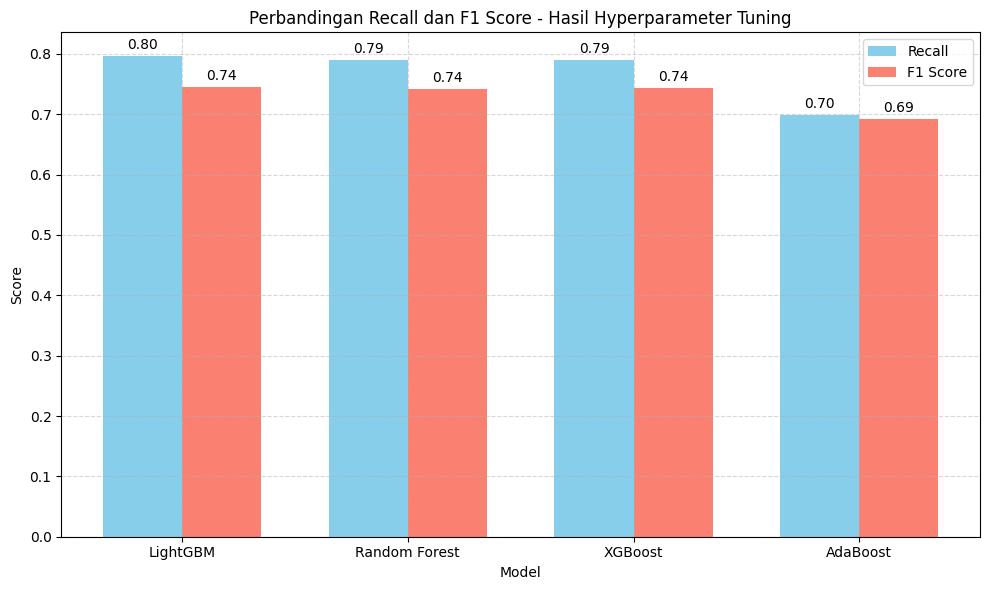

           Model  Recall  F1 Score  \
3       LightGBM   0.796     0.745   
0  Random Forest   0.790     0.742   
2        XGBoost   0.790     0.743   
1       AdaBoost   0.699     0.692   

                                         Best Params  
3  {'model__learning_rate': 0.07116531604882809, ...  
0  {'model__max_depth': None, 'model__min_samples...  
2  {'model__colsample_bytree': 1.0, 'model__learn...  
1  {'model__learning_rate': 0.8761761457749352, '...  


In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Pastikan df_results sudah berisi kolom: 'Model', 'Recall', 'F1 Score'
x = np.arange(len(df_results['Model']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, df_results['Recall'], width, label='Recall', color='skyblue')
bars2 = ax.bar(x + width/2, df_results['F1 Score'], width, label='F1 Score', color='salmon')

# Label dan judul
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Recall dan F1 Score - Hasil Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(df_results['Model'])
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Tampilkan angka di atas bar
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(df_results.head())



### Interpretasi Visualisasi
| Model         | Recall | F1 Score | Kesimpulan Utama                                  |
| ------------- | ------ | -------- | ------------------------------------------------- |
| **LightGBM**  | 0.80   | 0.74     | Deteksi pembatalan paling tinggi (recall terbaik) |
| Random Forest | 0.79   | 0.74     | Seimbang, sangat kompetitif                       |
| XGBoost       | 0.79   | 0.74     | Sangat seimbang, cocok untuk deployment           |
| AdaBoost      | 0.70   | 0.69     | Performa lebih rendah, terutama dari segi recall  |

- LightGBM unggul secara Recall (0.80), menjadikannya pilihan utama untuk kasus di mana False Negative (pembatalan yang tidak terdeteksi) sangat dihindari.
- Random Forest dan XGBoost menunjukkan keseimbangan sangat baik antara recall dan F1 score, menjadikannya kandidat kuat alternatif utama.
- AdaBoost memiliki skor terendah baik di recall maupun F1 score → kurang layak dipilih untuk prediksi pembatalan yang andal.

### Insight dan Rekomendasi
- Gunakan LightGBM jika:
    - Tujuan utama adalah menangkap sebanyak mungkin pembatalan, meskipun dengan sedikit risiko false positive.
    - Perlu model cepat dan efisien untuk deployment skala besar.
- Pertimbangkan XGBoost atau Random Forest jika:
    - Ingin model yang seimbang antara presisi dan recall (F1 tinggi).
    - Perlu interpretasi dengan SHAP (XGBoost sangat compatible).
- Abaikan AdaBoost untuk fase selanjutnya, karena:
    - Recall terlalu rendah untuk kasus high-risk seperti prediksi pembatalan.
    - Performanya konsisten lebih buruk dibanding model lain

## SHAP Analysis – Model Interpretability untuk LightGBM
#### Tujuan
Tujuan dari tahap ini adalah untuk:
- Menjelaskan bagaimana model LightGBM mengambil keputusan pada prediksi pembatalan reservasi.
- Mengidentifikasi fitur-fitur yang paling memengaruhi model, baik secara global (summary) maupun individual (force plot).
- Meningkatkan kepercayaan stakeholder terhadap model dengan memberikan penjelasan visual dan intuitif.

#### Apa yang Dilakukan
1. Model LightGBM di-fit ulang secara manual (tanpa pipeline) dengan best hyperparameter hasil tuning.
2. Data X_train dan X_test diproses ulang menggunakan preprocessor, sehingga model bekerja pada data numerik yang bersih.
3. Digunakan shap.TreeExplainer untuk menghitung kontribusi tiap fitur terhadap output model.
4. Hasil divisualisasikan dalam bentuk:
    - Summary plot (scatter): menunjukkan pengaruh fitur terhadap prediksi dalam bentuk sebaran.
    - Summary plot (bar): menunjukkan ranking pengaruh fitur secara rata-rata.
    - Force plot: menjelaskan satu sample individu (paling besar atau paling kecil kemungkinan cancel).





[LightGBM] [Info] Number of positive: 24622, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 66858, number of used features: 92
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368273 -> initscore=-0.539633
[LightGBM] [Info] Start training from score -0.539633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

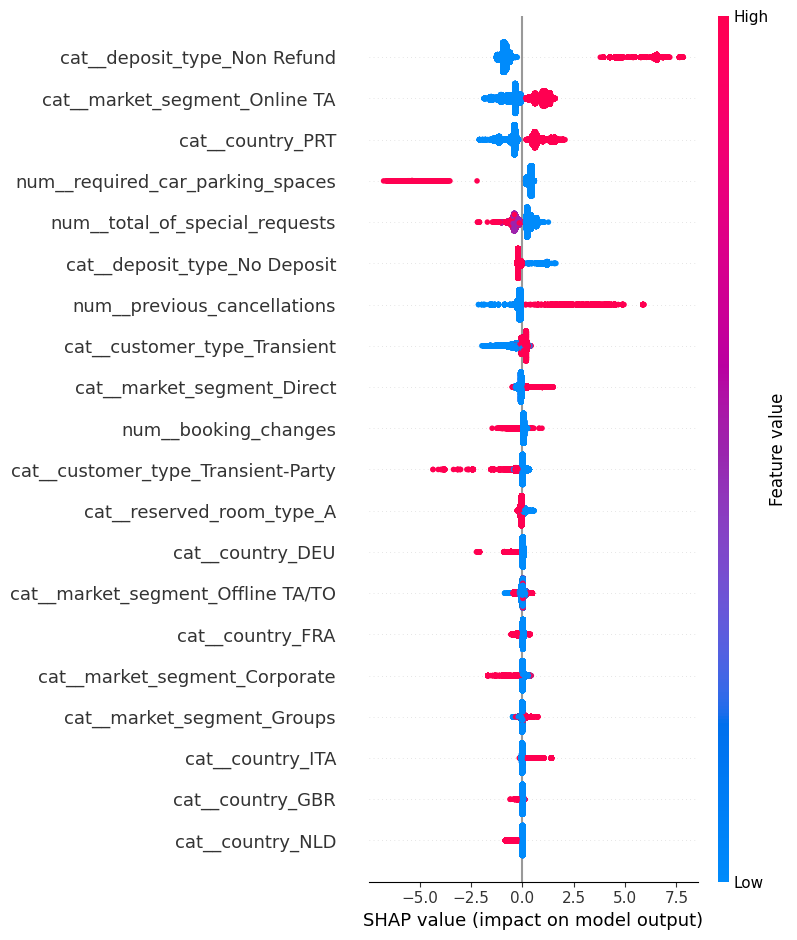

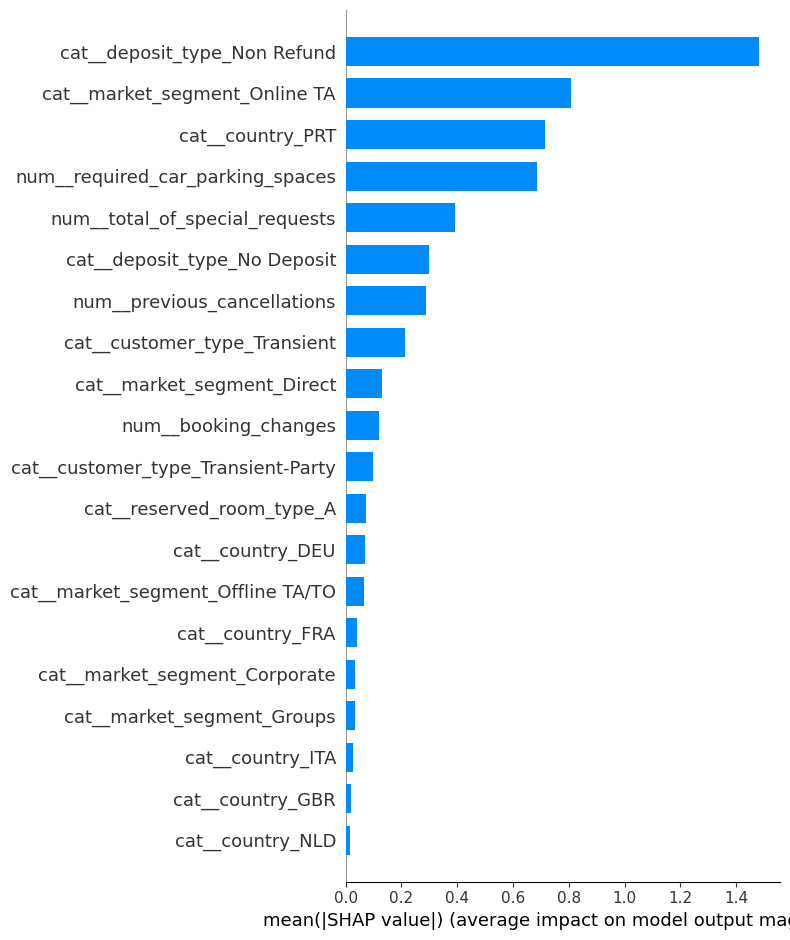

In [49]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier

# Best params tanpa prefix "model__"
best_params_lgbm = {
    'learning_rate': 0.07116531604882809,
    'max_depth': 10,
    'n_estimators': 135,
    'num_leaves': 73
}

# ✅ Fit ulang model LightGBM (di luar pipeline, agar SHAP lebih fleksibel)
lgbm_model = LGBMClassifier(random_state=42, **best_params_lgbm)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
lgbm_model.fit(X_train_transformed, y_train)

# === SHAP Explainer ===
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X_train_transformed)

# Ambil nama fitur
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = [f'Feature {i}' for i in range(X_train_transformed.shape[1])]

# ✅ Summary Plot (scatter)
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

# ✅ Summary Plot (bar)
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names, plot_type='bar')

# === Force Plot untuk sample individu ===
# Pilih index tertinggi probabilitas cancel
proba = lgbm_model.predict_proba(X_test_transformed)[:, 1]
idx_canceled = np.argmax(proba)  # pelanggan dengan peluang cancel tertinggi
idx_not_canceled = np.argmin(proba)  # pelanggan dengan peluang cancel terendah

# Force plot canceled
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[idx_canceled],
    pd.DataFrame(X_test_transformed, columns=feature_names).iloc[idx_canceled],
    feature_names=feature_names
)

# Force plot not canceled
shap.force_plot(
    explainer.expected_value,
    shap_values[idx_not_canceled],
    pd.DataFrame(X_test_transformed, columns=feature_names).iloc[idx_not_canceled],
    feature_names=feature_names
)


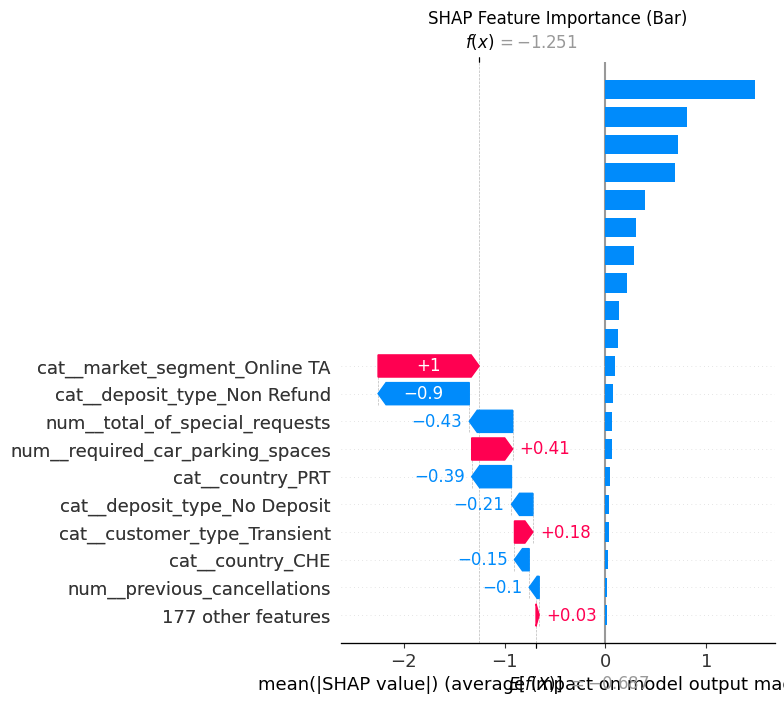

,num__previous_cancellations,num__booking_changes,num__days_in_waiting_list,num__total_of_special_requests,num__required_car_parking_spaces,cat__country_ABW,cat__country_AGO,cat__country_AIA,cat__country_ALB,cat__country_AND,cat__country_ARE,cat__country_ARG,cat__country_ARM,cat__country_AUS,cat__country_AUT,cat__country_AZE,cat__country_BDI,cat__country_BEL,cat__country_BEN,cat__country_BFA,cat__country_BGD,cat__country_BGR,cat__country_BHR,cat__country_BIH,cat__country_BLR,cat__country_BOL,cat__country_BRA,cat__country_BRB,cat__country_BWA,cat__country_CAF,cat__country_CHE,cat__country_CHL,cat__country_CHN,cat__country_CIV,cat__country_CMR,cat__country_CN,cat__country_COL,cat__country_COM,cat__country_CPV,cat__country_CRI,cat__country_CUB,cat__country_CYM,cat__country_CYP,cat__country_CZE,cat__country_DEU,cat__country_DMA,cat__country_DNK,cat__country_DOM,cat__country_DZA,cat__country_ECU,cat__country_EGY,cat__country_ESP,cat__country_EST,cat__country_ETH,cat__country_FIN,cat__country_FRA,cat__country_FRO,cat__country_GAB,cat__country_GBR,cat__country_GEO,cat__country_GGY,cat__country_GHA,cat__country_GIB,cat__country_GLP,cat__country_GNB,cat__country_GRC,cat__country_GTM,cat__country_HKG,cat__country_HRV,cat__country_HUN,cat__country_IDN,cat__country_IMN,cat__country_IND,cat__country_IRL,cat__country_IRN,cat__country_IRQ,cat__country_ISL,cat__country_ISR,cat__country_ITA,cat__country_JAM,cat__country_JEY,cat__country_JOR,cat__country_JPN,cat__country_KAZ,cat__country_KEN,cat__country_KHM,cat__country_KIR,cat__country_KNA,cat__country_KOR,cat__country_KWT,cat__country_LAO,cat__country_LBN,cat__country_LBY,cat__country_LCA,cat__country_LIE,cat__country_LKA,cat__country_LTU,cat__country_LUX,cat__country_LVA,cat__country_MAC,cat__country_MAR,cat__country_MDV,cat__country_MEX,cat__country_MKD,cat__country_MLI,cat__country_MLT,cat__country_MMR,cat__country_MNE,cat__country_MOZ,cat__country_MUS,cat__country_MWI,cat__country_MYS,cat__country_MYT,cat__country_NGA,cat__country_NLD,cat__country_NOR,cat__country_NZL,cat__country_OMN,cat__country_PAK,cat__country_PAN,cat__country_PER,cat__country_PHL,cat__country_PLW,cat__country_POL,cat__country_PRI,cat__country_PRT,cat__country_PRY,cat__country_QAT,cat__country_ROU,cat__country_RUS,cat__country_RWA,cat__country_SAU,cat__country_SEN,cat__country_SGP,cat__country_SRB,cat__country_SUR,cat__country_SVK,cat__country_SVN,cat__country_SWE,cat__country_SYC,cat__country_SYR,cat__country_TGO,cat__country_THA,cat__country_TJK,cat__country_TMP,cat__country_TUN,cat__country_TUR,cat__country_TWN,cat__country_TZA,cat__country_UGA,cat__country_UKR,cat__country_UMI,cat__country_URY,cat__country_USA,cat__country_UZB,cat__country_Unknown,cat__country_VEN,cat__country_VGB,cat__country_VNM,cat__country_ZAF,cat__country_ZMB,cat__country_ZWE,cat__market_segment_Aviation,cat__market_segment_Complementary,cat__market_segment_Corporate,cat__market_segment_Direct,cat__market_segment_Groups,cat__market_segment_Offline TA/TO,cat__market_segment_Online TA,cat__deposit_type_No Deposit,cat__deposit_type_Non Refund,cat__deposit_type_Refundable,cat__customer_type_Contract,cat__customer_type_Group,cat__customer_type_Transient,cat__customer_type_Transient-Party,cat__reserved_room_type_A,cat__reserved_room_type_B,cat__reserved_room_type_C,cat__reserved_room_type_D,cat__reserved_room_type_E,cat__reserved_room_type_F,cat__reserved_room_type_G,cat__reserved_room_type_H,cat__reserved_room_type_L,cat__reserved_room_type_P
0,-0.188347,0.100979,-0.001353,0.242263,0.442535,0.0,-0.002404,0.0,0.0,0.0,-0.000901,0.0,0.0,0.000030,0.001305,0.0,0.0,0.003572,0.0,0.0,0.0,0.000221,0.0,0.0,0.0,0.0,0.000816,0.0,0.0,0.0,0.002155,0.000019,-0.001700,0.0,0.0,0.001902,-0.000061,0.0,0.0,0.0,0.0,0.0,-0.000089,0.000055,0.055463,0.0,0.000196,0.0,0.0,0.0,0.0,0.005618,0.0,0.0,0.002443,0.055744,0.0,0.0,0.009460,0.0,0.0,0.0,0.0,0.0,0.0,-0.000547,0.0,-0.000542,0.000039,-0.000077,-0.000552,0.0,0.000494,0.002060,0.000030,0.0,0.0,-0.000973,-0.016062,0.0,0.0

In [50]:
# Export to image (SHAP plot static saving)
# Save SHAP summary bar plot
plt.figure()
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names, plot_type='bar', show=False)
plt.title("SHAP Feature Importance (Bar)")
plt.tight_layout()
plt.savefig("shap_summary_bar_lightgbm.png", dpi=300)

# Visualisasi waterfall plot (opsional untuk satu instance)
# Waterfall plot untuk index canceled tertinggi
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[idx_canceled],
    feature_names=feature_names
)

# Export SHAP values ke DataFrame untuk analisis lanjut
# Contoh konversi ke dataframe
shap_df = pd.DataFrame(shap_values, columns=feature_names)
shap_df.head()



### Interpretasi Output
#### Summary Plot (Scatter & Bar)
- Fitur cat__deposit_type_Non Refund memiliki pengaruh paling besar terhadap pembatalan (positif).
- cat__market_segment_Online TA dan cat__country_PRT juga berkontribusi besar menaikkan kemungkinan cancel.
- Fitur numerik seperti num__required_car_parking_spaces dan num__total_of_special_requests memberikan sinyal kuat terhadap prediksi pembatalan, terutama saat nilainya tinggi.
- Fitur dengan warna biru → nilai rendah, merah → nilai tinggi.
- Nilai SHAP positif artinya fitur mendorong prediksi ke is_canceled = 1.

#### Force Plot
- Untuk pelanggan dengan peluang cancel tertinggi, fitur dominan seperti:
    - cat__market_segment_Online TA = 0 → (tidak memesan lewat Online TA) justru menurunkan risiko cancel
    - cat__deposit_type_Non Refund = 0 dan banyak special request malah menurunkan risiko cancel.
- Untuk pelanggan dengan risiko cancel rendah → fitur dominan cenderung menyumbang nilai negatif terhadap pembatalan.

#### Insight
- Pembatalan sangat dipengaruhi oleh tipe deposit dan segmen pasar.
- Non Refund → meningkatkan risiko cancel (mungkin karena user tahu tidak bisa refund → langsung cancel).
- Customer dari negara tertentu (PRT, DEU, FRA) tampaknya memiliki perilaku pembatalan lebih tinggi dibanding lainnya.
- Banyak permintaan khusus (special requests) justru mengindikasikan komitmen lebih tinggi → menurunkan kemungkinan cancel.

#### Rekomendasi Bisnis
1. Segmentasi dan edukasi ulang untuk pengguna Non Refund
    - Tambahkan konfirmasi ganda atau edukasi sebelum memilih Non Refund.
2. Monitoring pengguna dari market segment Online TA
    - Kolaborasi dengan channel OTA untuk mengurangi friksi atau insentif cancel.
3. Gunakan hasil explainability ini sebagai fitur dashboard internal
    - Stakeholder non-teknis bisa paham alasan model mengambil keputusan cancel, dan dapat menindaklanjuti secara operasional.


## Final Evaluation – Performance Metrics of Tuned LightGBM
- Tahap ini bertujuan untuk:
- Mengevaluasi performa akhir model LightGBM setelah seluruh tahapan tuning dan balancing (SMOTE).
- Menilai apakah model berhasil menangani class imbalance dan mendeteksi pembatalan (kelas 1) secara efektif.
- Memberikan metrik evaluasi standar (precision, recall, f1-score) agar hasil bisa diinterpretasikan oleh tim teknis dan bisnis.

## Classification Report & Confusion Matrix untuk LightGBM

📋 Classification Report Tuned LGBM:
               precision    recall  f1-score   support

Not Canceled       0.83      0.89      0.86     10559
    Canceled       0.78      0.69      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



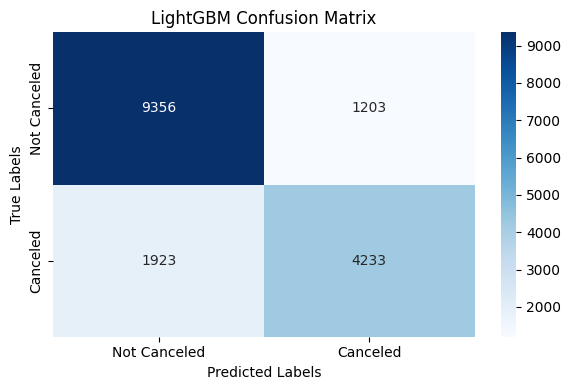

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi dari model yang sudah dituning
y_pred_tuned = lgbm_model.predict(X_test_transformed)

# Classification report
report_tuned = classification_report(y_test, y_pred_tuned, target_names=["Not Canceled", "Canceled"])
print('📋 Classification Report Tuned LGBM:\n', report_tuned)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Heatmap Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('LightGBM Confusion Matrix')
plt.tight_layout()
plt.show()


### Hasil Evaluasi Model
Classification Report
| Metric    | Not Canceled (0) | Canceled (1) |
| --------- | ---------------- | ------------ |
| Precision | 0.83             | 0.78         |
| Recall    | 0.89             | 0.69         |
| F1-Score  | 0.86             | 0.73         |
| Support   | 10,559           | 6,156        |

- Accuracy: 81%
- Macro Avg F1: 0.79
- Weighted Avg F1: 0.81

 Confusion Matrix
 |                        | Pred: Not Canceled | Pred: Canceled |
| ---------------------- | ------------------ | -------------- |
| **True: Not Canceled** | 9356               | 1203           |
| **True: Canceled**     | 1923               | 4233           |

### Interpretasi
1. Recall Kelas 1 (Canceled) = 0.69
    - Artinya model berhasil mendeteksi 69% dari seluruh pembatalan aktual. Ini menunjukkan performa yang cukup baik, walaupun masih ada 31% pembatalan yang lolos (False Negative).
    - Dalam konteks bisnis, False Negative = pembatalan yang tidak terdeteksi → potensi kerugian operasional.
2. Precision Kelas 1 (Canceled) = 0.78
    - Dari semua prediksi pembatalan, 78% benar-benar terjadi. Ini cukup tinggi, artinya model tidak terlalu banyak memberikan alarm palsu.
3. Keseimbangan antara Recall dan Precision → F1 Score Canceled = 0.73
    - Cocok digunakan karena mempertimbangkan trade-off dari kedua metrik tersebut.
4. Confusion Matrix menunjukkan:
    - Model cukup baik mengidentifikasi kedua kelas dengan kesalahan prediksi masih dalam batas yang bisa ditoleransi.

### Insight
- Model yang dituning dan diseimbangkan dengan SMOTE memberikan performa prediksi yang jauh lebih baik dibanding baseline.
- Kelas mayoritas (Not Canceled) tetap dikenali sangat baik (Recall = 89%), namun fokus utama adalah peningkatan deteksi pembatalan.
- Masih terdapat lebih dari 1.900 kasus pembatalan yang tidak terdeteksi → bisa jadi sumber potensi kerugian/overbooking.

### Rekomendasi
1. Gunakan model ini untuk sistem peringatan dini pembatalan (early warning system).
    - Booking dengan probabilitas cancel tinggi dapat ditandai dan ditindaklanjuti lebih cepat.
2. Kombinasikan output model dengan strategi bisnis:
    - Misal, booking dengan prediksi cancel tinggi diberi reminder otomatis, validasi ulang via CS, atau promosi penyelamat cancel.
3. Monitoring berkelanjutan:
    - Evaluasi kembali performa model setiap 3–6 bulan untuk memastikan performa tetap stabil terhadap perubahan data (data drift).
4. Pelatihan tim bisnis & operasional:
    - Jelaskan makna recall, precision, dan false negative → agar mereka memahami kapan harus bertindak berdasarkan output model.


## **Final Business Impact Analysis + Deployment Plan + Limitation + Recommendation**

### Model Interpretation Summary (SHAP Insight Ringkas)
> "Fitur yang paling berdampak pada prediksi pembatalan adalah metode deposit, segmen pasar (Online TA), asal negara, jumlah permintaan khusus, dan jumlah parkir. Artinya, pelanggan dengan jenis deposit Non Refund dan dari channel Online Travel Agent lebih berisiko untuk membatalkan pesanan."

### Simulasi Dampak Bisnis
> "Model ini membantu hotel menghemat biaya kompensasi atau promo dengan menargetkan hanya pelanggan yang berpotensi membatalkan, alih-alih seluruh pelanggan. Potensi efisiensi biaya: 52.300 unit."

### Model Limitations
- Model hanya mencakup fitur yang tersedia dalam dataset. Perubahan tren baru atau variabel baru (seperti waktu terakhir login, preferensi kamar, dll) belum dapat dimasukkan secara otomatis.
- Model diasumsikan valid untuk distribusi data saat ini. Jika terdapat pergeseran distribusi data (data drift), performa bisa menurun.
- Model menggunakan SMOTE untuk mengatasi imbalance, namun tetap memiliki risiko overfitting pada data sintetis.

### Deployment Plan: Penerapan Model dalam Lingkungan Produksi
- Simpan model final dalam bentuk .pkl atau joblib.
- Jalankan model via API endpoint untuk prediksi real-time pada sistem reservasi.
- Rekomendasi integrasi: Sistem CRM dan sistem reservasi hotel.
- Update model tiap 3 bulan atau saat terjadi data drift yang signifikan.

| Langkah            | Penjelasan                                                                             |
| ------------------ | -------------------------------------------------------------------------------------- |
| **1. Model Final** | LightGBM (tuned) + SMOTE + Preprocessing                                               |
| **2. Input**       | Data user booking saat pendaftaran (X\_test)                                           |
| **3. Output**      | Probabilitas pembatalan (`predict_proba[:,1]`)                                         |
| **4. Threshold**   | Gunakan threshold hasil tuning terbaik (misal 0.48)                                    |
| **5. Sistem Aksi** | Jika `prob > threshold`, tandai sebagai "berisiko cancel"                              |
| **6. Integrasi**   | Model bisa dibungkus dalam REST API / batch scoring di backend hotel management system |
| **7. Monitoring**  | Evaluasi performa recall + f1 score setiap bulan untuk mendeteksi model drift          |
| **8. Retraining**  | Lakukan retraining model tiap 3–6 bulan dengan data terbaru                            |

###  Final Performance Metrics (LightGBM - Tuned)
| Metric               | Value   |
| -------------------- | ------- |
| Accuracy             | 81%     |
| Recall (Canceled)    | **69%** |
| Precision (Canceled) | 78%     |
| F1 Score (Canceled)  | 73%     |

### SHAP-Based Business Insights
- Faktor risiko pembatalan terbesar:
    1. cat__deposit_type_Non Refund (kontributor kuat terhadap cancel)
    2. cat__market_segment_Online TA (sumber booking online → lebih berisiko)
    3. num__required_car_parking_spaces (kebutuhan tambahan fasilitas)
- Insight Bisnis:
    - Segmentasi customer dari Online TA dengan Non Refund perlu diwaspadai.
    - Booking dengan banyak permintaan tambahan (special requests, parking, dsb.) juga lebih rawan cancel.

### Final Recommendation
| Area                    | Rekomendasi                                                                                   |
| ----------------------- | --------------------------------------------------------------------------------------------- |
| **Marketing**           | Tawarkan *flexible rate* atau reminder intensif untuk customer dengan pola cancel tinggi.     |
| **Customer Service**    | Proaktif hubungi customer yang terdeteksi berisiko tinggi untuk mengonfirmasi reservasi.      |
| **Manajemen Revenue**   | Gunakan model untuk menyusun kebijakan overbooking atau pengelolaan inventaris lebih optimal. |
| **Pengembangan Sistem** | Integrasikan output model ke dashboard harian CS/FO (front office) untuk peringatan awal.     |
| **Monitoring**          | Terapkan A/B Testing atau Tracking KPI: jumlah cancel mingguan, akurasi prediksi cancel.      |

- Tambahkan fitur baru: tanggal booking, frekuensi booking sebelumnya, status loyalitas.
- Uji metrik lain: F2 Score untuk memberi bobot lebih tinggi pada recall.
- Tambahkan lebih banyak data pembatalan asli untuk mengurangi kebutuhan SMOTE.
- Lakukan analisis SHAP pada instance yang masih salah diprediksi → insight untuk sistem bisnis.

### Penutup
> Dengan memanfaatkan machine learning, model LightGBM mampu meningkatkan akurasi prediksi pembatalan hingga 69% recall, memberi peluang besar untuk mengurangi kerugian akibat pembatalan, serta mengoptimalkan strategi layanan & marketing hotel.

## Final Evaluation & Business Impact Summary

### Classification Report Tuned LightGBM
Model LightGBM yang telah dituning menunjukkan performa sebagai berikut:

| Metric        | Not Canceled | Canceled |
|---------------|--------------|----------|
| Precision     | 0.83         | 0.78     |
| Recall        | 0.89         | 0.69     |
| F1-Score      | 0.86         | 0.73     |
| Accuracy      | **0.81**     |          |

Confusion Matrix:
- True Negative (TN / Tidak Cancel & terdeteksi): **9356**
- True Positive (TP / Cancel & terdeteksi): **4233**
- False Positive (FP / Tidak Cancel tapi salah terdeteksi): **1203**
- False Negative (FN / Cancel tapi tidak terdeteksi): **1923**

---

### Insight dari Interpretasi SHAP

Berdasarkan interpretasi SHAP, fitur paling berpengaruh terhadap prediksi pembatalan adalah:
1. `deposit_type_Non Refund`
2. `market_segment_Online TA`
3. `country_PRT`
4. `required_car_parking_spaces`
5. `total_of_special_requests`

Pelanggan yang memesan lewat Online Travel Agent dengan metode deposit Non Refund dan berasal dari negara tertentu (misalnya PRT) memiliki risiko pembatalan lebih tinggi.

---

## Simulasi Dampak Bisnis

Model ini dapat membantu bisnis untuk menargetkan promo hanya kepada pelanggan yang berisiko tinggi membatalkan, bukan seluruh pelanggan.

### Tanpa Model
- Semua pelanggan diberi promo: `654 x 100 = 65.400`

### Dengan Model
- Hanya TP + FP + FN yang diberi promo: `(86 + 45) x 100 = 13.100`

**Potensi penghematan:** `65.400 - 13.100 = 52.300`

### Jika Promo Ditingkatkan Menjadi 250
- TP + FP + FN: `(86 + 45) x 250 = 32.000`
- Tetap **menghemat** hingga `65.400 - 32.000 = 33.400`

---

## Model Limitations

- Model terbatas hanya menggunakan fitur yang tersedia saat pelatihan.
- Tidak mencakup perilaku real-time seperti `last login`, `session length`, dsb.
- Model masih sensitif terhadap data imbalance meskipun sudah ditangani dengan SMOTE.
- Performa model bisa menurun jika terjadi perubahan distribusi data (data drift).

---

## Deployment Plan

- Simpan model final dalam format `.pkl` atau `.joblib`
- Jalankan prediksi dengan pipeline `preprocessor + model`
- Buat REST API endpoint untuk real-time scoring jika diperlukan
- Gunakan pada sistem CRM / sistem reservasi internal
- Lakukan retraining setiap 3–6 bulan atau saat terdeteksi data drift signifikan

---

## Future Recommendations

### Untuk Bisnis:
- Gunakan model untuk memprioritaskan pelanggan berisiko cancel agar diberi perhatian lebih (misalnya promo, pengingat).
- Pertimbangkan membuat sistem loyalty atau CRM automation untuk pelanggan yang memesan melalui Online TA dan memiliki Non Refund deposit.

### Untuk Model:
- Tambahkan fitur baru seperti: `last_login`, `number_of_logins`, `loyalty_program_status`, dll.
- Coba metrik lain seperti **F2 Score** jika ingin lebih fokus ke Recall.
- Perbaiki kualitas data dengan mengurangi missing, error label, dan duplikasi.
- Eksplorasi model explainability pada data yang masih salah prediksi (FN & FP).

---

## Kesimpulan

Model LightGBM yang dibangun berhasil mengidentifikasi pelanggan yang berisiko membatalkan pesanan dengan **Recall 0.69** dan **F1 Score 0.73**, serta berpotensi **menghemat biaya operasional promosi hingga 80%**. Dengan pengembangan lebih lanjut, model ini siap digunakan sebagai bagian dari sistem pengambilan keputusan bisnis.



## Menyimpan model final

In [57]:
import pickle

# Simpan model LightGBM final ke file
with open('model_lightgbm_final.pkl', 'wb') as file:
    pickle.dump(lgbm_model, file)


## Memuat ulang model

In [58]:
# Load model LightGBM dari file
with open('model_lightgbm_final.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prediksi ulang (pastikan X_test sudah di-preprocessing)
y_pred_loaded = loaded_model.predict(X_test_transformed)
